# Plotting Notebook
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import os, sys, glob, random
import pickle
import math
import multiprocessing
import itertools
import warnings
import json
import time
import numpy as np
from typing import Dict, List
from rich import print
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
from rich.progress import Progress, track
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
import uproot
import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jacobi import propagate
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils
%aimport generic_utils

Welcome to JupyROOT 6.30/02


In [10]:
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
hep.style.use("CMS")
np.set_printoptions(suppress=True)

In [5]:
print("The following output directories are available:")
!ls | grep output_histograms

The following output directories are available:

CR_cb_34mu_output_histograms
CR_cb_combine_output_histograms
CR_cb_output_histograms
CR_cb_postDYstudy_output_histograms
CR_light_postDYstudy_output_histograms
CR_prompt_34mu_leading_output_histograms
CR_prompt_34mu_output_histograms
CR_prompt_combine_output_histograms
CR_prompt_dimuon_output_histograms
CR_prompt_dystudy_output_histograms
CR_prompt_leading_output_histograms
CR_prompt_output_histograms
CR_prompt_postDYstudy_output_histograms
DYstudy_2_output_histograms
DYstudy_3_output_histograms
DYstudy_4_output_histograms
DYstudy_5_output_histograms
DYstudy_output_histograms
DYstudy_trigger_match_double_output_histograms
DYstudy_trigger_match_triple_output_histograms
DYstudy_trigger_one_path_output_histograms
nbjet_comparison_output_histograms
SR_combine_new_trigger_output_histograms
SR_combine_old_trigger_output_histograms
SR_combine_output_histograms
SR_extrapolation_new_from_mini_output_histograms
SR_extrapolation_new_output_histograms
SR_extrapolation_output_histograms
SR_postDYst

## Load plots

In [43]:
plots = generic_utils.loader(tag="SR_extrapolation_new_from_mini")

These are all the samples loaded.

In [44]:
keys = list(plots.keys())
pprint(keys)

[
│   'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
│   'SUEP_mS125_mPhi2_T2_modehadronic_2018',
│   'SUEP_mS125_mPhi8_T32_modehadronic_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt_MuEnriched_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_normalized_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8_histograms_2018',
│   'QCD_2018'
]

In [45]:
for key in plots['QCD_Pt_MuEnriched_2018'].keys():
    pprint(f"{key = }")

"key = 'muon_pt'"

"key = 'likelihood'"

"key = 'likelihood_normalized'"

"key = 'lead_interiso_norm_vs_muon_iso_cut_vs_nMuon'"

"key = 'mu_1_pt'"

"key = 'mu_2_pt'"

"key = 'mu_3_pt'"

"key = 'mu_4_pt'"

"key = 'mu_5_pt'"

"key = 'mu_6_pt'"

"key = 'mu_7_pt'"

"key = 'track_interiso_norm_vs_nTrack_vs_nMuon'"

"key = 'track_interiso_norm_vs_lead_interiso_norm_vs_nMuon'"

"key = 'track_interiso_vs_lead_interiso_vs_nMuon'"

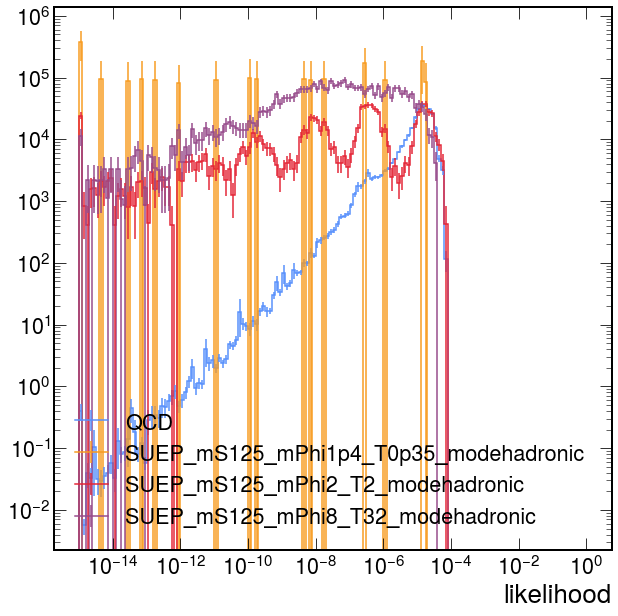

In [46]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['likelihood'][:, ::sum]
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        label=dataset.replace("_2018",""),
        density=True,
    )
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

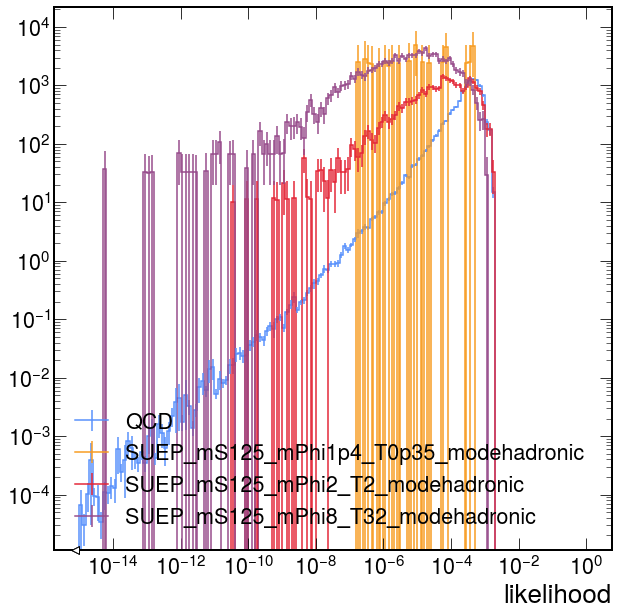

In [47]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['likelihood_normalized'][:, ::sum]
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        label=dataset.replace("_2018",""),
        density=True,
    )
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

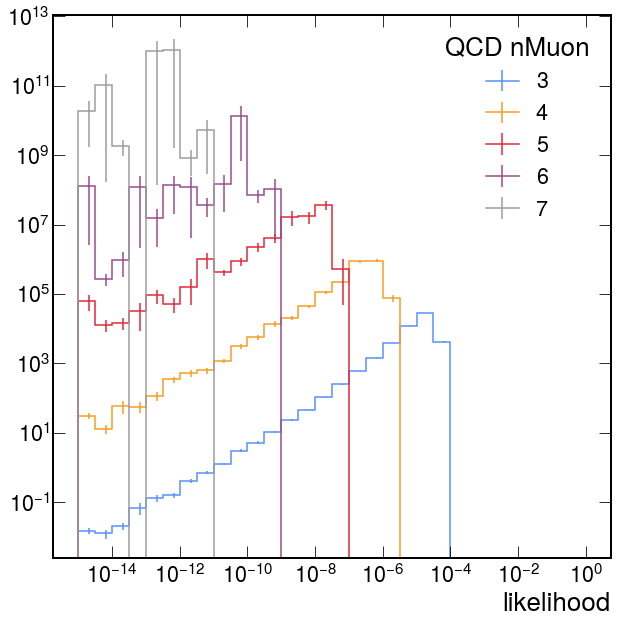

In [53]:
histogram = plots['QCD_2018']['likelihood']

for nMuon in range(3, 8):
    h_i = histogram[::5j, nMuon*1j] 
    h_i.plot(
        yerr=np.sqrt(h_i.variances()),
        label=f"{nMuon}",
        density=True,
    )
plt.xscale('log')
plt.yscale('log')
plt.legend(title="QCD nMuon")
plt.show()

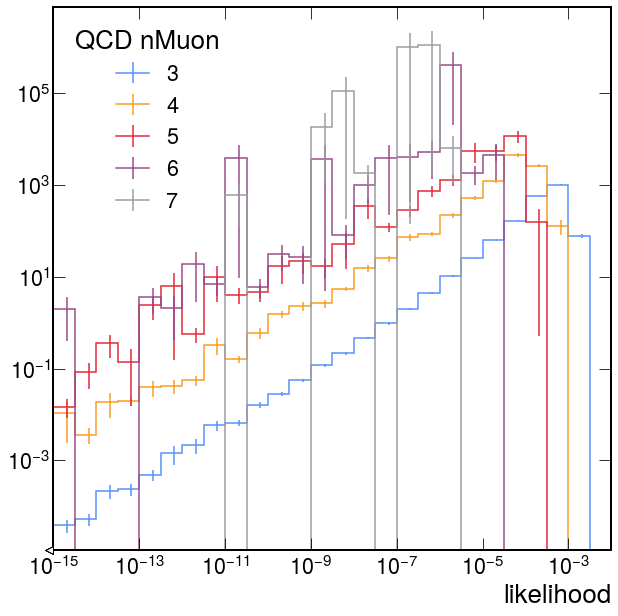

In [51]:
histogram = plots['QCD_2018']['likelihood_normalized']

for nMuon in range(3, 8):
    h_i = histogram[::5j, nMuon*1j] 
    h_i.plot(
        yerr=np.sqrt(h_i.variances()),
        label=f"{nMuon}",
        density=True,
    )
plt.xlim(1e-15, 1e-2)
plt.xscale('log')
plt.yscale('log')
plt.legend(title="QCD nMuon")
plt.show()

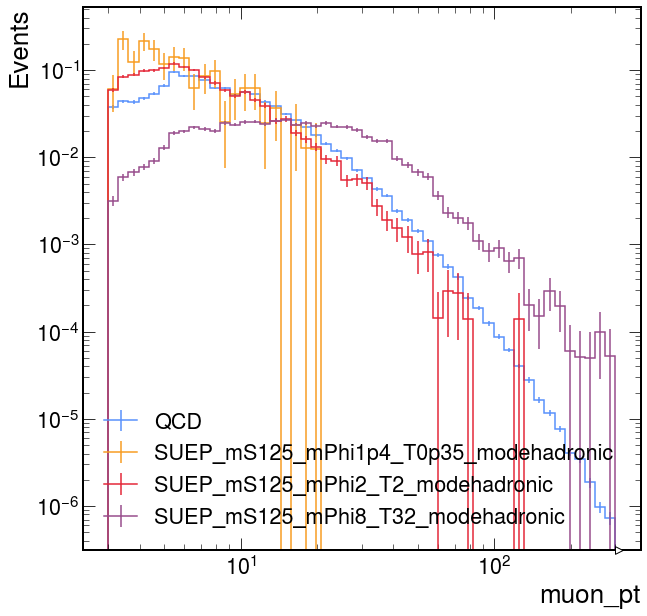

In [52]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['muon_pt'][::2j]
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        label=dataset.replace("_2018",""),
        density=True,
    )
#plt.ylim(0.01, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Events')
plt.legend()
plt.show()

In [20]:
distribution = plots['QCD_2018']['muon_pt'] / plots['QCD_2018']['muon_pt'].sum().value

In [22]:
distribution.values()

array([0.01444606, 0.01788267, 0.01863509, 0.01871521, 0.018271  ,
       0.01862738, 0.02023799, 0.02037756, 0.02292804, 0.02308553,
       0.02105714, 0.03559662, 0.04153534, 0.03952179, 0.03809815,
       0.03558699, 0.0383288 , 0.03530175, 0.03413093, 0.03184524,
       0.02880311, 0.02495798, 0.0267085 , 0.02652325, 0.02433806,
       0.02026294, 0.02393517, 0.02388314, 0.02415238, 0.02158113,
       0.01992112, 0.01734985, 0.01589269, 0.01681835, 0.01399663,
       0.01296229, 0.01209786, 0.01085313, 0.00997262, 0.00895907,
       0.0083739 , 0.00688307, 0.00622945, 0.0060278 , 0.0052202 ,
       0.00493383, 0.0043168 , 0.00398108, 0.00303587, 0.00304323,
       0.00272003, 0.0021949 , 0.00198677, 0.00172853, 0.00148774,
       0.00160906, 0.00108399, 0.00098058, 0.00079216, 0.00083225,
       0.0006787 , 0.00054658, 0.0004822 , 0.00046058, 0.00036664,
       0.00028516, 0.00025096, 0.00022413, 0.00021782, 0.0001452 ,
       0.0001075 , 0.00010252, 0.00008649, 0.00007262, 0.00005

In [37]:
(0.04153534 * 7) ** 7

0.00017563483988801247

In [23]:
distribution.axes[0].edges

array([  3.        ,   3.14138564,   3.28943459,   3.44446086,
         3.6067933 ,   3.77677624,   3.95477022,   4.14115279,
         4.33631931,   4.54068375,   4.75467958,   4.97876072,
         5.21340249,   5.45910258,   5.71638215,   5.98578694,
         6.26788839,   6.56328487,   6.87260296,   7.19649876,
         7.53565929,   7.89080398,   8.26268611,   8.65209451,
         9.05985516,   9.48683298,   9.93393364,  10.40210551,
        10.89234164,  11.40568189,  11.94321512,  12.5060815 ,
        13.09547497,  13.71264569,  14.35890277,  15.03561701,
        15.74422381,  16.48622622,  17.26319812,  18.07678758,
        18.92872033,  19.82080344,  20.75492913,  21.7330788 ,
        22.75732725,  23.82984704,  24.95291313,  26.1289077 ,
        27.36032518,  28.64977758,  30.        ,  31.41385644,
        32.89434588,  34.44460864,  36.06793304,  37.76776235,
        39.54770216,  41.41152794,  43.36319312,  45.40683745,
        47.54679577,  49.78760722,  52.13402486,  54.59

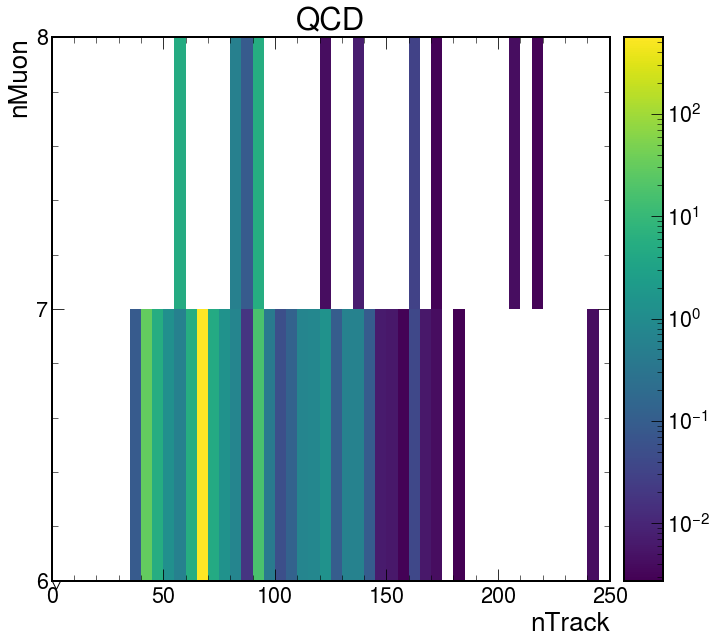

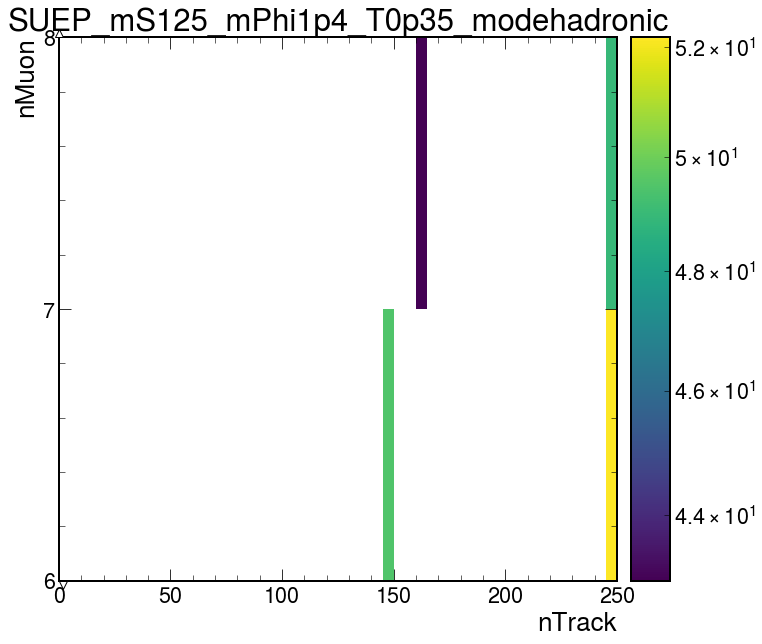

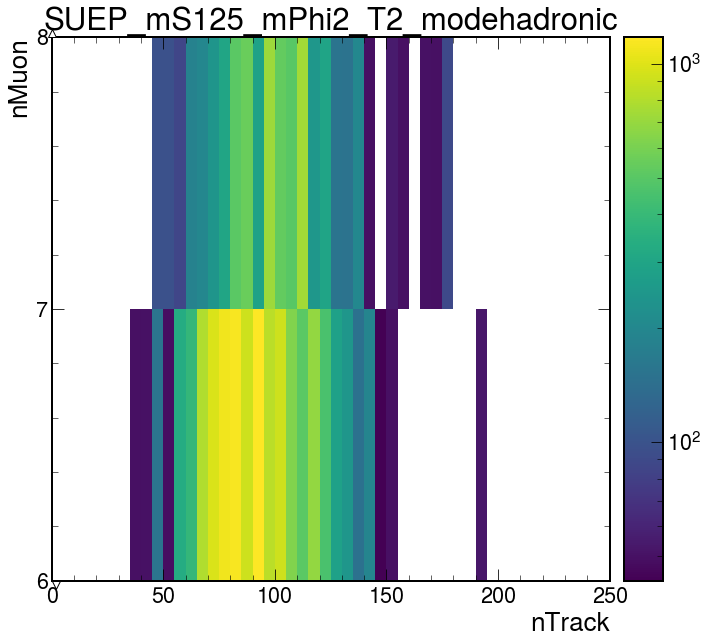

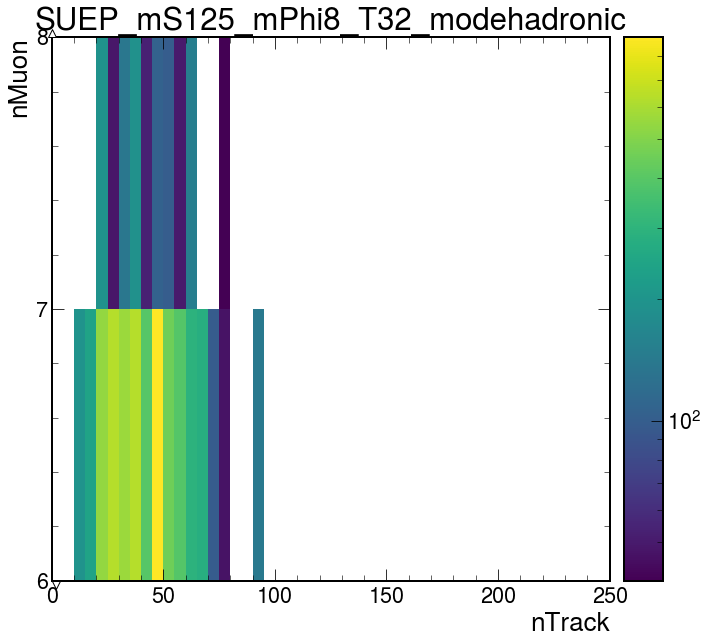

In [65]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    plots[dataset]['track_interiso_vs_nTrack_vs_nMuon'][::sum, :, 6j:].plot2d(norm=matplotlib.colors.LogNorm())
    plt.title(dataset.replace("_2018", "").replace("_TuneCP5_13TeV_pythia8", ""))
    plt.show()

In [72]:
plots['QCD_2018']['track_interiso_vs_nTrack_vs_nMuon'][::sum, 100j::sum, 7j::sum]

WeightedSum(value=0.0515227, variance=0.000709263)

In [76]:
plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][0.4j::sum, 99j, 7j::sum]

WeightedSum(value=0.0270713, variance=0.000660204)

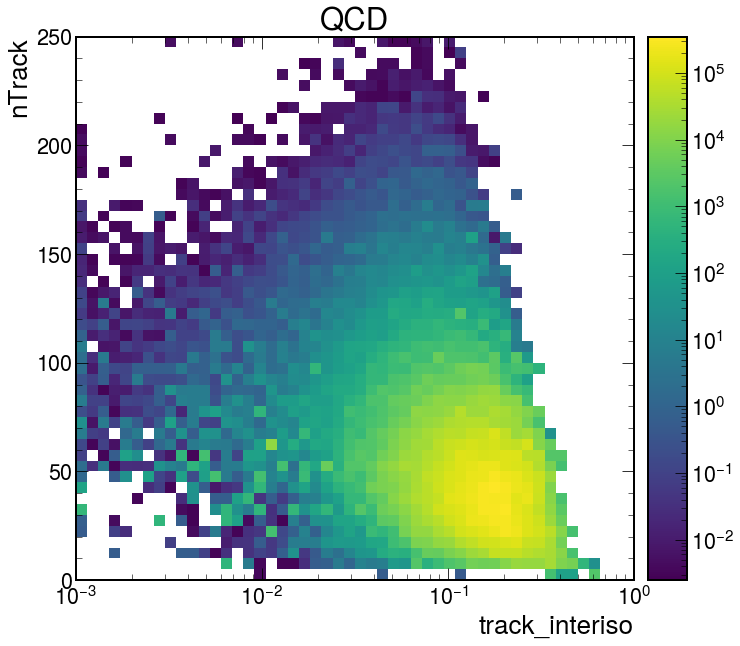

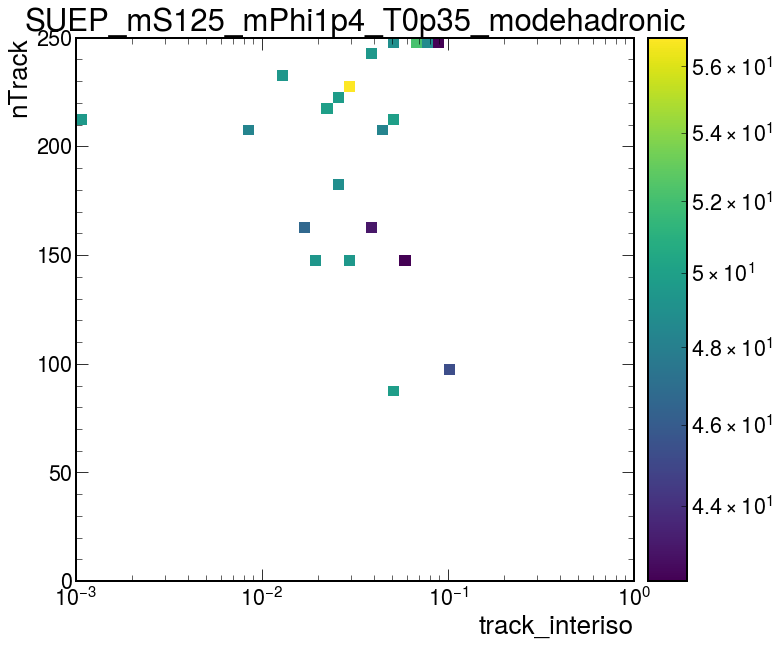

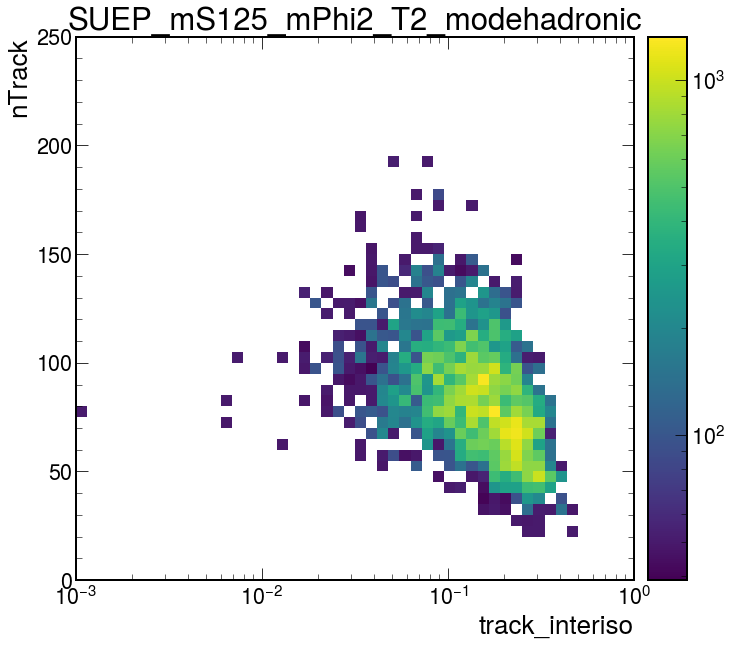

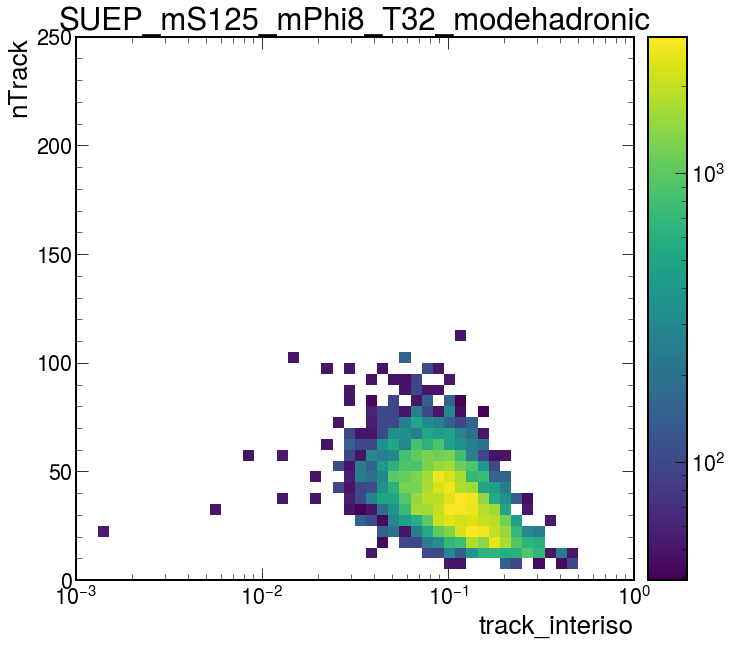

In [46]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    plots[dataset]['track_interiso_vs_nTrack_vs_nMuon'][:,: ,::sum].plot2d(norm=matplotlib.colors.LogNorm())
    plt.title(dataset.replace("_2018", "").replace("_TuneCP5_13TeV_pythia8", ""))
    plt.xscale('log')
    plt.show()

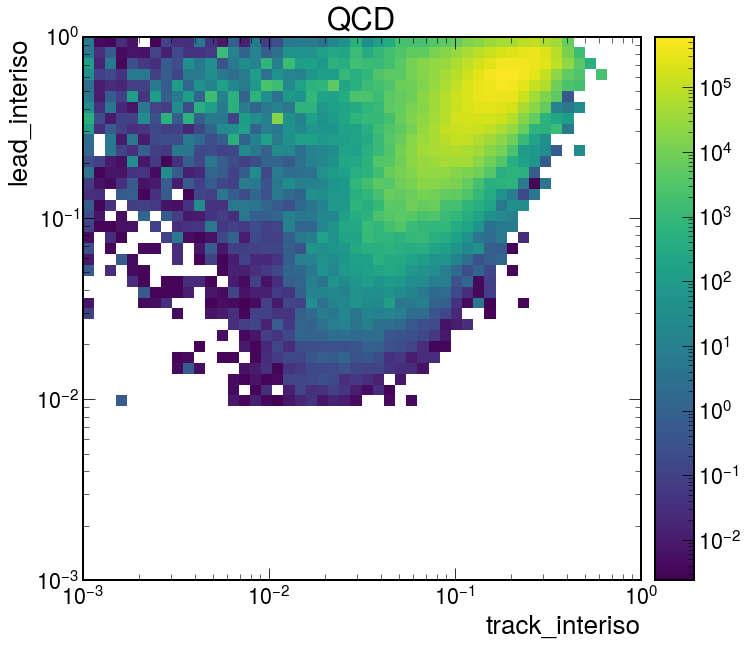

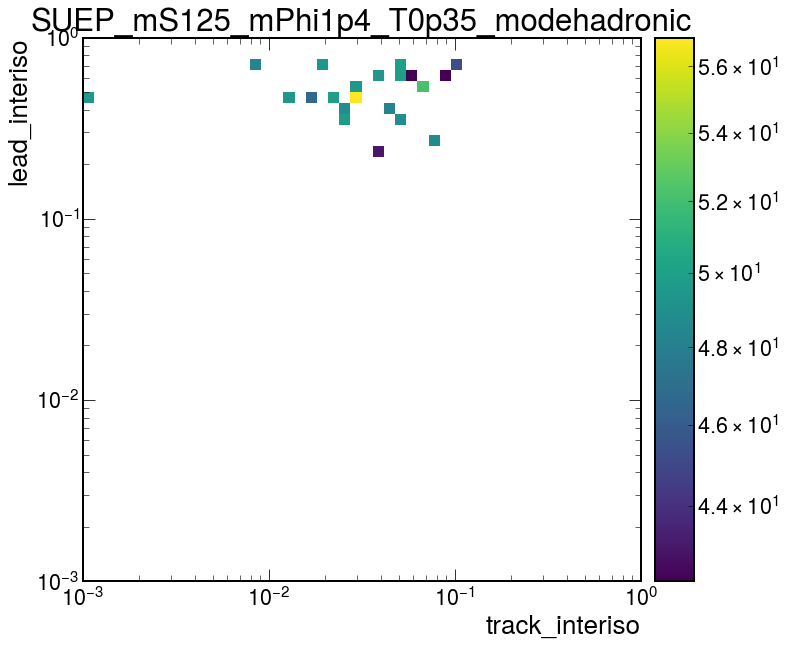

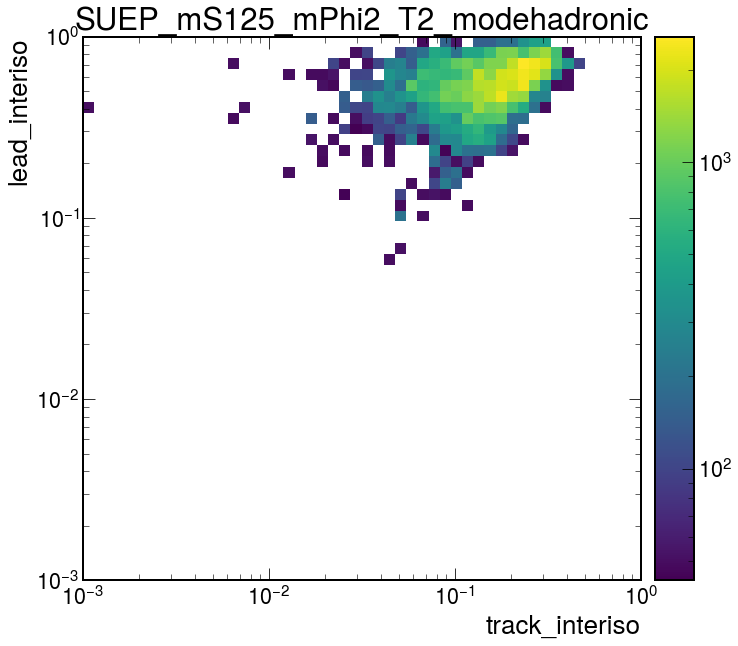

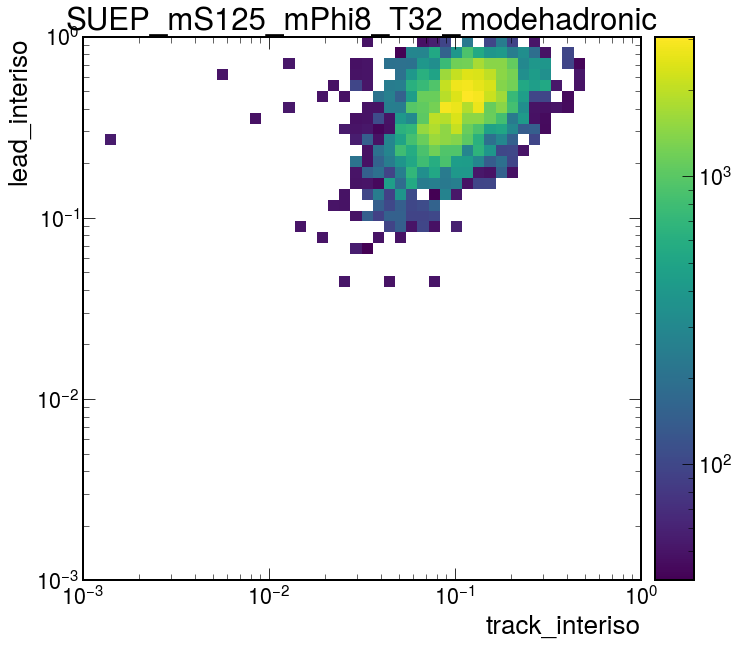

In [37]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    plots[dataset]['track_interiso_vs_lead_interiso'].plot2d(norm=matplotlib.colors.LogNorm())
    plt.title(dataset.replace("_2018", ""))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

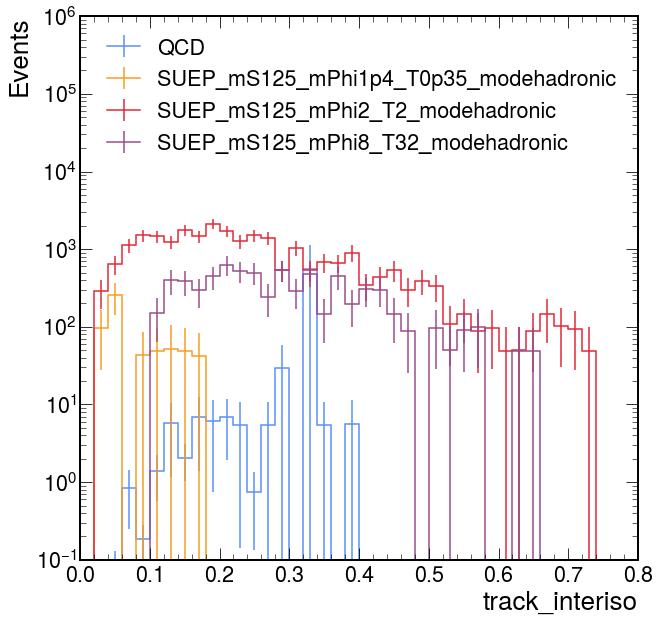

In [112]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['track_interiso_norm_vs_nTrack_vs_nMuon']
    histogram[:, ::sum, 6j::sum].plot(
        yerr=np.sqrt(histogram[:, ::sum, 6j::sum].variances()),
        label=dataset.replace("_2018",""),
    )
#plt.xscale('log')
plt.xlim(0, 0.8)
plt.ylim(1e-1, 1e6)
plt.yscale('log')
plt.ylabel('Events')
plt.legend()
plt.show()

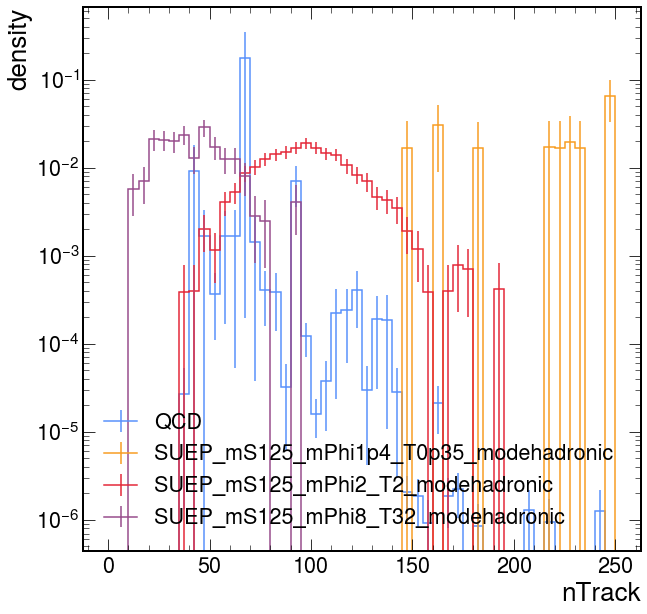

In [48]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['track_interiso_vs_nTrack_vs_nMuon']
    histogram[::sum, :, 6j::sum].plot(
        yerr=np.sqrt(histogram[::sum, :, 6j::sum].variances()),
        label=dataset.replace("_2018",""),
        density=True,
    )
plt.yscale('log')
plt.ylabel('density')
plt.legend()
plt.show()

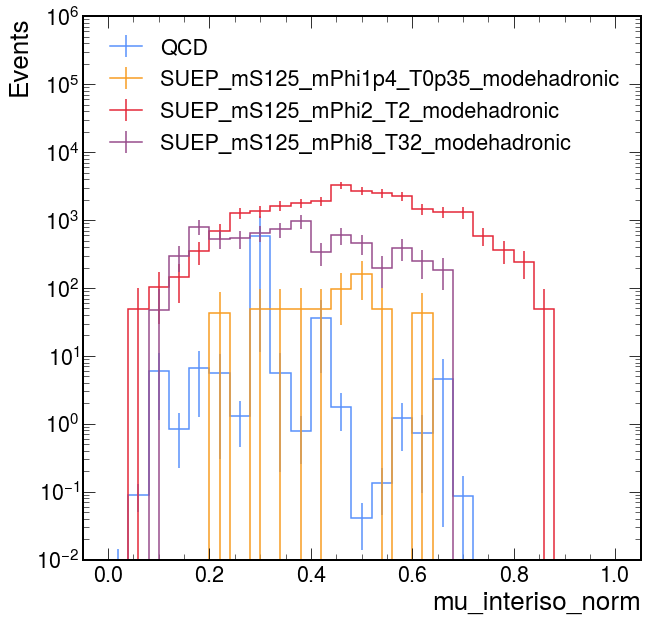

In [95]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['lead_interiso_norm_vs_muon_iso_cut_vs_nMuon']
    histogram[::2j, 99j, 6j::sum].plot(
        yerr=np.sqrt(histogram[::2j, 99j, 6j::sum].variances()),
        label=dataset.replace("_2018",""),
    )
plt.ylim(0.01, 1e6)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Events')
plt.legend()
plt.show()

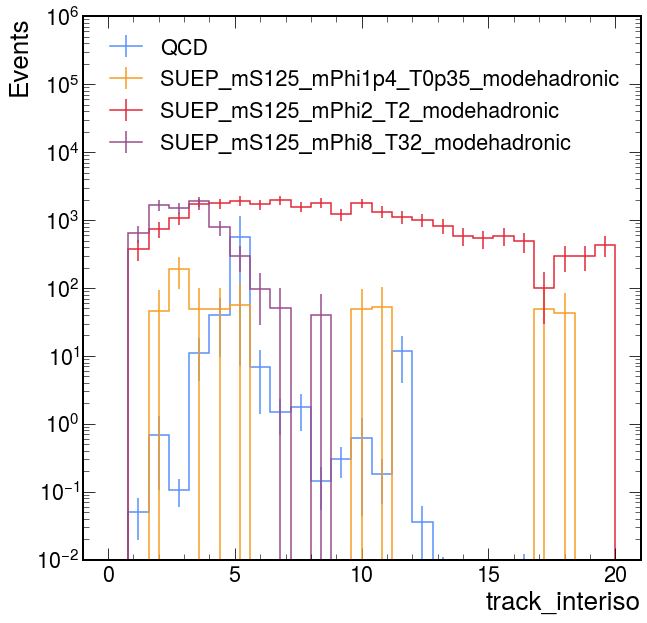

In [113]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['track_interiso_vs_lead_interiso_vs_nMuon']
    histogram[::2j, ::sum, 6j::sum].plot(
        yerr=np.sqrt(histogram[::2j, ::sum, 6j::sum].variances()),
        label=dataset.replace("_2018",""),
    )
plt.ylim(0.01, 1e6)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Events')
plt.legend()
plt.show()

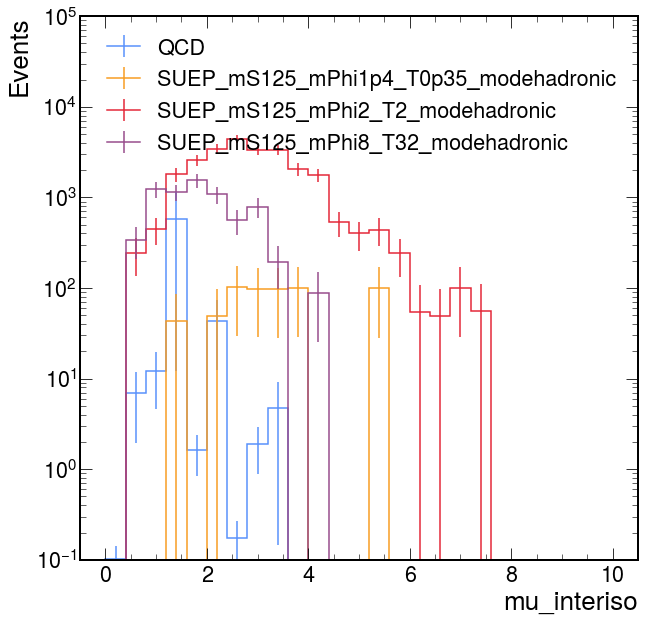

In [109]:
datasets = [
    'QCD_2018',
    'SUEP_mS125_mPhi1p4_T0p35_modehadronic_2018',
    'SUEP_mS125_mPhi2_T2_modehadronic_2018',
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

for dataset in datasets:
    histogram = plots[dataset]['track_interiso_vs_lead_interiso_vs_nMuon']
    histogram[::sum, ::2j, 6j::sum].plot(
        yerr=np.sqrt(histogram[::sum, ::2j, 6j::sum].variances()),
        label=dataset.replace("_2018",""),
    )
plt.ylim(0.1, 1e5)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Events')
plt.legend()
plt.show()

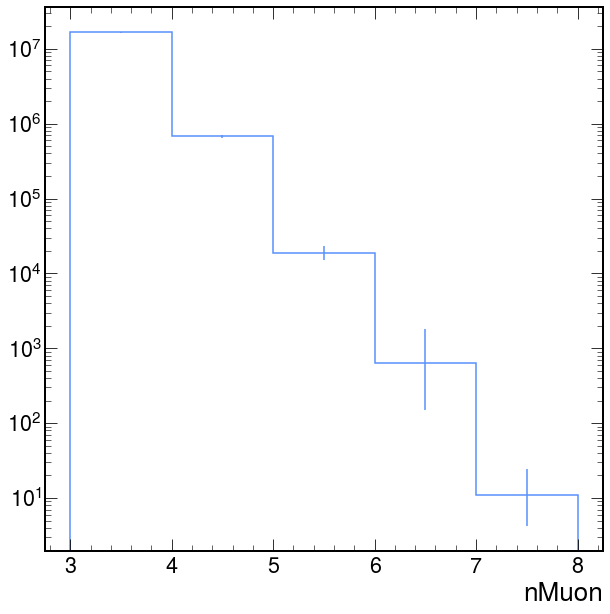

In [62]:
plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, 99j, :].plot()
plt.yscale('log')

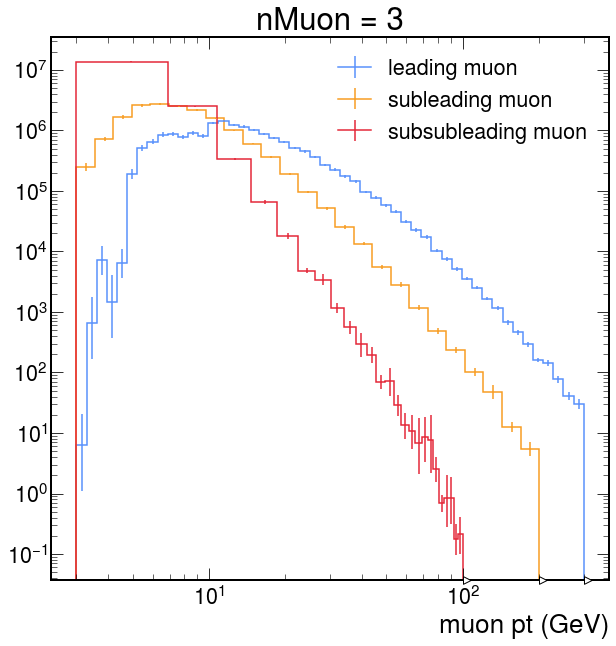

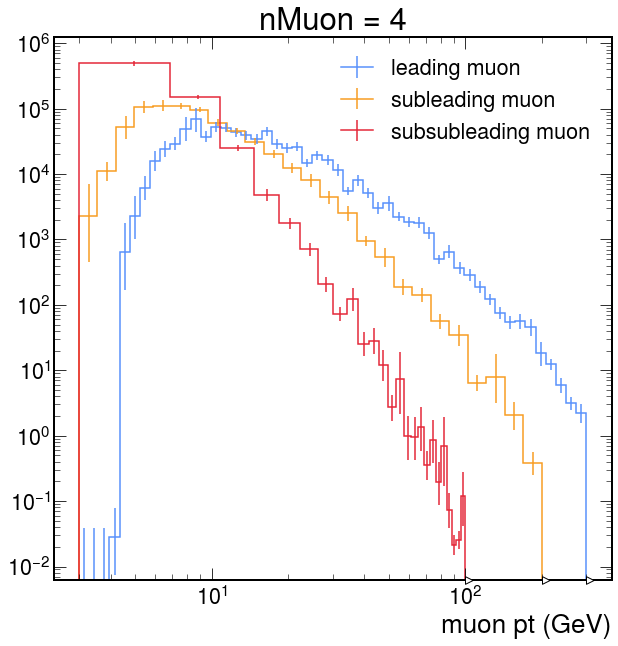

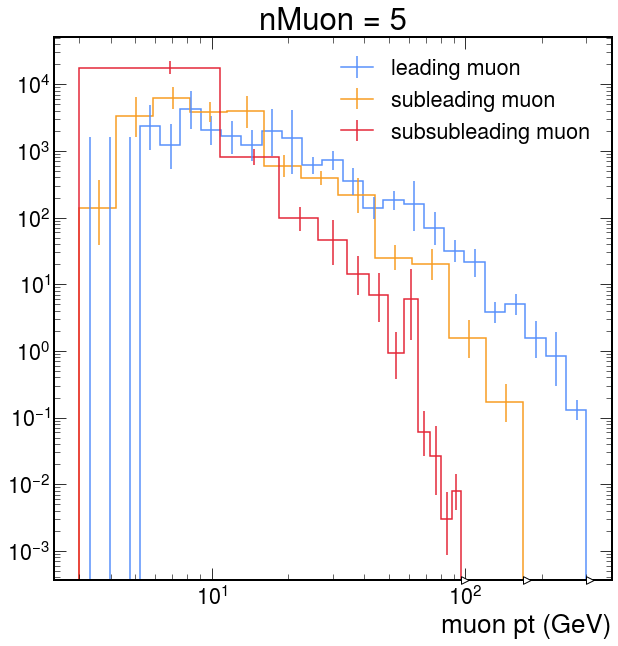

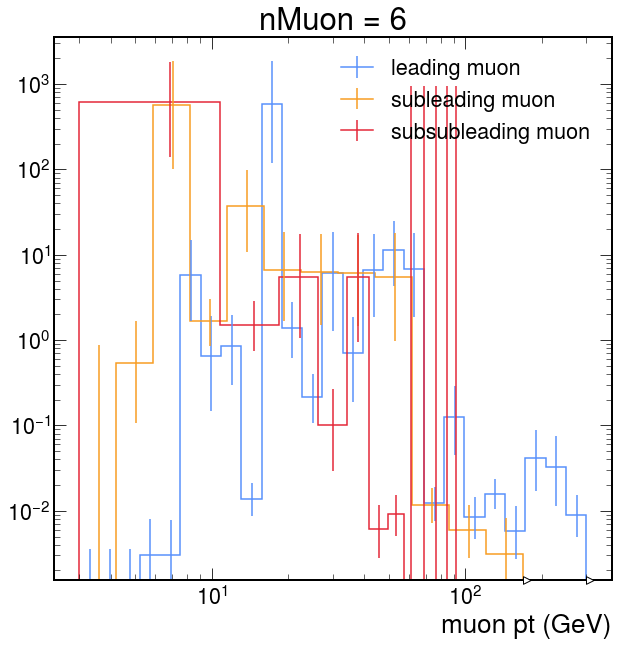

In [128]:
for nMuon in range(3, 5):
    plots["QCD_2018"]["mu_1_pt"][::2j, nMuon*1j].plot(label="leading muon")
    plots["QCD_2018"]["mu_2_pt"][::2j, nMuon*1j].plot(label="subleading muon")
    plots["QCD_2018"]["mu_3_pt"][::2j, nMuon*1j].plot(label="subsubleading muon")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('muon pt (GeV)')
    plt.title(f"nMuon = {nMuon}")
    plt.legend()
    plt.show()
    
for nMuon in range(5, 7):
    plots["QCD_2018"]["mu_1_pt"][::4j, nMuon*1j].plot(label="leading muon")
    plots["QCD_2018"]["mu_2_pt"][::4j, nMuon*1j].plot(label="subleading muon")
    plots["QCD_2018"]["mu_3_pt"][::4j, nMuon*1j].plot(label="subsubleading muon")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('muon pt (GeV)')
    plt.title(f"nMuon = {nMuon}")
    plt.legend()
    plt.show()

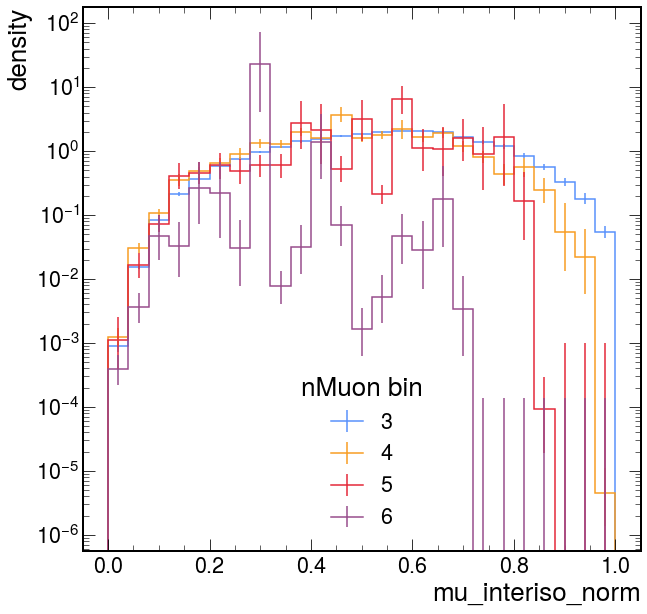

In [115]:
for nMuon in range(3, 7):
    plots['QCD_2018']['lead_interiso_norm_vs_muon_iso_cut_vs_nMuon'][::2j, 99j, nMuon*1j].plot(
        density=True,
        label=f"{nMuon}"
    )
#plt.xlim(0.01, 1)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('density')
plt.legend(title="nMuon bin")
plt.show()

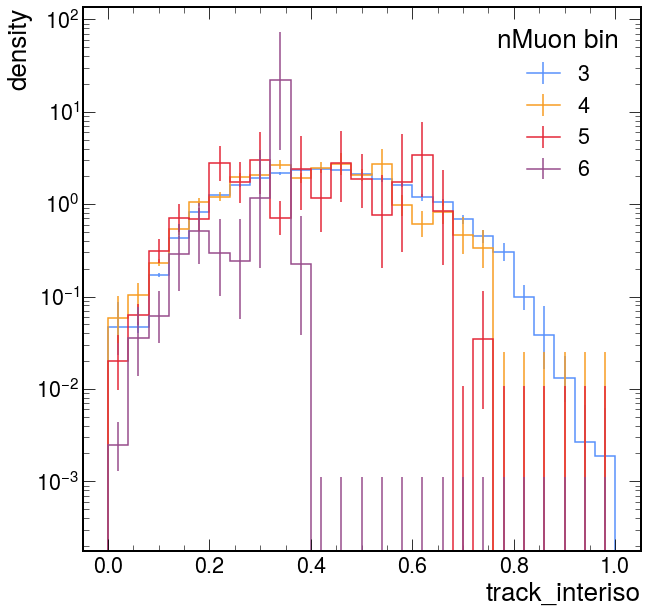

In [116]:
for nMuon in range(3, 7):
    plots['QCD_2018']['track_interiso_norm_vs_nTrack_vs_nMuon'][::2j, ::sum, nMuon*1j].plot(
        density=True,
        label=f"{nMuon}"
    )
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('density')
plt.legend(title="nMuon bin")
plt.show()

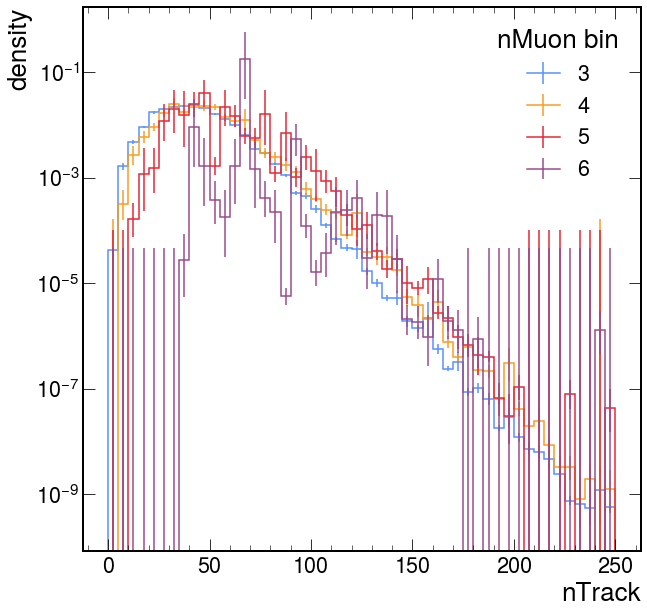

In [60]:
for nMuon in range(3, 7):
    plots['QCD_2018']['track_interiso_vs_nTrack_vs_nMuon'][::sum, :, nMuon*1j].plot(
        density=True,
        label=f"{nMuon}"
    )
plt.yscale('log')
plt.ylabel('density')
plt.legend(title="nMuon bin")
plt.show()

In [11]:
plots[
    'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018'
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, 99j, :]

Hist(Regular(5, 3, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=91.3637, variance=0.181344)

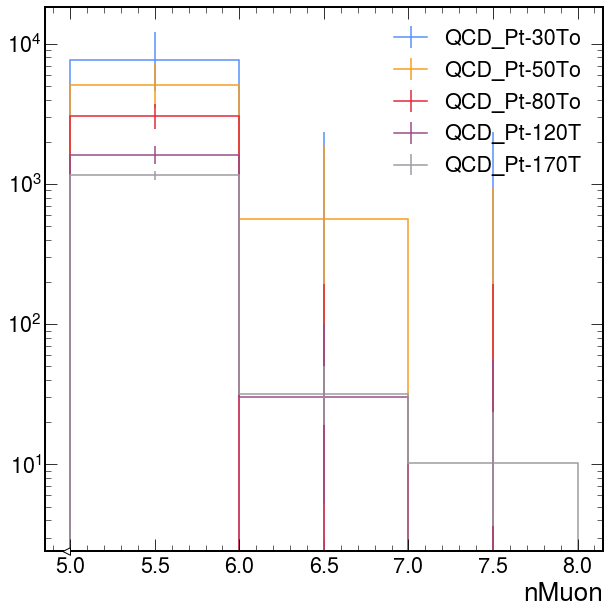

In [46]:
tag = "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018"
qcd_bins = [
#     f'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
    f'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
    f'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
    f'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
    f'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
    f'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
#     f'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{tag}',
]

qcd_bins_hists = []
for qcd_bin in qcd_bins:
    qcd_bins_hists.append(plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, 99j,5j:])

hep.histplot(qcd_bins_hists, label=[q_b[:11] for q_b in qcd_bins])
plt.yscale('log')
plt.legend()
plt.show()

In [28]:
mu_pt = {}
for nMuon in range(1, 8):
    population = histogram[f"mu_{nMuon}_pt"][:, ::sum].axes[0].edges[:-1] * 1.01
    weights = histogram[f"mu_{nMuon}_pt"][:, ::sum].values()
    mu_pt[nMuon] = np.array(random.choices(population, weights=weights, k=1_000_000))

In [29]:
interiso = np.zeros_like(mu_pt[1])
event_nMuon = 4
for nMuon in range(2, event_nMuon+1):
    interiso += mu_pt[nMuon]
interiso /= mu_pt[1]

In [33]:
h_interiso = hist.Hist.new.Regular(50, 0, 10, name='lead_interiso').Double().fill(interiso)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f7bc38af0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

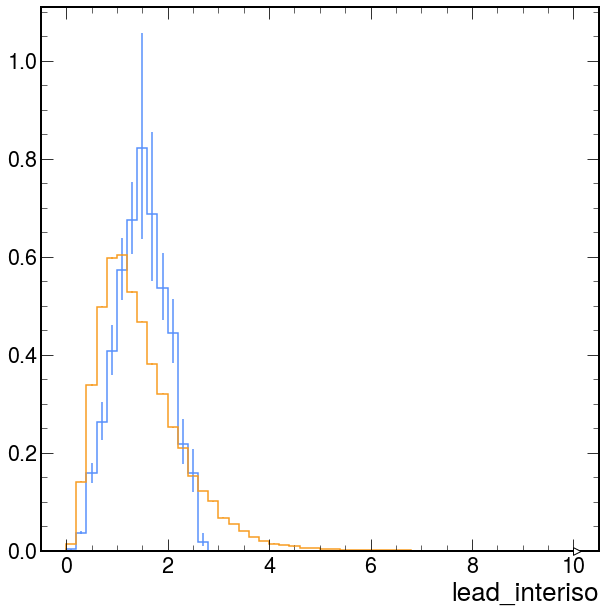

In [34]:
plots["QCD_2018"][
    "lead_interiso_vs_muon_iso_cut_vs_nMuon"
][:, 99j, 4j].plot(density=True, label=)
h_interiso.plot(density=True)

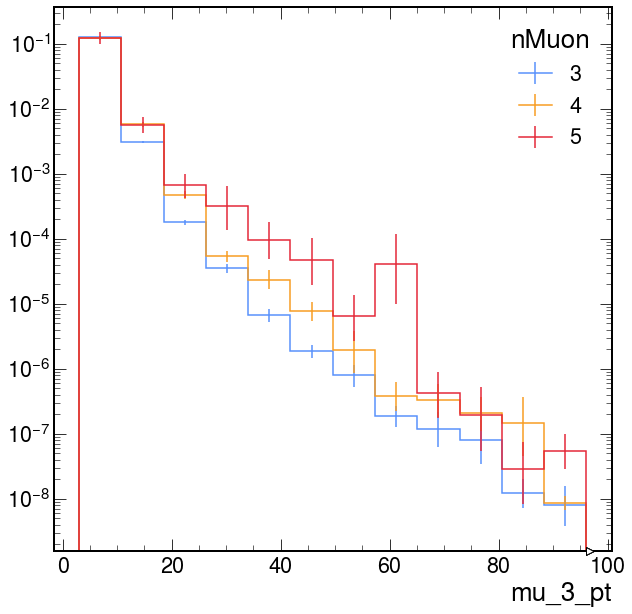

In [27]:
histogram = plots["QCD_2018"]

for nMuon in range(3, 6):
    histogram[f"mu_3_pt"][::4j, nMuon*1j].plot(label=f"{nMuon}", density=True)
#plt.xscale('log')
plt.yscale('log')
plt.legend(title="nMuon")
plt.show()

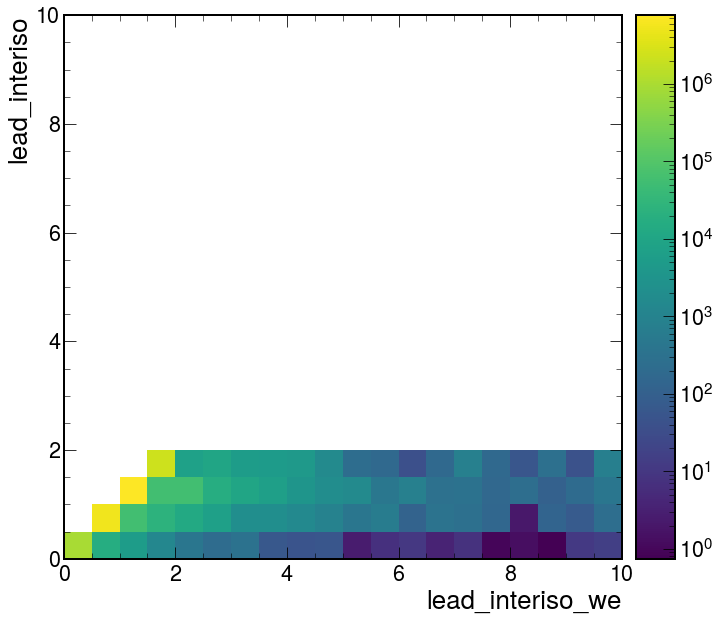

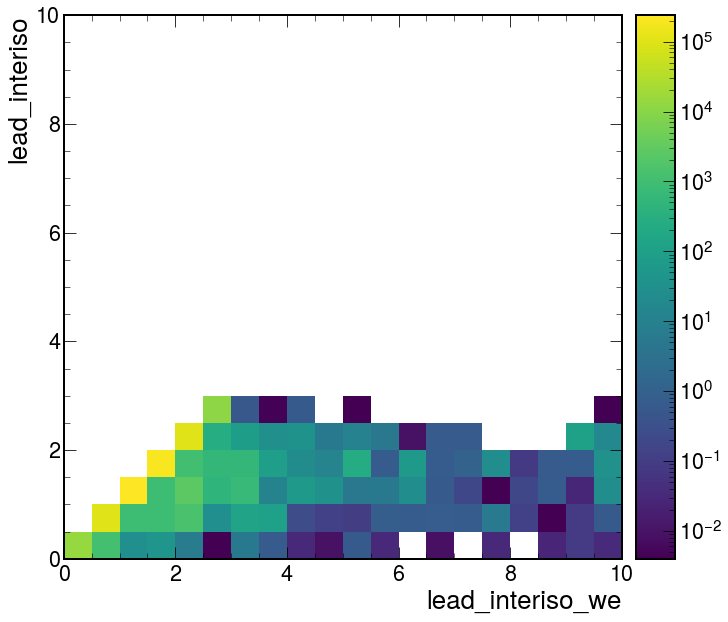

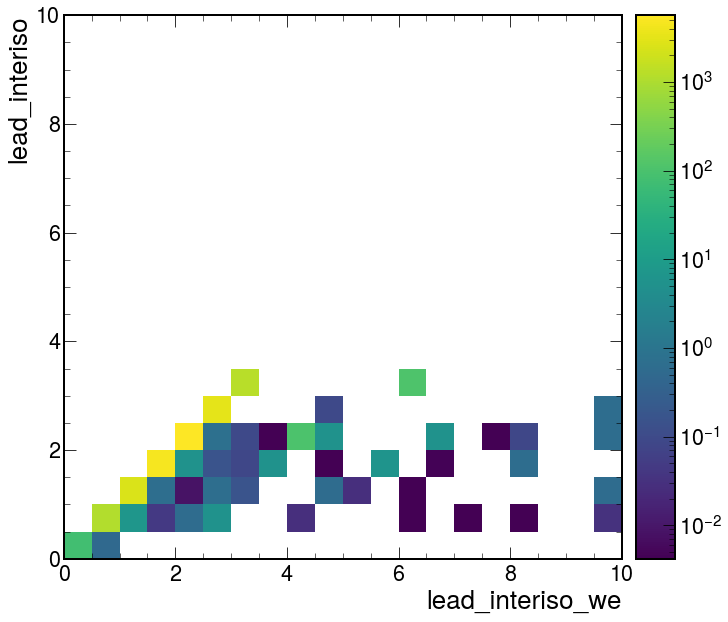

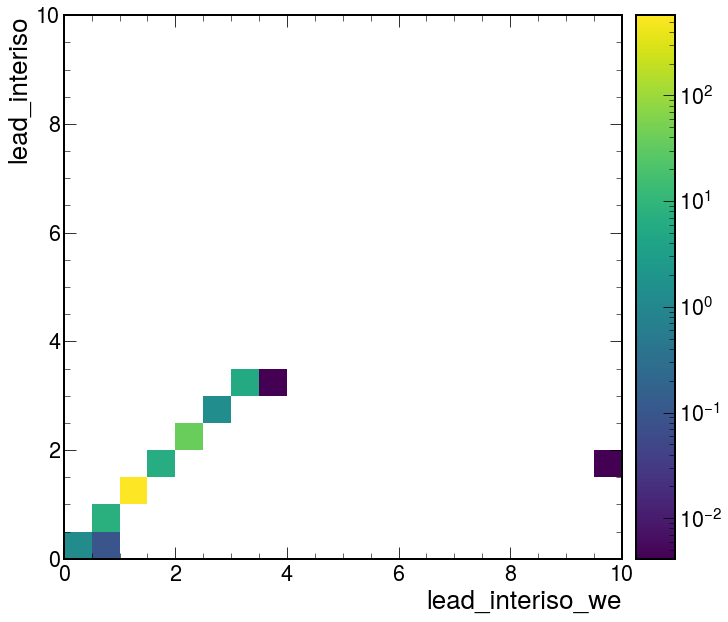

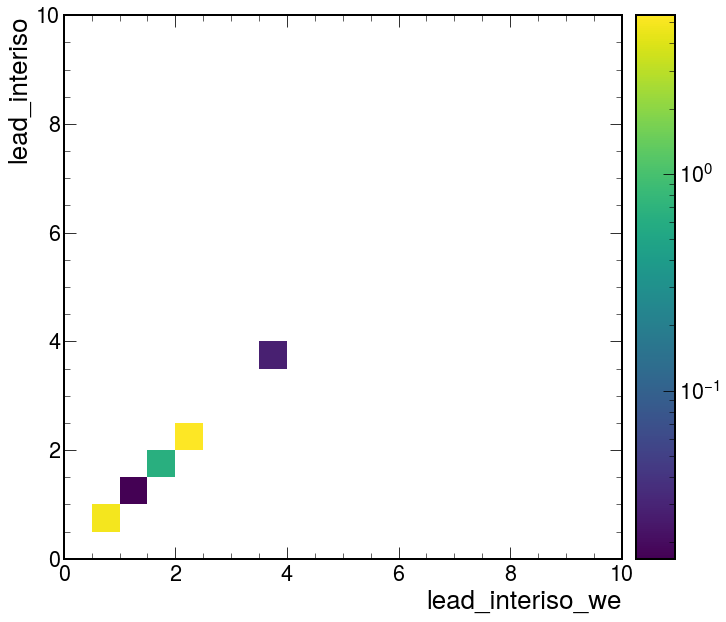

In [11]:
histogram = plots[
    "QCD_2018"
]['lead_interiso_we_vs_lead_interiso_vs_muon_iso_cut_vs_nMuon']

for nMuon in range(3, 8):
    histogram[:, :, 99j, nMuon*1j].plot2d(norm=matplotlib.colors.LogNorm())
    plt.show()

## Draw nMuon for QCD

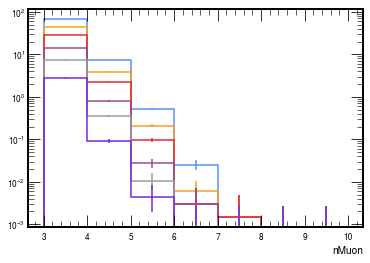

In [9]:
iso_cuts = [99j, 30j, 15j, 7j, 4j, 2j]
histogram = plots[
    "QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon']

for cut in iso_cuts:
    histogram[::sum, cut, :].plot()

plt.yscale('log')
plt.show()

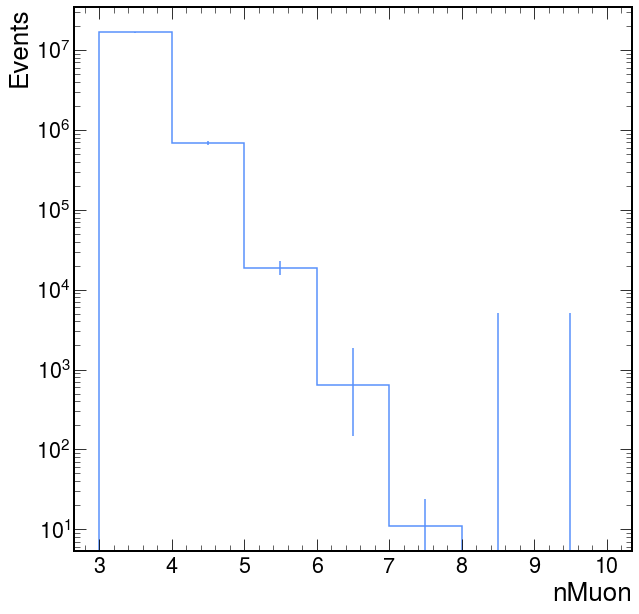

In [38]:
plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, 99j, :].plot()
plt.yscale('log')
plt.ylabel('Events')
plt.show()

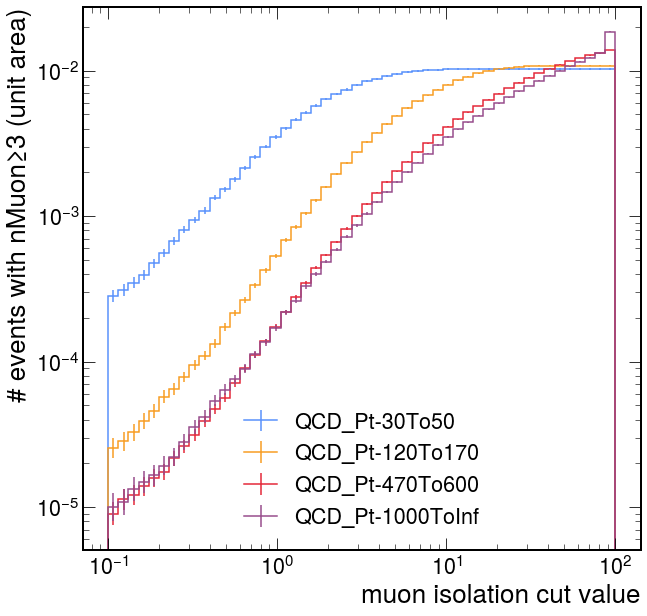

In [33]:
plots[
    "QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, :, ::sum].plot(density=True, label='QCD_Pt-30To50')
plots[
    "QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, :, ::sum].plot(density=True, label='QCD_Pt-120To170')
plots[
    "QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, :, ::sum].plot(density=True, label='QCD_Pt-470To600')
plots[
    "QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::sum, :, ::sum].plot(density=True, label='QCD_Pt-1000ToInf')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('muon isolation cut value')
plt.ylabel('# events with nMuon≥3 (unit area)')
plt.legend()
plt.show()

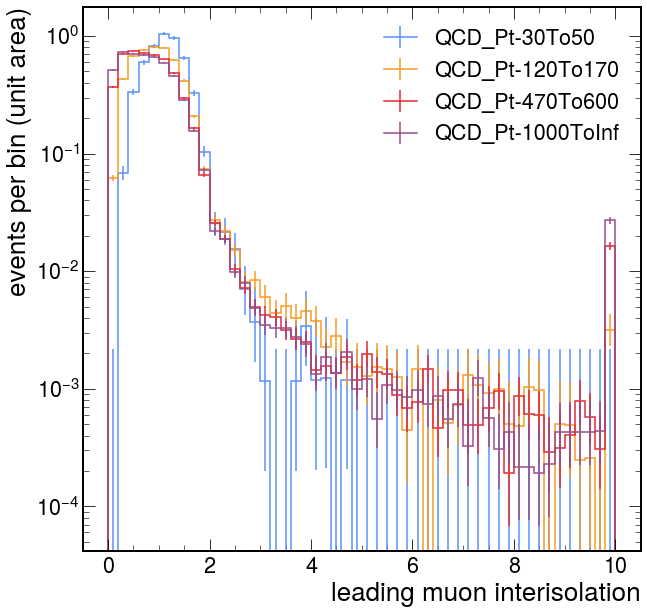

In [35]:
plots[
    "QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::2j, 99j, ::sum].plot(density=True, label='QCD_Pt-30To50')
plots[
    "QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::2j, 99j, ::sum].plot(density=True, label='QCD_Pt-120To170')
plots[
    "QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::2j, 99j, ::sum].plot(density=True, label='QCD_Pt-470To600')
plots[
    "QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+"+
    "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::2j, 99j, ::sum].plot(density=True, label='QCD_Pt-1000ToInf')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('leading muon interisolation')
plt.ylabel('events per bin (unit area)')
plt.legend()
plt.show()

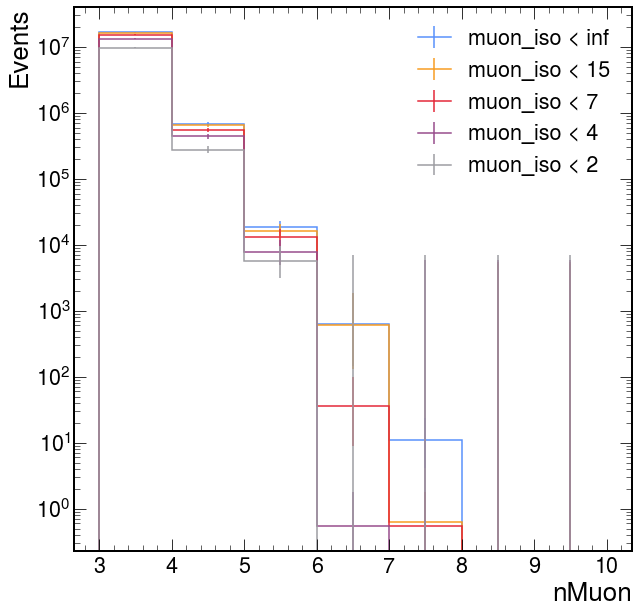

In [41]:
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][::sum, 99j, :].plot(label='muon_iso < inf')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][::sum, 15j, :].plot(label='muon_iso < 15')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][::sum, 7j, :].plot(label='muon_iso < 7')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][::sum, 4j, :].plot(label='muon_iso < 4')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][::sum, 2j, :].plot(label='muon_iso < 2')
plt.yscale('log')
plt.xlabel('nMuon')
plt.ylabel('Events')
plt.legend()
plt.show()

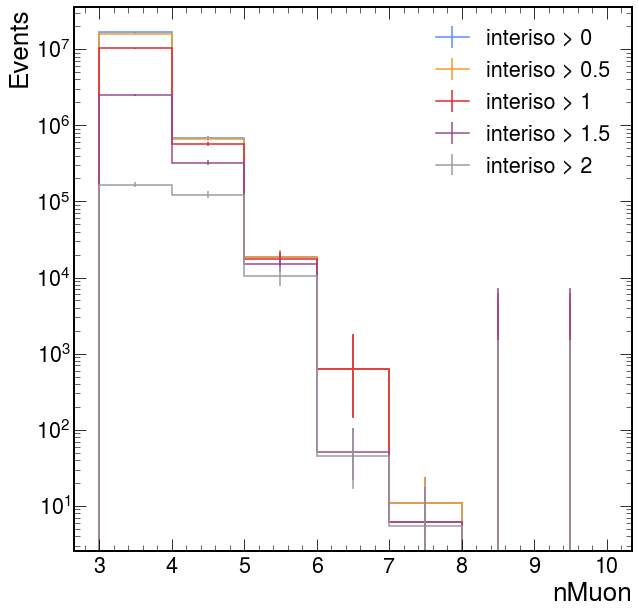

In [82]:
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][0::sum, 99j, :].plot(label='interiso > 0')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][0.5j::sum, 99j, :].plot(label='interiso > 0.5')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][1j::sum, 99j, :].plot(label='interiso > 1')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][1.5j::sum, 99j, :].plot(label='interiso > 1.5')
plots["QCD_2018"][
    'lead_interiso_vs_muon_iso_cut_vs_nMuon'
][2j::sum, 99j, :].plot(label='interiso > 2')
plt.yscale('log')
plt.xlabel('nMuon')
plt.ylabel('Events')
plt.legend()
plt.show()

## Explore fitting

In [10]:
hep.style.use("CMS")

In [12]:
def binomial(n, k, p):
    q = 1 - p
    coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return coeff * (p**k) * (q**(n-k))

def reweight_hist_binomially(h_i, p):
    h_f = h_i.copy().reset()
    edges = h_i.axes[0].edges.astype(int)
    for i in range(edges[0], edges[-1]):
        tot_val, tot_var = h0[i*1j].value, h0[i*1j].variance
        for j in range(edges[0], i+1):
            weight = binomial(i, j, p)
            h_f[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight * tot_var)
    return h_f

def reweight_hist_binomially_for_fit(data_x, p):
    y_out = np.zeros_like(data_y0)
    for i in range(len(data_x)):
        x_i = data_x[i]
        tot_val = data_y0[i]
        for j in range(0, i+1):
            x_j = data_x[j]
            weight = binomial(int(x_i), int(x_j), p)
            y_out[j] += weight * tot_val
    return y_out

QCD_Pt-15To20_MuEnri 0

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0                          │              Nfcn = 87               │
│ EDM = 0 (Goal: 0.0002)           │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   10e-1   │   0e-1    │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

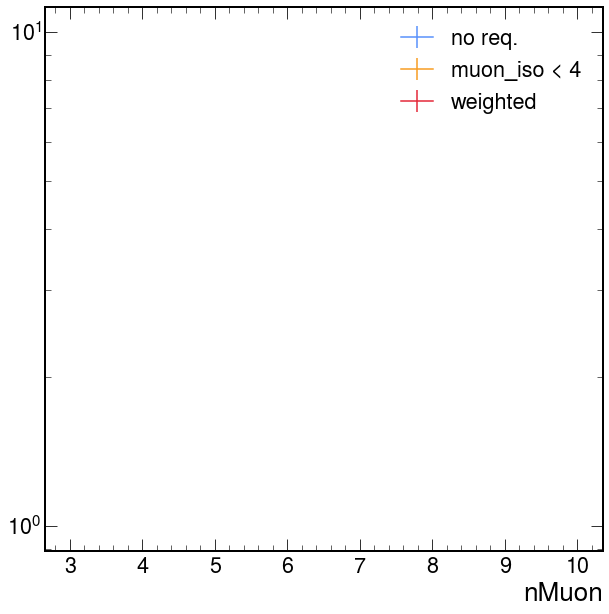

QCD_Pt-20To30_MuEnri 1

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.6e-13 (χ²/ndof = 0.0)    │              Nfcn = 35               │
│ EDM = 2.56e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │    1.0    │    0.6    │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 7.11e-07 │
└───┴──────────┘

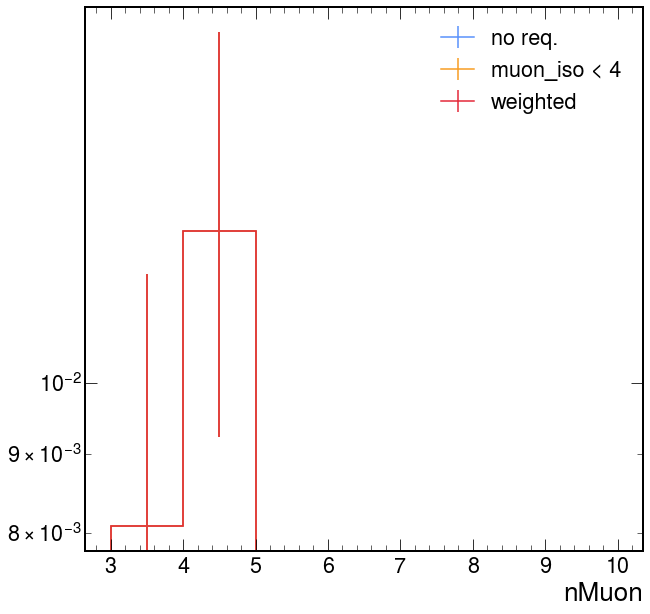

QCD_Pt-30To50_MuEnri 2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.272 (χ²/ndof = 0.6)      │              Nfcn = 40               │
│ EDM = 8.06e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.89    │   0.06    │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       p │
├───┼─────────┤
│ p │ 0.00337 │
└───┴─────────┘

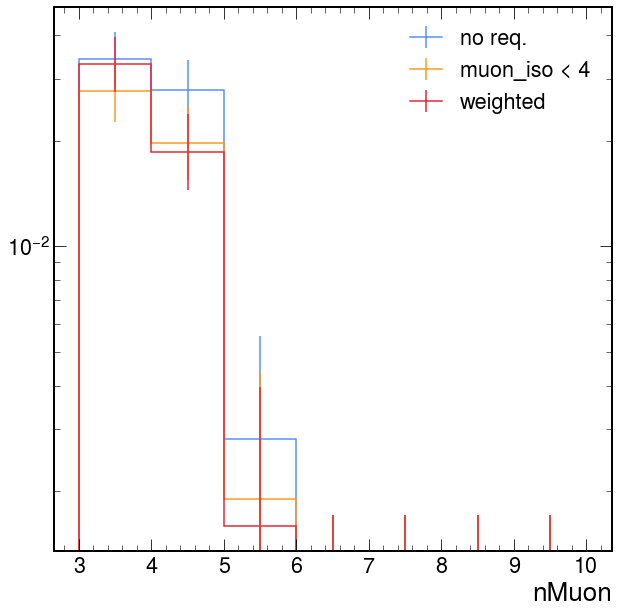

QCD_Pt-50To80_MuEnri 3

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.059 (χ²/ndof = 2.0)      │              Nfcn = 43               │
│ EDM = 2.07e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.793   │   0.030   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000932 │
└───┴──────────┘

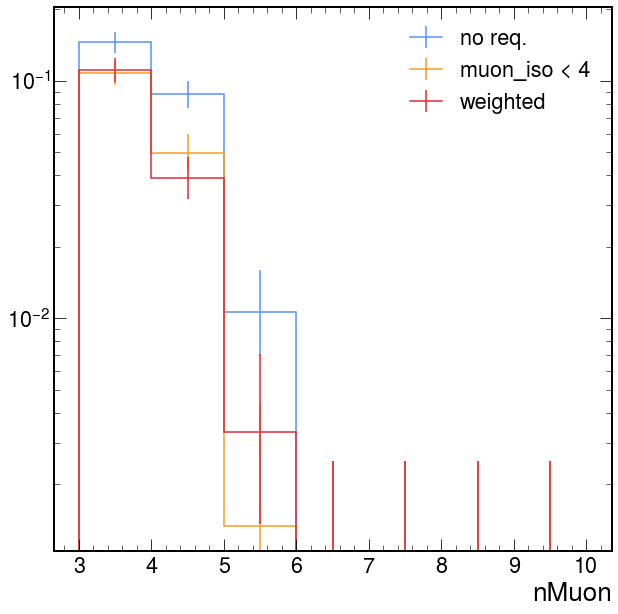

QCD_Pt-80To120_MuEnr 4

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.9433 (χ²/ndof = 0.5)     │              Nfcn = 46               │
│ EDM = 1.41e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.704   │   0.023   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────┐
│   │       p │
├───┼─────────┤
│ p │ 0.00051 │
└───┴─────────┘

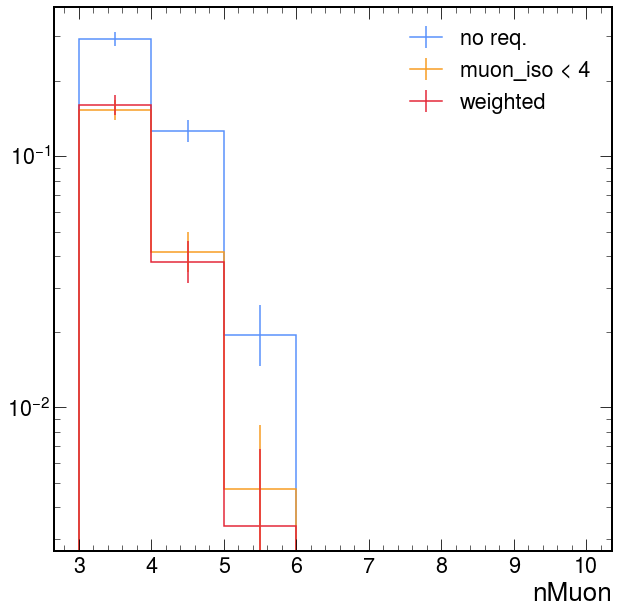

QCD_Pt-120To170_MuEn 5

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.03 (χ²/ndof = 0.5)       │              Nfcn = 43               │
│ EDM = 5.68e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.579   │   0.018   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000332 │
└───┴──────────┘

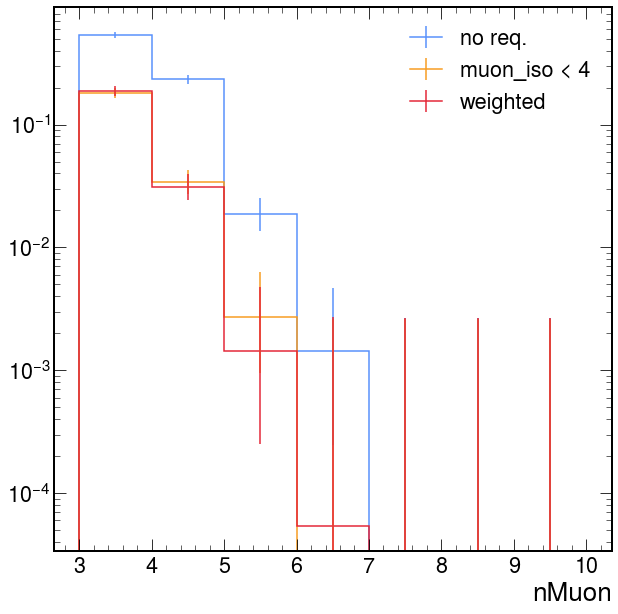

QCD_Pt-170To300_MuEn 6

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.942 (χ²/ndof = 1.0)      │              Nfcn = 47               │
│ EDM = 2.68e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.503   │   0.011   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000128 │
└───┴──────────┘

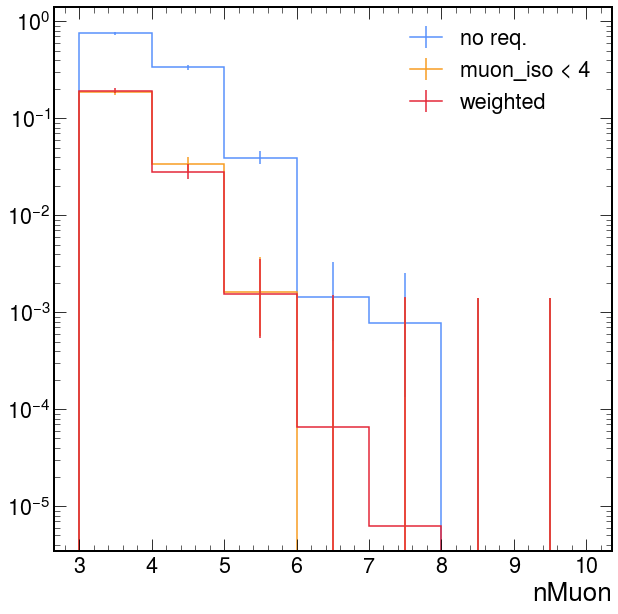

QCD_Pt-300To470_MuEn 7

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.44 (χ²/ndof = 3.2)       │              Nfcn = 59               │
│ EDM = 3.7e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.405   │   0.011   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000121 │
└───┴──────────┘

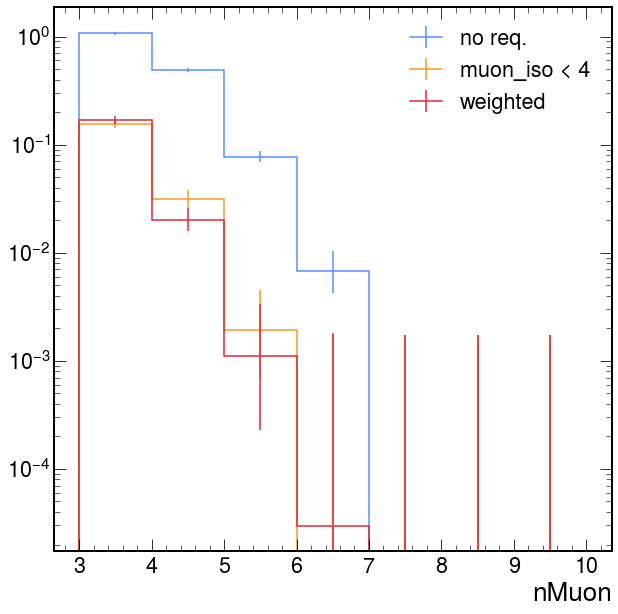

QCD_Pt-470To600_MuEn 8

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.797 (χ²/ndof = 2.4)      │              Nfcn = 45               │
│ EDM = 6.72e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.341   │   0.013   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000172 │
└───┴──────────┘

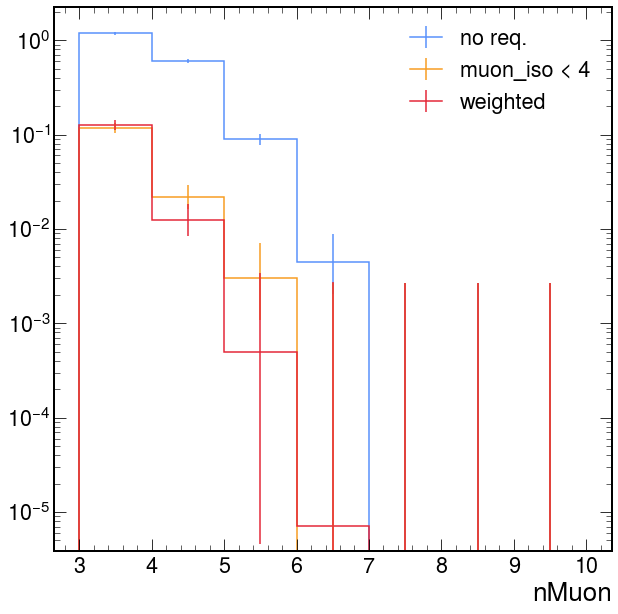

QCD_Pt-600To800_MuEn 9

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.545 (χ²/ndof = 3.3)      │              Nfcn = 41               │
│ EDM = 1.43e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.328   │   0.013   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000162 │
└───┴──────────┘

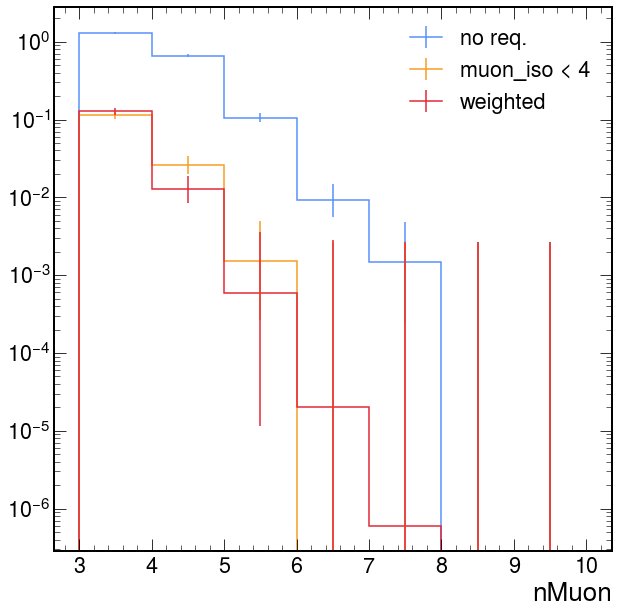

QCD_Pt-800To1000_MuE 10

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.364 (χ²/ndof = 0.7)      │              Nfcn = 44               │
│ EDM = 1.35e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.326   │   0.010   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 9.97e-05 │
└───┴──────────┘

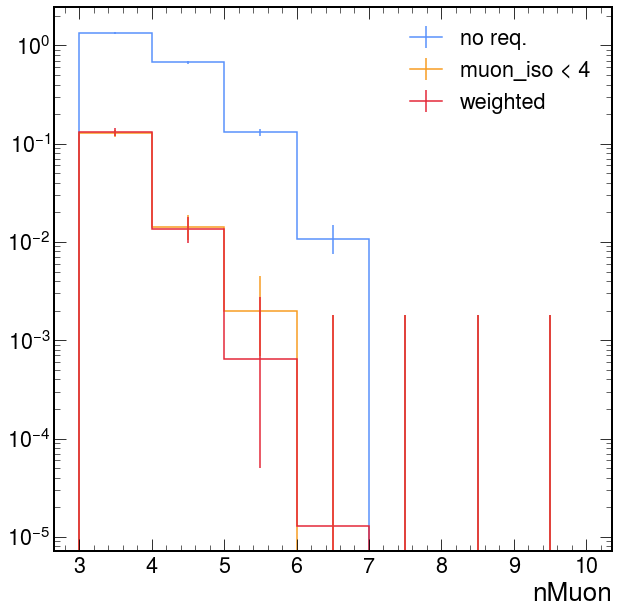

QCD_Pt-1000_MuEnrich 11

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.739 (χ²/ndof = 1.4)      │              Nfcn = 39               │
│ EDM = 7.85e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.312   │   0.014   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000195 │
└───┴──────────┘

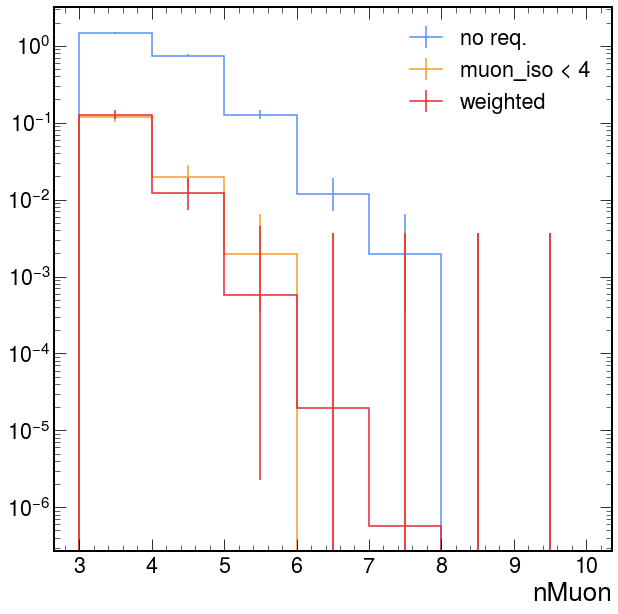

In [13]:
iso_cut = 4j
interiso_cut = 2j
qcd_bins = [
    'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
    'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018',
]

p_values_fitted = []

k = 0 
for qcd_bin in qcd_bins:
    print(qcd_bin[:20], k)
    k += 1
    histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h0 = histogram[interiso_cut::sum, 99j, :]
    h1 = histogram[interiso_cut::sum, iso_cut, :]
    
    data_x = h1.axes[0].edges[:-1]
    data_y0 = h0.values()
    data_y = h1.values()
    data_yerr = np.sqrt(h1.variances())
    
    not_zero = (data_yerr > 0) & (data_y > 0)
    data_x = data_x[not_zero]
    data_y0 = data_y0[not_zero]
    data_y = data_y[not_zero]
    data_yerr = data_yerr[not_zero]
        
    least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
    m = Minuit(least_squares, p=1)
    m.limits = [(0, 1)]
    m.migrad()
    m.hesse()
    print(m)
    
    h2 = reweight_hist_binomially(h0, m.values["p"])
    p_values_fitted.append(m.values["p"])

    h0.plot(label=f"no req.")
    h1.plot(label=f"muon_iso < {iso_cut}?".replace("j?", ""))
    h2.plot(label=f"weighted")
    plt.yscale('log')
    plt.legend()
    plt.show()

In [14]:
p_values_fitted

[0.9999990463259868,
 0.999999977486208,
 0.8923480282228895,
 0.7925835968359783,
 0.7041406725955774,
 0.5792979776708629,
 0.5025962978185038,
 0.40504292610693154,
 0.3411357795997074,
 0.32791200278792126,
 0.3259798651565222,
 0.31176887372827355]

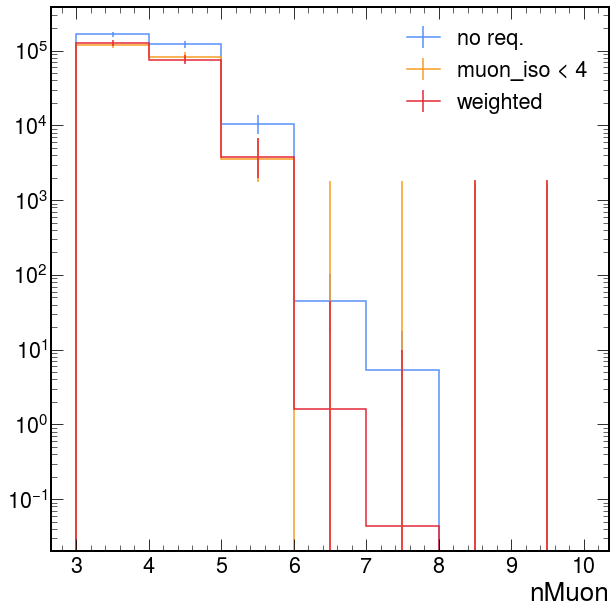

In [15]:
xsecs = [2800000.0, 2527000.0, 1367000.0, 381700.0, 87740.0, 21280.0, 7000.0, 622.6, 58.9, 18.12, 3.318, 1.085]

histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
h0 = histogram[interiso_cut::sum, 99j, :].copy()
h1 = histogram[interiso_cut::sum, iso_cut, :].copy()
h2 = h0.copy().reset()

k = 0 
for p_value, qcd_bin, xsec in zip(p_values_fitted, qcd_bins, xsecs):
    histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h_i_0 = histogram[interiso_cut::sum, 99j, :].copy() * xsec
    h_i = h_i_0.copy().reset()
    for i in range(3, 10):
        tot_val, tot_var = h_i_0[i*1j].value, h_i_0[i*1j].variance
        for j in range(3, i+1):
            weight = binomial(i, j, p_value)
            h_i[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight * tot_var)
    h2 += h_i

h0.plot(label=f"no req.")
h1.plot(label=f"muon_iso < {iso_cut}?".replace("j?", ""))
h2.plot(label=f"weighted")
plt.yscale('log')
plt.legend()
plt.show()

## Wrap everything inside a function

In [21]:
def qcd_estimate_plot(iso_cut=0, interiso_cut=0, nMuon_cut=0):
    suffix = "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
    qcd_bins = [
        f'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
    ]
    xsecs = [2800000, 2527000, 1367000, 381700, 87740, 21280, 7000, 622.6, 58.9, 18.12, 3.318, 1.085]
    p_values_fitted = []
    for qcd_bin in qcd_bins:
        histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h0 = histogram[interiso_cut::sum, 99j, :]
        h1 = histogram[interiso_cut::sum, iso_cut, :]
        data_x = h1.axes[0].edges[:-1]
        global data_y0
        data_y0 = h0.values()
        data_y = h1.values()
        data_yerr = np.sqrt(h1.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x = data_x[not_zero]
        data_y0 = data_y0[not_zero]
        data_y = data_y[not_zero]
        data_yerr = data_yerr[not_zero]
        least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
        m = Minuit(least_squares, p=1)
        m.limits = [(0, 1)]
        m.migrad()
        m.hesse()
        p_values_fitted.append(m.values["p"])
    
    histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h0 = histogram[interiso_cut::sum, 99j, :].copy()
    h1 = histogram[interiso_cut::sum, iso_cut, :].copy()
    h2 = h0.copy().reset()

    k = 0 
    for p_value, qcd_bin, xsec in zip(p_values_fitted, qcd_bins, xsecs):
        histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h_i_0 = histogram[interiso_cut::sum, 99j, :].copy() * xsec
        h_i = h_i_0.copy().reset()
        for i in range(3, 10):
            tot_val, tot_var = h_i_0[i*1j].value, h_i_0[i*1j].variance
            for j in range(3, i+1):
                weight = binomial(i, j, p_value)
                h_i[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight**2 * tot_var)
        h2 += h_i
    
    return h2

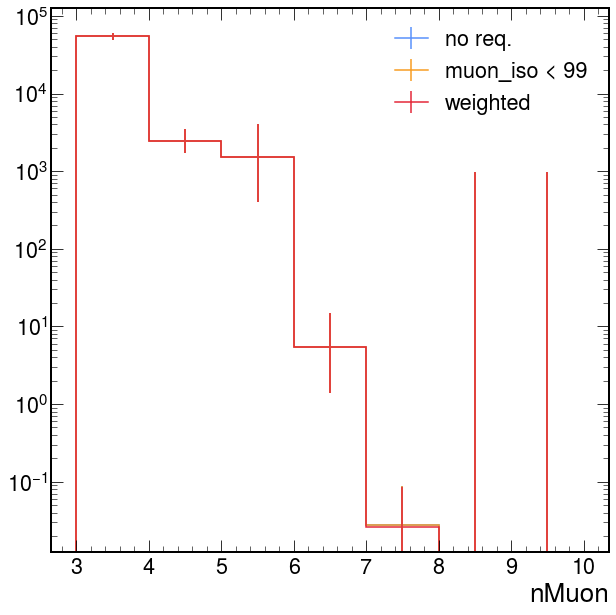

In [17]:
interiso_cut = 3j
iso_cut = 99j

histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
h0 = histogram[interiso_cut::sum, 99j, :].copy()
h1 = histogram[interiso_cut::sum, iso_cut, :].copy()
h2 = qcd_estimate(iso_cut=iso_cut, interiso_cut=interiso_cut, nMuon_cut=0)

h0.plot(label=f"no req.")
h1.plot(label=f"muon_iso < {iso_cut}?".replace("j?", ""))
h2.plot(label=f"weighted")
plt.yscale('log')
plt.legend()
plt.show()

In [40]:
nMuon_cut = 7j
print(f"mc: {h1[nMuon_cut::sum].value:.3f} ± {np.sqrt(h1[nMuon_cut::sum].variance):.3f}")
print(f"pred: {h2[nMuon_cut::sum].value:.2f} ± {np.sqrt(h2[nMuon_cut::sum].variance):.2f}")

mc: 0.028 ± 0.027

pred: 0.03 ± 0.03

In [60]:
histogram[3.4j::sum, 99j, 6j::sum]

WeightedSum(value=0.126601, variance=0.00860244)

In [61]:
histogram[4j::sum, 99j, 6j::sum]

WeightedSum(value=0.00425948, variance=1.16858e-05)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f466b2d1880>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f466b280040>, text=[])

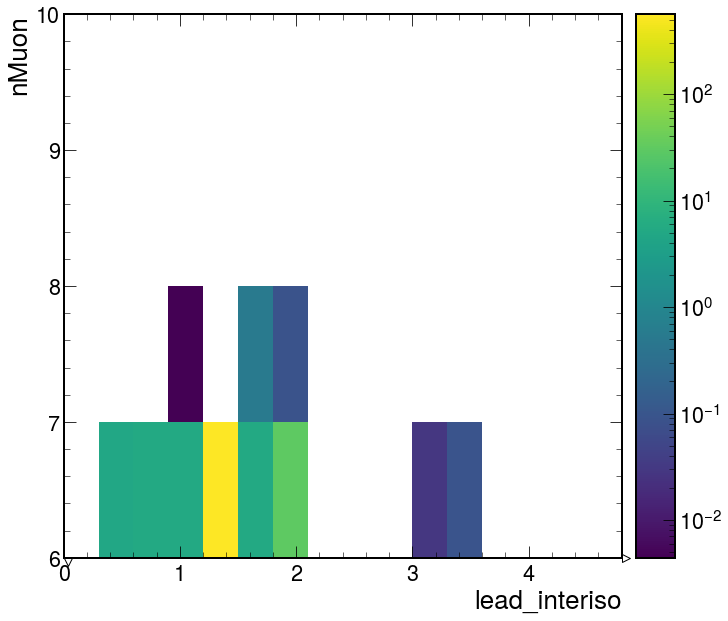

In [66]:
hep.hist2dplot(histogram[:5j:3j, 15j, 6j:], norm=matplotlib.colors.LogNorm())

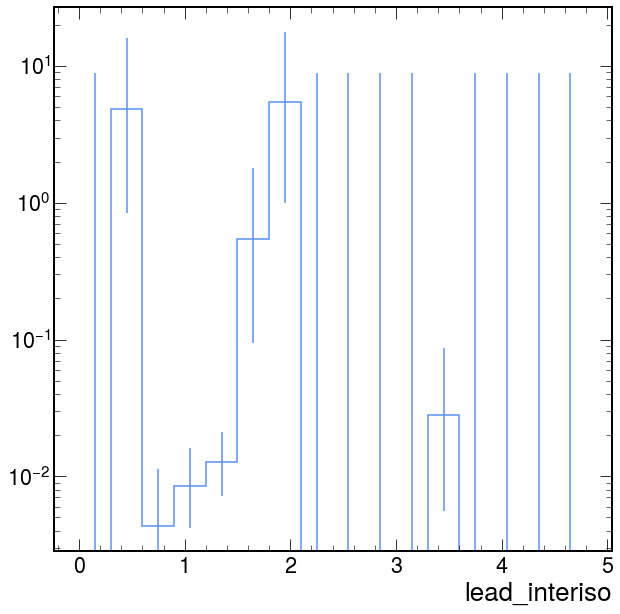

In [65]:
hep.histplot(histogram[:5j:3j, 99j, 7j::sum])
plt.yscale('log')

In [ ]:
# nice cuts
(4j, 99j, 6j)
(2.5j, 99j, 7j)

## Significance scan

In [20]:
def qcd_estimate(iso_cut=0, interiso_cut=0, nMuon_cut=0):
    suffix = "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
    qcd_bins = [
        f'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
        f'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+{suffix}',
    ]
    xsecs = [2800000, 2527000, 1367000, 381700, 87740, 21280, 7000, 622.6, 58.9, 18.12, 3.318, 1.085]
    p_values_fitted = []
    for qcd_bin in qcd_bins:
        histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h0 = histogram[interiso_cut::sum, 99j, :]
        h1 = histogram[interiso_cut::sum, iso_cut, :]
        data_x = h1.axes[0].edges[:-1]
        global data_y0
        data_y0 = h0.values()
        data_y = h1.values()
        data_yerr = np.sqrt(h1.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x = data_x[not_zero]
        data_y0 = data_y0[not_zero]
        data_y = data_y[not_zero]
        data_yerr = data_yerr[not_zero]
        least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
        m = Minuit(least_squares, p=1)
        m.limits = [(0, 1)]
        m.migrad()
        m.hesse()
        p_values_fitted.append(m.values["p"])
    histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h0 = histogram[interiso_cut::sum, 99j, :].copy()
    h1 = histogram[interiso_cut::sum, iso_cut, :].copy()
    h2 = h0.copy().reset()
    k = 0 
    for p_value, qcd_bin, xsec in zip(p_values_fitted, qcd_bins, xsecs):
        histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h_i_0 = histogram[interiso_cut::sum, 99j, :].copy() * xsec
        h_i = h_i_0.copy().reset()
        for i in range(3, 10):
            tot_val, tot_var = h_i_0[i*1j].value, h_i_0[i*1j].variance
            for j in range(3, i+1):
                weight = binomial(i, j, p_value)
                h_i[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight**2 * tot_var)
        h2 += h_i
    return h2[nMuon_cut::sum]


def loop_over_iso(args):
    y, h_p_y, proc = args[0], args[1], args[2]
    h_p_y_cumsum = h_p_y[:, y, :].copy().reset()
    for z in range(7):
        for x in range(100):
            # Note: the Muon iso axis (y) shouldn't be summed
            val = h_p_y[x::sum, y , z::sum].value
            var = h_p_y[x::sum, y, z::sum].variance
            if proc == "QCD_2018":
                # muon_iso extrapolation
                qcd_est = qcd_estimate(iso_cut=y, interiso_cut=x, nMuon_cut=z)
                val_new = qcd_est.value
                var_new = qcd_est.variance
                if ((val_new > val) and (np.sqrt(var)/val > 0.6)) or np.isclose(val, 0):
                    val, var = val_new, var_new
                # Insert interiso interpolation here
            h_p_y_cumsum[x, z] = hist.accumulators.WeightedSum(val, var)
        # Now apply corrections
        values = h_p_y_cumsum[:, z].values()
        variances = h_p_y_cumsum[:, z].variances()
        # Make sure negative yields don't propagate outside of the process
        variances[variances < 0] = -variances[variances < 0]
        values[values < 0] = 0
        # Let's add a 30% total systematic
        variances = (1.0**2 + 0.3**2) * variances
        for x in range(100):
            h_p_y_cumsum[x, z] = hist.accumulators.WeightedSum(values[x], variances[x])
    return y, h_p_y_cumsum

def process_sum(process, progress, task_id):
    hist_name = 'lead_interiso_vs_muon_iso_cut_vs_nMuon'
    h_p = plots[process][hist_name].copy()
    h_p_cumsum = h_p.copy().reset()
    with multiprocessing.Pool() as pool:
        args = zip(range(50), 50*[h_p], 50*[process])
        results = pool.imap(loop_over_iso, args)
        for y_i, result in results:
            for x_i in range(100):
                for z_i in range(7):
                    h_p_cumsum[x_i, y_i, z_i] = result[x_i, z_i]
            progress.update(task_id, advance=1, refresh=True)
    return h_p_cumsum

def get_B_yields():
    """
    Calculates total bkg yields after cutting along each axis
    """
    processes = [
        'Other_2018',
        'VV_2018',
        'TT_powheg_2018',
        'DY_2018',
        'QCD_2018',
    ]
    h_cumsums = {}
    with Progress() as progress:
        task_id = progress.add_task("Building B sums...", total=50*len(processes))
        for p in processes:
            h_cumsums[p] = process_sum(p, progress, task_id)
    h_bkg_cumsum = h_cumsums[processes[0]].copy().reset()
    for p in processes:
        h_bkg_cumsum += h_cumsums[p]
    return h_bkg_cumsum

In [23]:
B_yields = get_B_yields()

Building B sums... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f87b5a6cc70>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f87b51e03d0>, text=[])

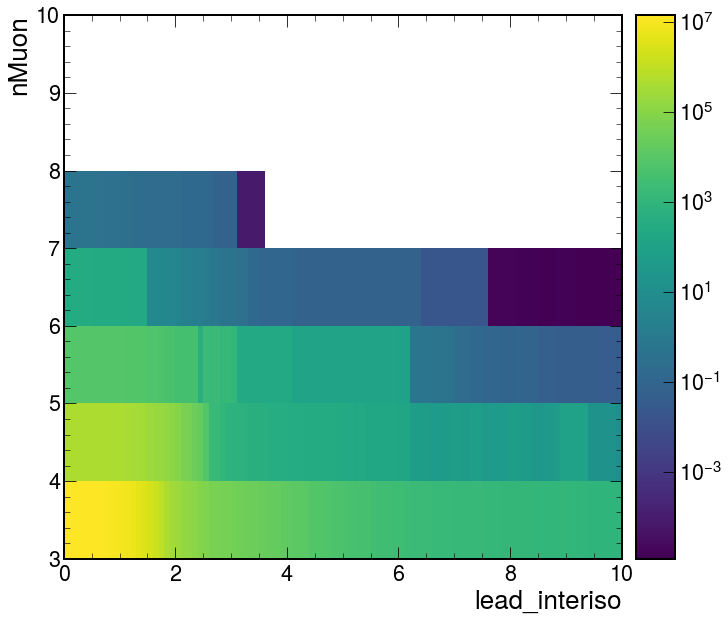

In [24]:
hep.hist2dplot(B_yields[:, 4j, :], norm=matplotlib.colors.LogNorm())

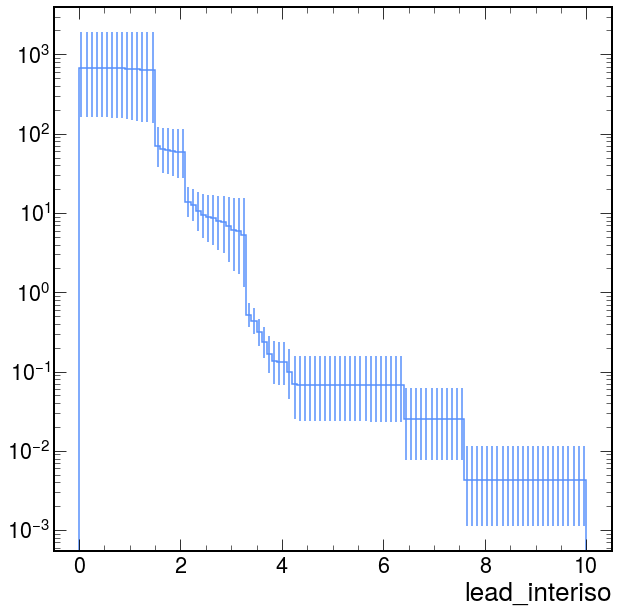

In [27]:
B_yields[:, 49, 3].plot()
plt.yscale('log')

In [19]:
def get_signal_models_central():
    # Build signal models list
    signals = []
    models = {
        # decay mode : list of mPhi values
        'leptonic': [1, 2, 4, 8],
        'hadronic': [1.4, 2, 4, 8],
    }
    mS_list = [125, 200, 300, 400, 500, 600, 800, 1000]
    ratios = [0.25, 0.5, 1, 2, 4]
    for decay in models:
        for mPhi in models[decay]:
            for ratio in ratios:
                temp = ratio * mPhi
                for mS in mS_list:
                    signal = f'GluGluToSUEP_mS{mS:.3f}_mPhi{mPhi:.3f}_T{temp:.3f}_mode{decay}_13TeV_2018'
                    if signal in plots:
                        signals.append(signal)
    return signals

def get_S_yields(signal):
    """
    Calculates yields for a specific signal model after cutting along each axis
    """
    hist_name = 'lead_interiso_vs_muon_iso_cut_vs_nMuon'
    h_s_cumsum =  plots[signal][hist_name].copy().reset()
    for x in range(100):
        for y in range(50):
            for z in range(6):
                signal_yield = plots[signal][hist_name][x::sum, y, z::sum]
                if signal_yield.value < 0:
                    signal_yield = hist.accumulators.WeightedSum(0, signal_yield.variance)
                h_s_cumsum[x, y, z] += signal_yield
    return h_s_cumsum

def calculate_significance(S, B):
    """
    Calculates significances 
    """
    h_significance = S.copy().reset()
    for x in range(100):
        for y in range(50):
            for z in range(6):
                s = S[x, y, z]
                b = B[x, y, z]
                if b.value < 1e-8:
                    b = hist.accumulators.WeightedSum(1e-8, b.variance)
                asimov = ROOT.RooStats.AsimovSignificance(
                    s.value, b.value, np.sqrt(b.variance)
                )
                if np.isnan(asimov):
                    asimov = 0
                h_significance[x, y, z] = hist.accumulators.WeightedSum(asimov, 0)
    return h_significance

def signals_loop(signal):
    S = get_S_yields(signal)
    significance = calculate_significance(S, B_yields)
    max_indices = np.unravel_index(
        np.argmax(significance.values(), axis=None), 
        significance.values().shape
    )
    return signal, max_indices, significance

In [26]:
signals = get_signal_models_central()
significances = {}
max_indices = {}
with Progress() as progress:
    task_id = progress.add_task("Completed...", total=len(signals))
    with multiprocessing.Pool() as pool:
        results = pool.imap(signals_loop, signals)
        for result in results:
            significances[result[0]] = result[2]
            max_indices[result[0]] = result[1]
            progress.update(task_id, advance=1, refresh=True)
        
print(significances)

Completed... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

{
    'GluGluToSUEP_mS125.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=250372, variance=0),
    'GluGluToSUEP_mS200.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=62732.5, variance=0),
    'GluGluToSUEP_mS300.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=16354.4, variance=0),
    'GluGluToSUEP_mS400.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=6023.51, variance=0),
    'GluGluToSUEP_mS500.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1858.35, variance=0),
    'GluGluToSUEP_mS600.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=122.781, variance=0),
    'GluGluToSUEP_mS800.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=0.645888, variance=0),
    'GluGluToSUEP_mS1000.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=0.0125929, variance=0),
    'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.14702e+07, variance=0),
    'GluGluToSUEP_mS200.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.29067e+07, variance=0),
    'GluGluToSUEP_mS300.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.37027e+07, variance=0),
    'GluGluToSUEP_mS400.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.31902e+07, variance=0),
    'GluGluToSUEP_mS500.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.14613e+07, variance=0),
    'GluGluToSUEP_mS600.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': Hist(
  Regular(100, 0, 10, name='lead_interiso'),
  Regular(50, 0.1, 100, transform=log, name='muon_iso cut'),
  Regular(7, 3, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=9.78843

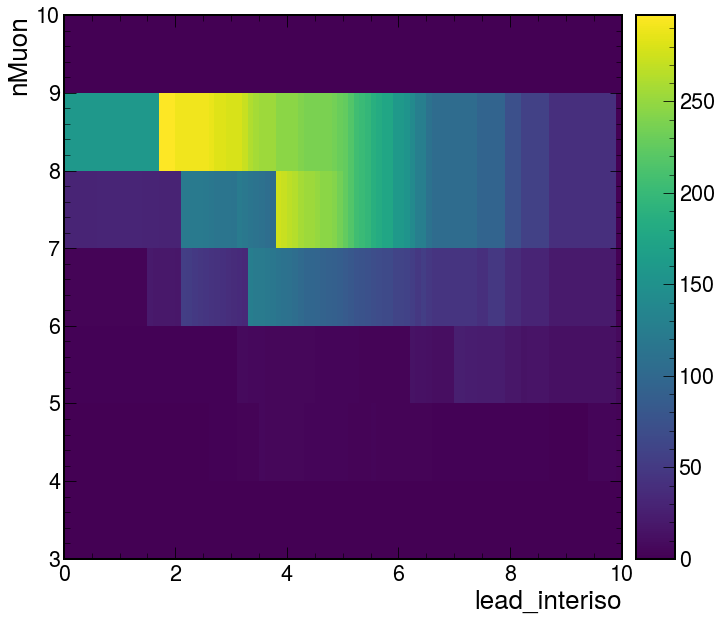

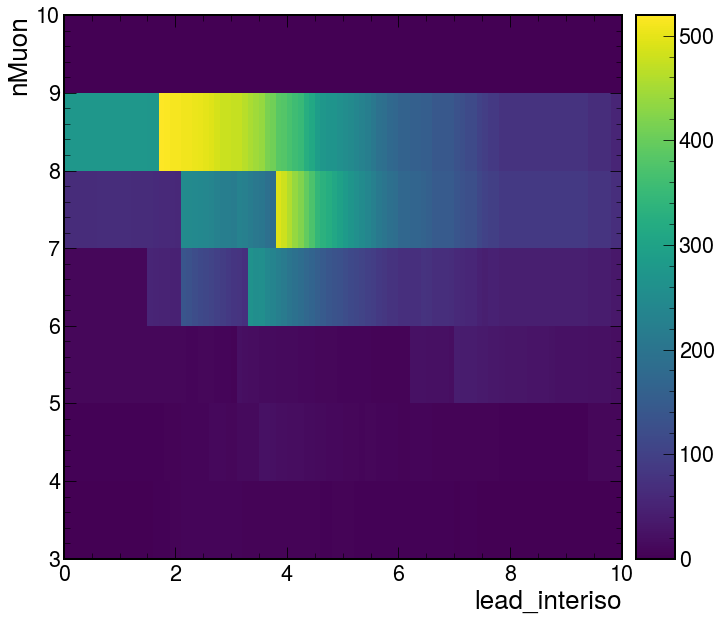

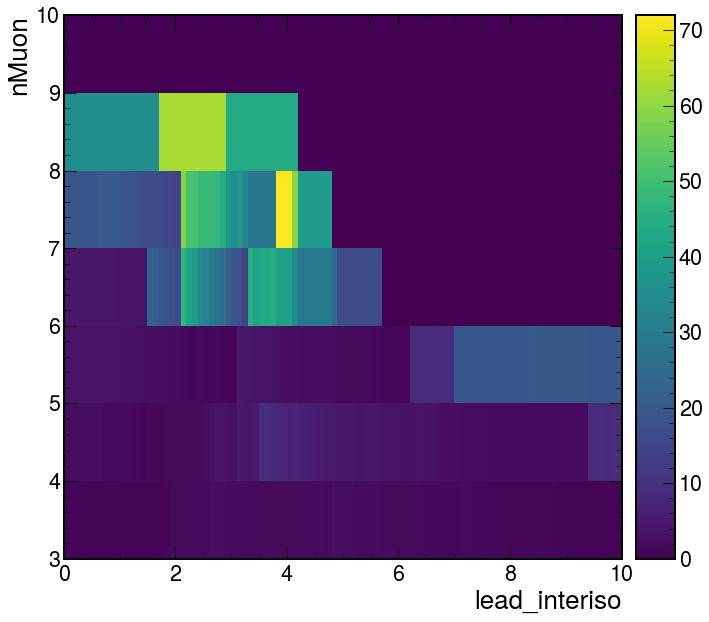

In [28]:
hep.hist2dplot(
    significances['GluGluToSUEP_mS125.000_mPhi1.400_T0.350_modehadronic_13TeV_2018'][:, 49, :],
    #norm=matplotlib.colors.LogNorm()
)
plt.show()
hep.hist2dplot(
    significances['GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modehadronic_13TeV_2018'][:, 49, :],
    #norm=matplotlib.colors.LogNorm()
)
plt.show()
hep.hist2dplot(
    significances['GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'][:, 49, :],
    #norm=matplotlib.colors.LogNorm()
)
plt.show()

In [29]:
print(max_indices)

{
    'GluGluToSUEP_mS125.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (38, 49, 4),
    'GluGluToSUEP_mS200.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (38, 49, 4),
    'GluGluToSUEP_mS300.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (17, 49, 5),
    'GluGluToSUEP_mS400.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (17, 46, 5),
    'GluGluToSUEP_mS500.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (17, 48, 5),
    'GluGluToSUEP_mS600.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (36, 48, 3),
    'GluGluToSUEP_mS800.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (32, 48, 2),
    'GluGluToSUEP_mS1000.000_mPhi1.000_T0.250_modeleptonic_13TeV_2018': (2, 48, 0),
    'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS200.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS300.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS400.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS500.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS600.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS800.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS1000.000_mPhi2.000_T2.000_modeleptonic_13TeV_2018': (17, 41, 5),
    'GluGluToSUEP_mS125.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS200.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS300.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS400.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS500.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (17, 49, 5),
    'GluGluToSUEP_mS600.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (17, 44, 5),
    'GluGluToSUEP_mS800.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (17, 36, 5),
    'GluGluToSUEP_mS1000.000_mPhi2.000_T4.000_modeleptonic_13TeV_2018': (0, 34, 5),
    'GluGluToSUEP_mS125.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (0, 34, 5),
    'GluGluToSUEP_mS200.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (0, 34, 5),
    'GluGluToSUEP_mS300.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 46, 5),
    'GluGluToSUEP_mS400.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 46, 5),
    'GluGluToSUEP_mS500.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 45, 5),
    'GluGluToSUEP_mS600.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 48, 5),
    'GluGluToSUEP_mS800.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 42, 5),
    'GluGluToSUEP_mS1000.000_mPhi2.000_T8.000_modeleptonic_13TeV_2018': (17, 43, 5),
    'GluGluToSUEP_mS125.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS200.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS300.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS400.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS500.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS600.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS800.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS1000.000_mPhi4.000_T1.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS125.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS200.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (36, 28, 4),
    'GluGluToSUEP_mS300.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS400.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (37, 40, 4),
    'GluGluToSUEP_mS500.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (17, 39, 5),
    'GluGluToSUEP_mS600.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (17, 49, 5),
    'GluGluToSUEP_mS800.000_mPhi4.000_T4.000_modeleptonic_13TeV_2018': (0, 32, 5),
    'GluGluToSUEP_mS1000.000_mPhi4.000_T4.000_mode

In [30]:
max_indices_set = set(max_indices.values())

In [31]:
max_indices_set

{(0, 26, 5),
 (0, 30, 5),
 (0, 32, 5),
 (0, 33, 5),
 (0, 34, 5),
 (2, 48, 0),
 (15, 9, 3),
 (15, 19, 3),
 (17, 36, 5),
 (17, 37, 5),
 (17, 39, 5),
 (17, 40, 5),
 (17, 41, 5),
 (17, 42, 5),
 (17, 43, 5),
 (17, 44, 5),
 (17, 45, 5),
 (17, 46, 5),
 (17, 47, 5),
 (17, 48, 5),
 (17, 49, 5),
 (25, 48, 1),
 (32, 48, 2),
 (33, 21, 4),
 (36, 28, 4),
 (36, 48, 3),
 (37, 37, 4),
 (37, 39, 4),
 (37, 40, 4),
 (37, 49, 3),
 (38, 47, 4),
 (38, 49, 4)}

In [32]:
len(max_indices_set)

32

In [33]:
for idx in max_indices_set:
    print(
        f"cut using: {idx}, B = {np.round(B_yields[idx].value, 3)} "
        f"± {np.round(np.sqrt(B_yields[idx].variance), 3)}"
    )

cut using: (17, 36, 5), B = 0.0 ± 0.0

cut using: (17, 47, 5), B = 0.0 ± 0.0

cut using: (33, 21, 4), B = 0.0 ± 0.0

cut using: (0, 26, 5), B = 0.0 ± 0.0

cut using: (37, 40, 4), B = 0.0 ± 0.0

cut using: (17, 49, 5), B = 0.0 ± 0.0

cut using: (0, 30, 5), B = 0.0 ± 0.0

cut using: (0, 32, 5), B = 0.0 ± 0.0

cut using: (17, 40, 5), B = 0.0 ± 0.0

cut using: (15, 9, 3), B = 0.126 ± 0.01

cut using: (17, 44, 5), B = 0.0 ± 0.0

cut using: (0, 34, 5), B = 0.0 ± 0.0

cut using: (17, 42, 5), B = 0.0 ± 0.0

cut using: (32, 48, 2), B = 272.735 ± 159.647

cut using: (37, 37, 4), B = 0.0 ± 0.0

cut using: (37, 49, 3), B = 0.167 ± 0.075

cut using: (17, 46, 5), B = 0.0 ± 0.0

cut using: (25, 48, 1), B = 20213.487 ± 4377.419

cut using: (17, 48, 5), B = 0.0 ± 0.0

cut using: (17, 39, 5), B = 0.0 ± 0.0

cut using: (36, 28, 4), B = 0.0 ± 0.0

cut using: (17, 37, 5), B = 0.0 ± 0.0

cut using: (37, 39, 4), B = 0.0 ± 0.0

cut using: (38, 47, 4), B = 0.0 ± 0.0

cut using: (15, 19, 3), B = 0.937 ± 0.174

cut using: (17, 41, 5), B = 0.0 ± 0.0

cut using: (2, 48, 0), B = 17977476.702 ± 226567.466

cut using: (17, 43, 5), B = 0.0 ± 0.0

cut using: (0, 33, 5), B = 0.0 ± 0.0

cut using: (38, 49, 4), B = 0.0 ± 0.0

cut using: (36, 48, 3), B = 0.234 ± 0.09

cut using: (17, 45, 5), B = 0.0 ± 0.0

In [44]:
reduced_indices_set = [
    (0, 26, 5),
    (0, 30, 5),
    (0, 32, 5),
    (0, 33, 5),
    (0, 34, 5),
    (15, 9, 3),
    (15, 19, 3),
    (17, 36, 5),
    (17, 37, 5),
    (17, 39, 5),
    (17, 40, 5),
    (17, 41, 5),
    (17, 42, 5),
    (17, 43, 5),
    (17, 44, 5),
    (17, 45, 5),
    (17, 46, 5),
    (17, 47, 5),
    (17, 48, 5),
    (17, 49, 5),
    (33, 21, 4),
    (36, 28, 4),
    (36, 48, 3),
    (37, 37, 4),
    (37, 39, 4),
    (37, 40, 4),
    (37, 49, 3),
    (38, 47, 4),
    (38, 49, 4)
]
print(len(reduced_indices_set))

29

In [45]:
max_indices_list = list(reduced_indices_set)
edges = [a.edges for a in plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'].axes]
cut_values = []
for cut in max_indices_list:
    cut_values.append(
        tuple(
            [
                np.round(edges[0][cut[0]], 2),
                np.round(edges[1][cut[1]], 2),
                round(edges[2][cut[2]]),
            ]
        )
    )

In [46]:
sorted_indices = np.array(max_indices_list)[np.array(max_indices_list)[:, 1].argsort()]
sorted_values = np.array(cut_values)[np.array(cut_values)[:, 1].argsort()]

In [47]:
sorted_indices

array([[15,  9,  3],
       [15, 19,  3],
       [33, 21,  4],
       [ 0, 26,  5],
       [36, 28,  4],
       [ 0, 30,  5],
       [ 0, 32,  5],
       [ 0, 33,  5],
       [ 0, 34,  5],
       [17, 36,  5],
       [17, 37,  5],
       [37, 37,  4],
       [37, 39,  4],
       [17, 39,  5],
       [17, 40,  5],
       [37, 40,  4],
       [17, 41,  5],
       [17, 42,  5],
       [17, 43,  5],
       [17, 44,  5],
       [17, 45,  5],
       [17, 46,  5],
       [17, 47,  5],
       [38, 47,  4],
       [17, 48,  5],
       [36, 48,  3],
       [37, 49,  3],
       [17, 49,  5],
       [38, 49,  4]])

In [48]:
np.set_printoptions(suppress=True)
sorted_values

array([[ 1.5 ,  0.35,  6.  ],
       [ 1.5 ,  1.38,  6.  ],
       [ 3.3 ,  1.82,  7.  ],
       [ 0.  ,  3.63,  8.  ],
       [ 3.6 ,  4.79,  7.  ],
       [ 0.  ,  6.31,  8.  ],
       [ 0.  ,  8.32,  8.  ],
       [ 0.  ,  9.55,  8.  ],
       [ 0.  , 10.96,  8.  ],
       [ 1.7 , 14.45,  8.  ],
       [ 1.7 , 16.6 ,  8.  ],
       [ 3.7 , 16.6 ,  7.  ],
       [ 3.7 , 21.88,  7.  ],
       [ 1.7 , 21.88,  8.  ],
       [ 1.7 , 25.12,  8.  ],
       [ 3.7 , 25.12,  7.  ],
       [ 1.7 , 28.84,  8.  ],
       [ 1.7 , 33.11,  8.  ],
       [ 1.7 , 38.02,  8.  ],
       [ 1.7 , 43.65,  8.  ],
       [ 1.7 , 50.12,  8.  ],
       [ 1.7 , 57.54,  8.  ],
       [ 1.7 , 66.07,  8.  ],
       [ 3.8 , 66.07,  7.  ],
       [ 1.7 , 75.86,  8.  ],
       [ 3.6 , 75.86,  6.  ],
       [ 3.7 , 87.1 ,  6.  ],
       [ 1.7 , 87.1 ,  8.  ],
       [ 3.8 , 87.1 ,  7.  ]])

In [50]:
signals = get_signal_models_central()
nTable = 2
nShow = 11
begin, end = 0, 10 #len(reduced_indices_set)
table = Table(title="Cut sets")
table.add_column("Signal point", justify="center", style="cyan", no_wrap=False, width=24)
# for i in range((nTable-1)*nShow, nTable*nShow):
for i in range(begin, end):
    table.add_column(
        f"{sorted_values[i][0]}\n{np.round(sorted_values[i][1], 1)}\n{sorted_values[i][2]}", 
        justify="center", 
        style="grey50", 
        no_wrap=False, 
        width=6
    )

bkg_yields = []
for cut in sorted_indices[begin:end]:
    bkg_yields.append(f"{B_yields[tuple(cut)].value:.2f}")
table.add_row("bkg yield", *bkg_yields)
    
for signal in signals:
    yields = []
    max_yield = 0
    for cut in sorted_indices:
        cut_yield = significances[signal][tuple(cut)].value
        yields.append(cut_yield)
        if max_yield < cut_yield:
            max_yield = cut_yield
    yield_strs = []
    # for y in yields[((nTable-1)*nShow):(nTable*nShow)]:
    for y in yields[begin:end]:
        if (y / max_yield) >= 0.99:
            yield_strs.append(f"[red1][bold]{y:.0f}[/][/]")
        elif (y / max_yield) >= 0.9:
            yield_strs.append(f"[orange_red1]{y:.0f}[/]")
        else:
            yield_strs.append(f"{y:.0f}")
    signal_tag = (
        signal
        .replace("GluGluToSUEP_", "")
        .replace(".0_T", "_T")
        .replace(".00_T", "_T")
        .replace(".000", "")
        .replace("0_mode", "_")
        .replace("00_T", "_T")
        .replace("0_h", "_h")
        .replace("mode", "")
        .replace("leptonic", "lep")
        .replace("hadronic", "had")
        .replace("_13TeV_2018", "")
    )
    table.add_row(signal_tag, *yield_strs)
    
console = Console()
console.print(table)

                                                     Cut sets                                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃                          ┃  1.5   ┃  1.5   ┃  3.3   ┃  0.0   ┃  3.6   ┃  0.0  ┃  0.0   ┃  0.0  ┃  0.0   ┃  1.7  ┃
┃                          ┃  0.4   ┃  1.4   ┃  1.8   ┃  3.6   ┃  4.8   ┃  6.3  ┃  8.3   ┃  9.6  ┃  11.0  ┃ 14.4  ┃
┃       Signal point       ┃  6.0   ┃  6.0   ┃  7.0   ┃  8.0   ┃  7.0   ┃  8.0  ┃  8.0   ┃  8.0  ┃  8.0   ┃  8.0  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│        bkg yield         │  0.13  │  0.94  │  0.00  │  0.00  │  0.00  │ 0.00  │  0.00  │ 0.00  │  0.00  │ 0.00  │
│  mS125_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS200_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS300_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS400_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS500_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS600_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS800_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS1000_mPhi1_T0.25_lep  │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│    mS125_mPhi2_T2_lep    │  499   │  1039  │  2021  │  2088  │  2586  │ 2379  │  2469  │ 2496  │  2512  │ 2536  │
│    mS200_mPhi2_T2_lep    │  516   │  1088  │  2423  │  2435  │  2889  │ 2609  │  2649  │ 2661  │  2676  │ 2686  │
│    mS300_mPhi2_T2_lep    │  411   │  951   │  2423  │  2577  │  2928  │ 2704  │  2724  │ 2731  │  2736  │ 2739  │
│    mS400_mPhi2_T2_lep    │  307   │  767   │  2111  │  2368  │  2570  │ 2464  │  2478  │ 2482  │  2484  │ 2486  │
│    mS500_mPhi2_T2_lep    │  209   │  596   │  1710  │  1968  │  2091  │ 2051  │  2061  │ 2063  │  2065  │ 2066  │
│    mS600_mPhi2_T2_lep    │  152   │  470   │  1374  │  1604  │  1669  │ 1662  │  1668  │ 1669  │  1670  │ 1671  │
│    mS800_mPhi2_T2_lep    │   67   │  295   │  884   │  1057  │  1078  │ 1084  │  1086  │ 1087  │  1087  │ 1087  │
│   mS1000_mPhi2_T2_lep    │   31   │  187   │  579   │  716   │  726   │  731  │  732   │  732  │  732   │  732  │
│    mS125_mPhi2_T4_lep    │  1207  │  1743  │  3385  │  3172  │  3596  │ 3313  │  3353  │ 3372  │  3387  │ 3382  │
│    mS200_mPhi2_T4_lep    │  1248  │  1720  │  4152  │  4140  │  4457  │ 4260  │  4287  │ 4297  │  4303  │ 4297  │
│    mS300_mPhi2_T4_lep    │  1074  │  1364  │  3722  │  3805  │  3958  │ 3886  │  3902  │ 3906  │  3908  │ 3908  │
│    mS400_mPhi2_T4_lep    │  868   │  1032  │  2930  │  3009  │  3045  │ 3041  │  3048  │ 3050  │  3051  │ 3052  │
│    mS500_mPhi2_T4_lep    │ [3

In [51]:
signals = get_signal_models_central()
nTable = 2
nShow = 11
begin, end = 10, 20 #len(reduced_indices_set)
table = Table(title="Cut sets")
table.add_column("Signal point", justify="center", style="cyan", no_wrap=False, width=24)
# for i in range((nTable-1)*nShow, nTable*nShow):
for i in range(begin, end):
    table.add_column(
        f"{sorted_values[i][0]}\n{np.round(sorted_values[i][1], 1)}\n{sorted_values[i][2]}", 
        justify="center", 
        style="grey50", 
        no_wrap=False, 
        width=6
    )

bkg_yields = []
for cut in sorted_indices[begin:end]:
    bkg_yields.append(f"{B_yields[tuple(cut)].value:.2f}")
table.add_row("bkg yield", *bkg_yields)
    
for signal in signals:
    yields = []
    max_yield = 0
    for cut in sorted_indices:
        cut_yield = significances[signal][tuple(cut)].value
        yields.append(cut_yield)
        if max_yield < cut_yield:
            max_yield = cut_yield
    yield_strs = []
    # for y in yields[((nTable-1)*nShow):(nTable*nShow)]:
    for y in yields[begin:end]:
        if (y / max_yield) >= 0.99:
            yield_strs.append(f"[red1][bold]{y:.0f}[/][/]")
        elif (y / max_yield) >= 0.9:
            yield_strs.append(f"[orange_red1]{y:.0f}[/]")
        else:
            yield_strs.append(f"{y:.0f}")
    signal_tag = (
        signal
        .replace("GluGluToSUEP_", "")
        .replace(".0_T", "_T")
        .replace(".00_T", "_T")
        .replace(".000", "")
        .replace("0_mode", "_")
        .replace("00_T", "_T")
        .replace("0_h", "_h")
        .replace("mode", "")
        .replace("leptonic", "lep")
        .replace("hadronic", "had")
        .replace("_13TeV_2018", "")
    )
    table.add_row(signal_tag, *yield_strs)
    
console = Console()
console.print(table)

                                                     Cut sets                                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃                          ┃  1.7   ┃  3.7   ┃  3.7   ┃  1.7   ┃  1.7   ┃  3.7  ┃  1.7   ┃  1.7  ┃  1.7   ┃  1.7  ┃
┃                          ┃  16.6  ┃  16.6  ┃  21.9  ┃  21.9  ┃  25.1  ┃ 25.1  ┃  28.8  ┃ 33.1  ┃  38.0  ┃ 43.6  ┃
┃       Signal point       ┃  8.0   ┃  7.0   ┃  7.0   ┃  8.0   ┃  8.0   ┃  7.0  ┃  8.0   ┃  8.0  ┃  8.0   ┃  8.0  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│        bkg yield         │  0.00  │  0.00  │  0.00  │  0.00  │  0.00  │ 0.00  │  0.00  │ 0.00  │  0.00  │ 0.00  │
│  mS125_mPhi1_T0.25_lep   │   0    │   73   │  112   │   83   │  129   │  157  │  144   │  157  │  176   │  187  │
│  mS200_mPhi1_T0.25_lep   │   32   │   32   │   32   │   32   │   32   │  32   │   32   │  32   │   32   │  32   │
│  mS300_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │  21   │
│  mS400_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │  15   │
│  mS500_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS600_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS800_mPhi1_T0.25_lep   │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│  mS1000_mPhi1_T0.25_lep  │   0    │   0    │   0    │   0    │   0    │   0   │   0    │   0   │   0    │   0   │
│    mS125_mPhi2_T2_lep    │  2546  │  2772  │  2784  │  2560  │  2565  │ 2789  │  2572  │ 2574  │  2578  │ 2580  │
│    mS200_mPhi2_T2_lep    │  2692  │  2964  │  2969  │  2699  │  2702  │ 2970  │  2703  │ 2704  │  2705  │ 2706  │
│    mS300_mPhi2_T2_lep    │  2741  │  2972  │  2974  │  2743  │  2744  │ 2974  │  2744  │ 2745  │  2745  │ 2745  │
│    mS400_mPhi2_T2_lep    │  2487  │  2604  │  2605  │  2488  │  2488  │ 2605  │  2488  │ 2489  │  2489  │ 2489  │
│    mS500_mPhi2_T2_lep    │  2066  │  2119  │  2120  │  2067  │  2067  │ 2120  │  2067  │ 2067  │  2067  │ 2067  │
│    mS600_mPhi2_T2_lep    │  1671  │  1689  │  1689  │  1671  │  1671  │ 1689  │  1671  │ 1671  │  1671  │ 1672  │
│    mS800_mPhi2_T2_lep    │  1087  │  1088  │  1088  │  1087  │  1087  │ 1088  │  1087  │ 1087  │  1087  │ 1087  │
│   mS1000_mPhi2_T2_lep    │  732   │  732   │  732   │  732   │  732   │  732  │  732   │  732  │  732   │  732  │
│    mS125_mPhi2_T4_lep    │  3390  │  3646  │  3653  │  3400  │  3403  │ 3655  │  3406  │ 3408  │  3410  │ 3411  │
│    mS200_mPhi2_T4_lep    │  4301  │  4486  │  4489  │  4305  │  4306  │ 4490  │  4307  │ 4307  │  4308  │ 4308  │
│    mS300_mPhi2_T4_lep    │  3910  │  3980  │  3981  │  3910  │  3911  │ 3981  │  [38;

In [59]:
signals = get_signal_models_central()
nTable = 2
nShow = 11
begin, end = 20, 29 #len(reduced_indices_set)
table = Table(title="Cut sets")
table.add_column("Signal point", justify="center", style="cyan", no_wrap=False, width=24)
# for i in range((nTable-1)*nShow, nTable*nShow):
for i in range(begin, end):
    table.add_column(
        f"{sorted_values[i][0]}\n{np.round(sorted_values[i][1], 1)}\n{sorted_values[i][2]}", 
        justify="center", 
        style="grey50", 
        no_wrap=False, 
        width=6
    )

bkg_yields = []
for cut in sorted_indices[begin:end]:
    bkg_yields.append(f"{B_yields[tuple(cut)].value:.2f}")
table.add_row("bkg yield", *bkg_yields)
    
for signal in signals:
    if '200' in signal:
        continue
    if '300' in signal:
        continue
    if '400' in signal:
        continue
    if '500' in signal:
        continue
    if '600' in signal:
        continue
    if '800' in signal:
        continue
    yields = []
    max_yield = 0
    for cut in sorted_indices:
        cut_yield = significances[signal][tuple(cut)].value
        yields.append(cut_yield)
        if max_yield < cut_yield:
            max_yield = cut_yield
    yield_strs = []
    # for y in yields[((nTable-1)*nShow):(nTable*nShow)]:
    for y in yields[begin:end]:
        if (y / max_yield) >= 0.99:
            yield_strs.append(f"[red1][bold]{y:.0f}[/][/]")
        elif (y / max_yield) >= 0.9:
            yield_strs.append(f"[orange_red1]{y:.0f}[/]")
        else:
            yield_strs.append(f"{y:.0f}")
    signal_tag = (
        signal
        .replace("GluGluToSUEP_", "")
        .replace(".0_T", "_T")
        .replace(".00_T", "_T")
        .replace(".000", "")
        .replace("0_mode", "_")
        .replace("00_T", "_T")
        .replace("0_h", "_h")
        .replace("mode", "")
        .replace("leptonic", "lep")
        .replace("hadronic", "had")
        .replace("_13TeV_2018", "")
    )
    table.add_row(signal_tag, *yield_strs)
    
console = Console()
console.print(table)

                                                  Cut sets                                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃                          ┃  1.7   ┃  1.7   ┃  1.7   ┃  3.8   ┃  1.7   ┃  3.6   ┃  3.7   ┃  1.7   ┃  3.8   ┃
┃                          ┃  50.1  ┃  57.5  ┃  66.1  ┃  66.1  ┃  75.9  ┃  75.9  ┃  87.1  ┃  87.1  ┃  87.1  ┃
┃       Signal point       ┃  8.0   ┃  8.0   ┃  8.0   ┃  7.0   ┃  8.0   ┃  6.0   ┃  6.0   ┃  8.0   ┃  7.0   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│        bkg yield         │  0.00  │  0.00  │  0.00  │  0.00  │  0.00  │  0.23  │  0.17  │  0.00  │  0.00  │
│  mS125_mPhi1_T0.25_lep   │  203   │  222   │  241   │  262   │  258   │  116   │  126   │  290   │  299   │
│  mS1000_mPhi1_T0.25_lep  │   0    │   0    │   0    │   0    │   0    │   0    │   0    │   0    │   0    │
│    mS125_mPhi2_T2_lep    │  2581  │  2582  │  2583  │  2746  │  2584  │  1148  │  1128  │  2588  │  2748  │
│   mS1000_mPhi2_T2_lep    │  732   │  732   │  732   │  732   │  732   │  261   │  262   │  732   │  732   │
│    mS125_mPhi2_T4_lep    │  3413  │  3413  │  3413  │  3584  │  3414  │  1539  │  1510  │  3415  │  3584  │
│   mS1000_mPhi2_T4_lep    │  732   │  732   │  732   │  732   │  732   │  261   │  262   │  732   │  732   │
│    mS125_mPhi2_T8_lep    │  3026  │  3026  │  3026  │  2834  │  3026  │  1288  │  1259  │  3026  │  2834  │
│   mS1000_mPhi2_T8_lep    │  729   │  729   │  729   │  729   │  729   │  260   │  261   │  729   │  729   │
│    mS125_mPhi4_T1_lep    │  2358  │  2359  │  2362  │  2483  │  2362  │  983   │  971   │  2364  │  2484  │
│   mS1000_mPhi4_T1_lep    │  675   │  675   │  675   │  693   │  675   │  253   │  253   │  675   │  693   │
│    mS125_mPhi4_T4_lep    │  3498  │  3500  │  3501  │  3700  │  3501  │  1592  │  1563  │  3502  │  3700  │
│   mS1000_mPhi4_T4_lep    │  732   │  732   │  732   │  732   │  732   │  261   │  262   │  732   │  732   │
│    mS125_mPhi4_T8_lep    │  2841  │  2841  │  2841  │  2743  │  2842  │  1263  │  1236  │  2842  │  2744  │
│   mS1000_mPhi4_T8_lep    │  729   │  729   │  729   │  729   │  729   │  260   │  261   │  729   │  729   │
│   mS125_mPhi4_T16_lep    │  1597  │  1597  │  1597  │  1351  │  1597  │  704   │  680   │  1598  │  1351  │
│   mS1000_mPhi4_T16_lep   │  725   │  725   │  725   │  722   │  725   │  258   │  259   │  725   │  722   │
│    mS125_mPhi8_T2_lep    │  3597  │  3597  │  3597  │  4029  │  3597  │  1685  │  1660  │  3598  │  4029  │
│   mS1000_mPhi8_T2_lep    │  733   │  733   │  733   │  733   │  733   │  261   │  262   │  733   │  733   │
│    mS125_mPhi8_T4_lep    │  3620  │  3621  │  3621  │  3813  │  3621  │  1644  │  1618  │  3622  │  3813  │
│   mS1000_mPhi8_T4_lep    │  732   │  732   │  [1;38;

## Plotting stuff

(0, 99j, 6j)

Cut (internally): (slice(None, None, 5j), 99j, slice(6j, None, <built-in function sum>))


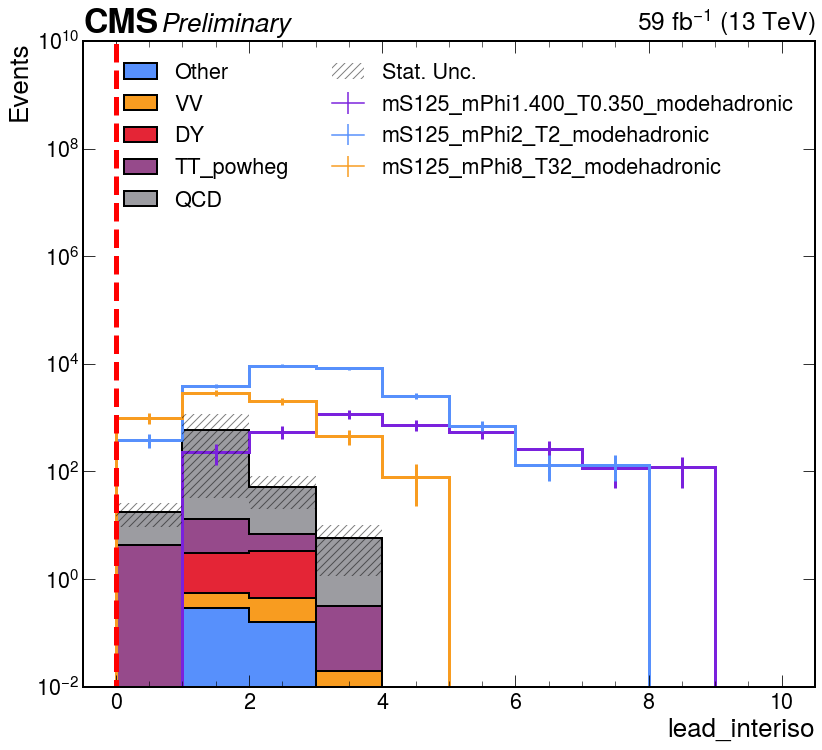

Cut (internally): (slice(0, None, <built-in function sum>), 99j, slice(None, None, None))


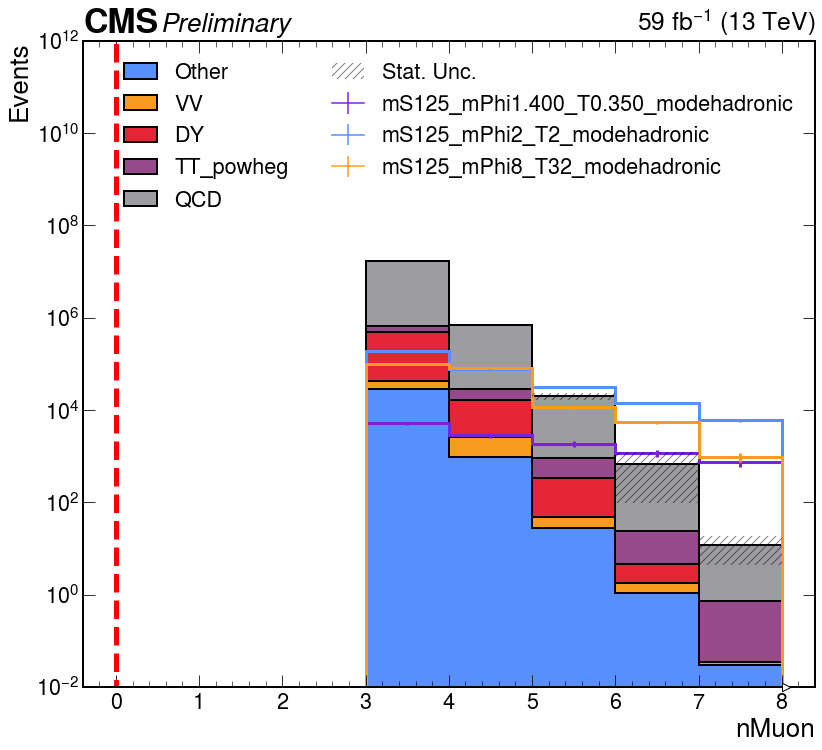

In [48]:
processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_2018',
]
signals = [
    'GluGluToSUEP_mS125.000_mPhi1.400_T0.350_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
int_lumi = 59

cut_sets = [
    (0, 99j, 6j),
]

max_vals = [0, 0, 0, 0]

for cut in cut_sets:
    print(cut)
    plot_set = [
        [
            ('lead_interiso_vs_muon_iso_cut_vs_nMuon','lead_interiso'),
            {
                'cut': (slice(None, None, 5j), cut[1], slice(cut[2], None, sum)),
                'slc': slice(None, None, 5j),
                'ylim': (1e-2, 1e10),
            }
        ],
        [
            ('lead_interiso_vs_muon_iso_cut_vs_nMuon','nMuon'),
            {
                'cut': (slice(cut[0], None, sum), cut[1], slice(None)),
                'ylim': (1e-2, 1e12),
            }
        ],
    ]
    for plot_i in plot_set:
        if plot_i[0][0] not in plots[processes[0]].keys():
            continue
        # Stack with ratio for processes 
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 11))
        plot_utils_extras.plot_stack(
            plots=plots, 
            bkg_list=processes, 
            sig_list=signals,
            label=plot_i[0],
            ylog=True,
            override_slice=False,
            fig=fig,
            ax=ax,
            int_lumi=int_lumi,
            **plot_i[1]
        )
        if plot_i[0][1] == 'lead_interiso':
            plt.plot([cut[0], cut[0]], [0, 1e15], c='r', lw=5, ls='--')
        elif plot_i[0][1] == 'nMuon':
            plt.plot([cut[2], cut[2]], [0, 1e15], c='r', lw=5, ls='--')
        plt.tight_layout()
        plt.show()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fcf4fa54b20>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fcf4fb44b50>, text=[])

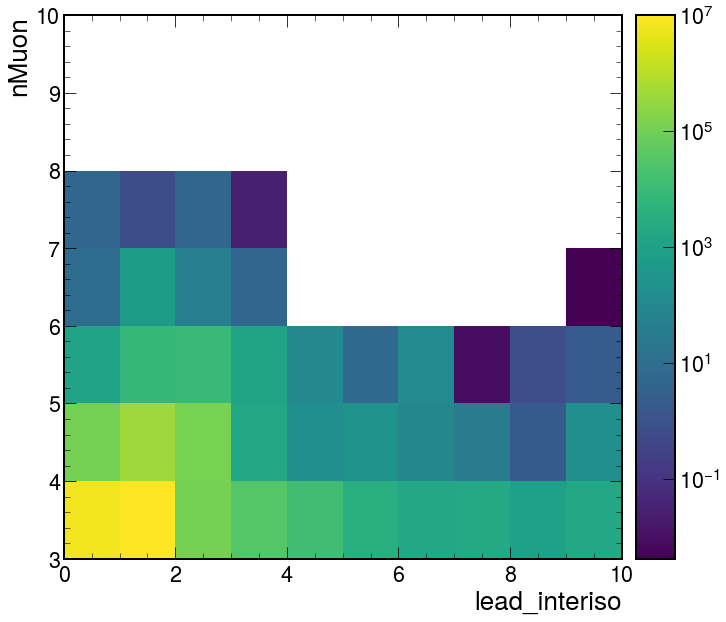

In [34]:
plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][::10j, 87.1j, :].plot(norm=matplotlib.colors.LogNorm())

In [10]:
def loss_func(h_o, h_e):
    arr_o = h_o.values()
    arr_e = h_e.values()
    arr_o = arr_o[arr_e > 0]
    arr_e = arr_e[arr_e > 0]
    return np.sum((arr_o - arr_e)**2 / arr_e)

In [174]:
h_o = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 4j]
h_e = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 3j] * 0.051
print(
    f"{h_o[4j::sum].value:.2f} ± {np.sqrt(h_o[4j::sum].variance):.2f} vs "
    f"{h_e[4j::sum].value:.2f} ± {np.sqrt(h_e[4j::sum].variance):.2f}"
)

h_o = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 5j]
h_e = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 3j] * 0.033
print(
    f"{h_o[4j::sum].value:.2f} ± {np.sqrt(h_o[4j::sum].variance):.2f} vs "
    f"{h_e[4j::sum].value:.2f} ± {np.sqrt(h_e[4j::sum].variance):.2f}"
)

h_o = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][4j::10j, 87.1j, 5j]
h_e = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][4j::10j, 87.1j, 3j] * 0.0185
print(
    f"{h_o[4j::sum].value:.2f} ± {np.sqrt(h_o[4j::sum].variance):.2f} vs "
    f"{h_e[4j::sum].value:.2f} ± {np.sqrt(h_e[4j::sum].variance):.2f}"
)

h_o = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 6j]
h_e = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][3j::10j, 87.1j, 3j] * 0.000132
print(
    f"{h_o[4j::sum].value:.2f} ± {np.sqrt(h_o[4j::sum].variance):.2f} vs "
    f"{h_e[4j::sum].value:.2f} ± {np.sqrt(h_e[4j::sum].variance):.2f}"
)
#h_s = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][:3j:10j, 87.1j, 6j]

h_o = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][2j::10j, 87.1j, 7j]
h_e = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][2j::10j, 87.1j, 3j] * 0.0000397
print(
    f"{h_o[4j::sum].value:.2f} ± {np.sqrt(h_o[4j::sum].variance):.2f} vs "
    f"{h_e[4j::sum].value:.2f} ± {np.sqrt(h_e[4j::sum].variance):.2f}"
)
#h_s = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon'][:2j:10j, 87.1j, 7j]

# density = False
# print(loss_func(h_o, h_e))
# h_o.plot(density=density)
# h_e.plot(density=density)
# h_s.plot(density=density)
# plt.yscale('log')

762.13 ± 204.94 vs 1198.16 ± 162.20

235.39 ± 152.46 vs 775.28 ± 104.95

235.39 ± 152.46 vs 434.63 ± 58.84

0.00 ± 0.00 vs 3.10 ± 0.42

0.00 ± 0.00 vs 0.93 ± 0.13

In [10]:
hep.style.use("CMS")

nMuon: 3

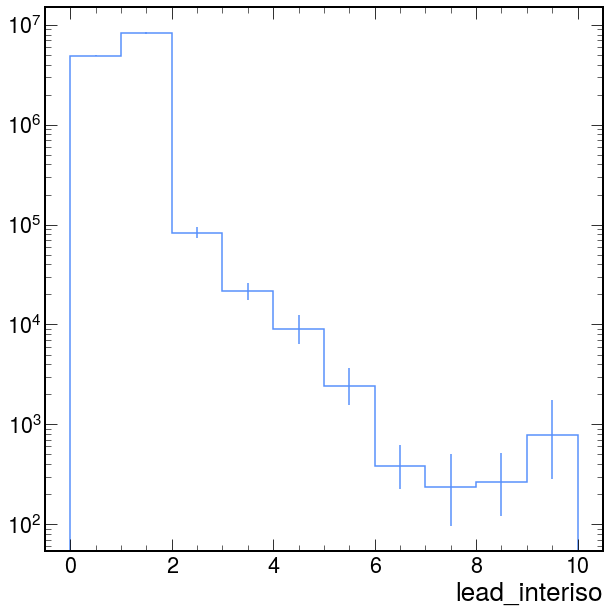

nMuon: 4

1247.8245464983497

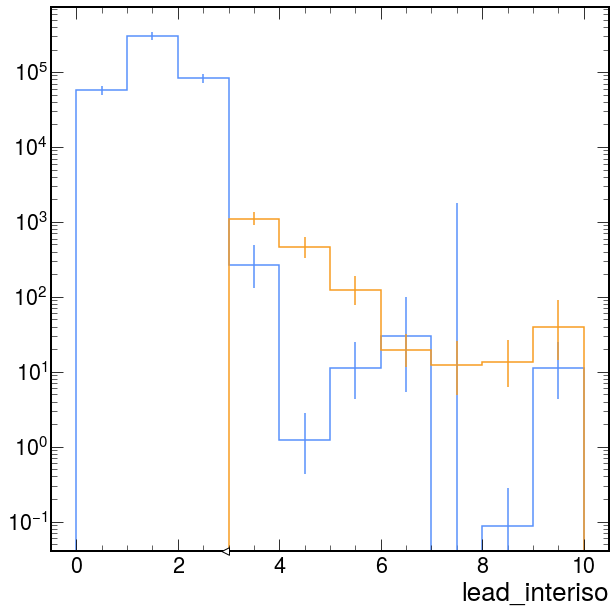

nMuon: 5

1589.7125159662492

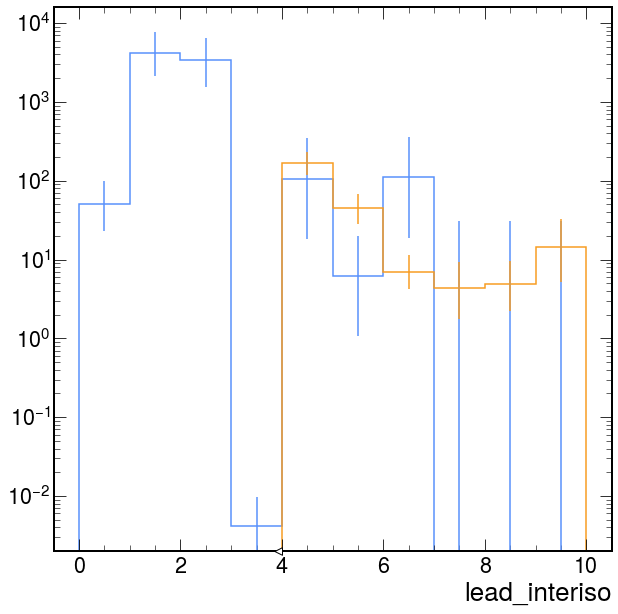

nMuon: 6

4.5841694767660375

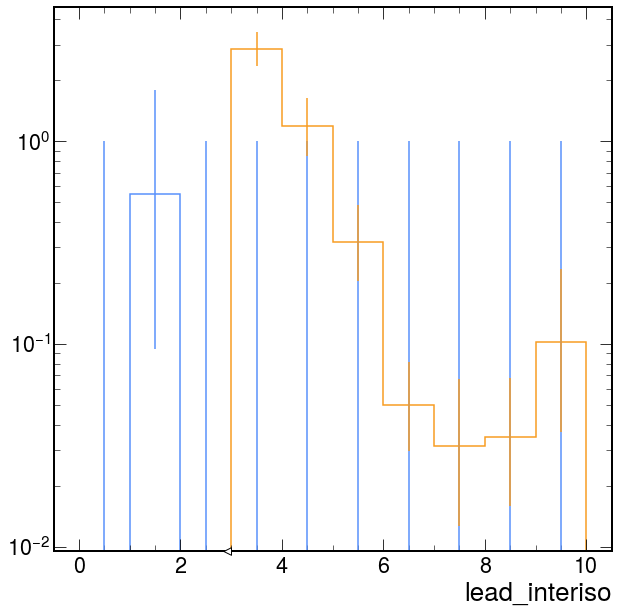

nMuon: 7

4.683489109216724

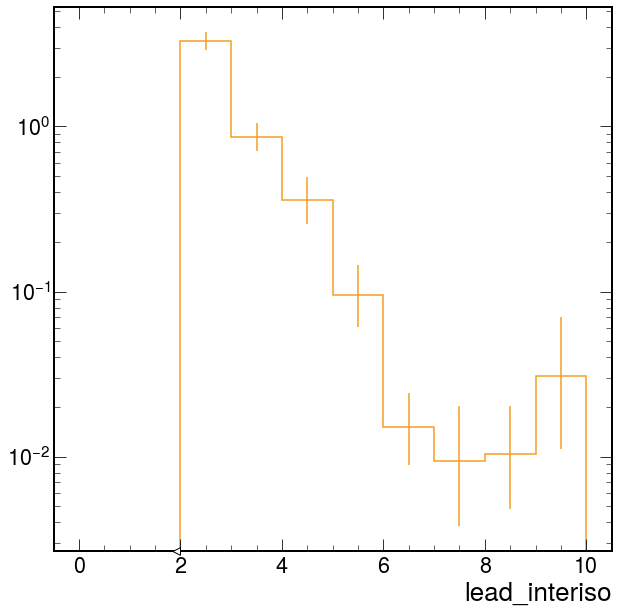

In [59]:
extrapolations = {
    # keys are nMuon numbers
    4j: [
        {
            'fit_begin': 3j,
            'scale_factor': 0.051,
        }
    ],
    5j: [
#         {
#             'fit_begin': 3j,
#             'scale_factor': 0.033,
#         },
        {
            'fit_begin': 4j,
            'scale_factor': 0.0185,
        }
    ],
    6j: [
        {
            'fit_begin': 3j,
            'scale_factor': 0.000132,
        }
    ],
    7j: [
        {
            'fit_begin': 2j,
            'scale_factor': 0.0000397,
        },
    ]
}

density = False
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
muon_iso = 4j

print("nMuon: 3")
histogram[::10j, muon_iso, 3j].plot()
plt.yscale('log')
plt.show()

for nMuon in extrapolations:
    print(f"nMuon: {nMuon}".replace('j',''))
    fit_begin = extrapolations[nMuon][0]['fit_begin']
    scale_factor = extrapolations[nMuon][0]['scale_factor']
    h_o = histogram[::10j, muon_iso, nMuon]
    h_e = histogram[fit_begin::10j, muon_iso, 3j] * scale_factor

    print(loss_func(h_o[fit_begin:], h_e))
    h_o.plot(density=density)
    h_e.plot(density=density)
    plt.yscale('log')
    plt.show()

In [62]:
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
muon_iso = 4j

for nMuon in range(7):
    h_i = histogram[::sum, 99j, nMuon]
    h_f = histogram[::sum, muon_iso, nMuon]
    if h_i.value > 0:
        print(f"nMuon = {nMuon+3} : {h_f.value / h_i.value}")
    #print(loss_func(h_o[fit_begin:], h_e))

nMuon = 3 : 0.802425245670462

nMuon = 4 : 0.6560643662870167

nMuon = 5 : 0.41790890826637767

nMuon = 6 : 0.0008625118668801657

nMuon = 7 : 0.0

[16476298.586953746, 675523.3316451727, 18554.14275822927, 634.6232826412343, 10.955310633947732, 0.0, 0.0]
[165877.73561069803, 2449.8666260846444, 235.39439096866263, 0.004259484015400938, 0.0, 0.0, 0.0]

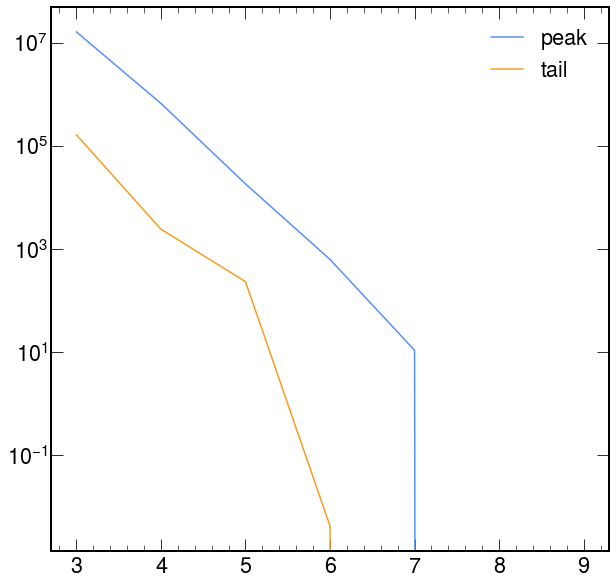

In [58]:
y_peak, ye_peak = [], []
y_tail, ye_tail = [], []
y_full, ye_full = [], []
interiso_cut = 0
for nMuon in range(7):
    if interiso_cut >= (nMuon+2):
        y_peak.append(0)
        ye_peak.append(0)
    else:
        y_peak.append(histogram[(interiso_cut*1j):((nMuon+2)*1j):sum, 99j, nMuon].value)
        ye_peak.append(histogram[(interiso_cut*1j):((nMuon+2)*1j):sum, 99j, nMuon].variance)
    if interiso_cut > (nMuon+2):
        y_tail.append(histogram[interiso_cut*1j::sum, 99j, nMuon].value)
        ye_tail.append(histogram[interiso_cut*1j::sum, 99j, nMuon].variance)
    else:
        y_tail.append(histogram[(nMuon+2)*1j::sum, 99j, nMuon].value)
        ye_tail.append(histogram[(nMuon+2)*1j::sum, 99j, nMuon].variance)
    y_full.append(histogram[interiso_cut*1j::sum, 99j, nMuon].value)
    ye_full.append(histogram[interiso_cut*1j::sum, 99j, nMuon].variance)
print(y_peak, y_tail)
plt.plot(list(range(3, 10)), y_peak, label='peak')
plt.plot(list(range(3, 10)), y_tail, label='tail')
#plt.plot(list(range(3, 10)), y_full, label='full')
plt.legend()
plt.yscale('log')

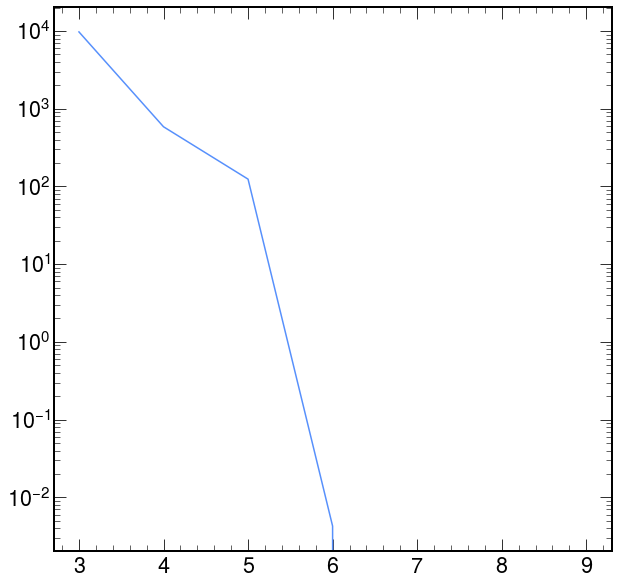

In [49]:
y, ye = [], []
for nMuon in range(7):
    y.append(histogram[5j::sum, 99j, nMuon].value)
    ye.append(histogram[5j::sum, 99j, nMuon].variance)
plt.plot(list(range(3, 10)), y)
plt.yscale('log')

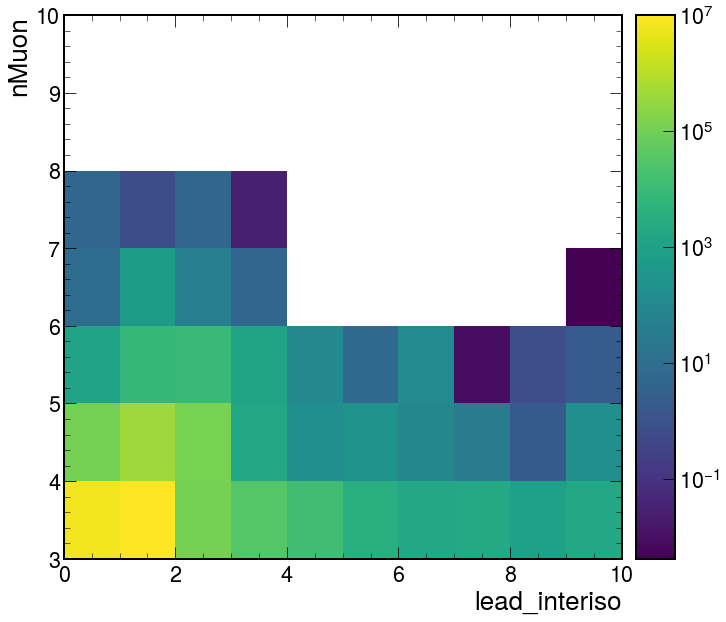

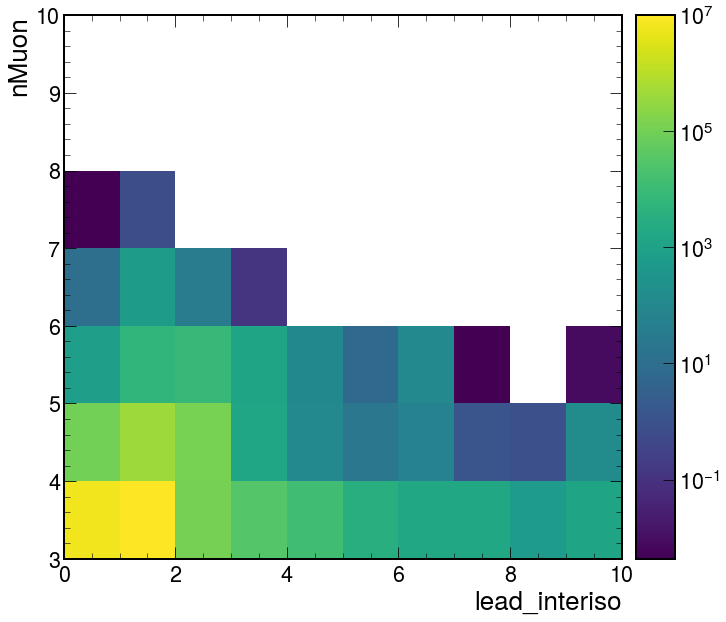

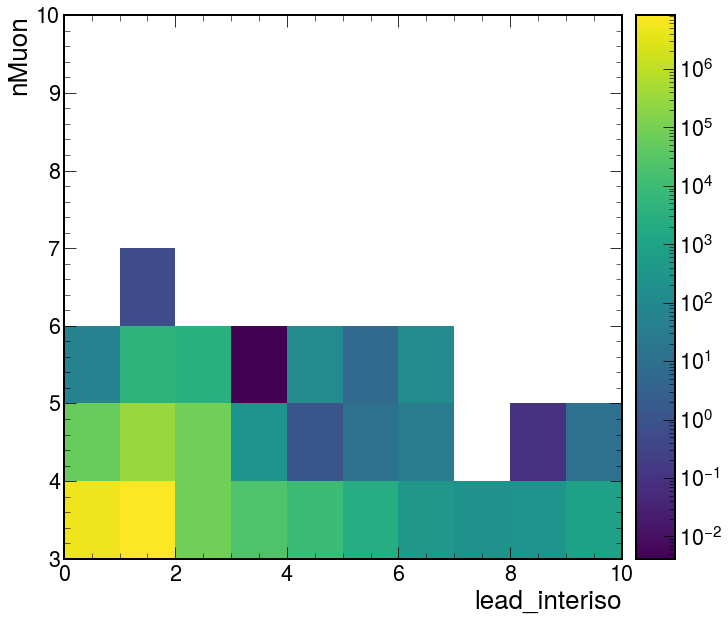

In [66]:
for muon_iso in [99j, 15j, 4j]:
    histogram[::10j, muon_iso, :].plot2d(norm=matplotlib.colors.LogNorm())
    plt.show()

In [ ]:
def reweight_hist_binomially_for_fit(data_x, p):
    y_out = np.zeros_like(data_y0)
    for i in range(len(data_x)):
        x_i = data_x[i]
        tot_val = data_y0[i]
        for j in range(0, i+1):
            x_j = data_x[j]
            weight = binomial(int(x_i), int(x_j), p)
            y_out[j] += weight * tot_val
    return y_out

def binomial_extrapolation(iso_cut, h_in=None, interiso_cut=0, nMuon_cut=0):
    """
    Reweight the histogram binomially to simulate a muon iso requirement.
    Will fit for the best pass/fail probability for each qcd bin.
    Then, reweight each histogram, and finally add all the bins back together.
    It will return a histogram of the nMuon distribution for the requested iso_cut.
    """
    suffix = "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
    qcd_bins = [
        f'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
        f'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    ]
    xsecs = [2800000, 2527000, 1367000, 381700, 87740, 21280, 7000, 622.6, 58.9, 18.12, 3.318, 1.085]
    p_values_fitted = []
    for qcd_bin in qcd_bins:
        histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h0 = histogram[interiso_cut::sum, 99j, :]
        h1 = histogram[interiso_cut::sum, iso_cut, :]
        data_x = h1.axes[0].edges[:-1]
        global data_y0
        data_y0 = h0.values()
        data_y = h1.values()
        data_yerr = np.sqrt(h1.variances())
        not_zero = (data_yerr > 0) & (data_y > 0)
        data_x = data_x[not_zero]
        data_y0 = data_y0[not_zero]
        data_y = data_y[not_zero]
        data_yerr = data_yerr[not_zero]
        least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
        m = Minuit(least_squares, p=1)
        m.limits = [(0, 1)]
        m.migrad()
        m.hesse()
        p_values_fitted.append(m.values["p"])
    histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h0 = histogram[interiso_cut::sum, 99j, :].copy()
    h1 = histogram[interiso_cut::sum, iso_cut, :].copy()
    h2 = h0.copy().reset()
    k = 0 
    for p_value, qcd_bin, xsec in zip(p_values_fitted, qcd_bins, xsecs):
        histogram = plots[qcd_bin]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        h_i_0 = histogram[interiso_cut::sum, 99j, :].copy() * xsec
        h_i = h_i_0.copy().reset()
        for i in range(3, 10):
            tot_val, tot_var = h_i_0[i*1j].value, h_i_0[i*1j].variance
            for j in range(3, i+1):
                weight = binomial(i, j, p_value)
                h_i[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight**2 * tot_var)
        h2 += h_i
    return h2[nMuon_cut::sum]


In [87]:
def binomial(n, k, p):
    q = 1 - p
    coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return coeff * (p**k) * (q**(n-k))

def reweight_hist_interiso_for_fit(data_x, scale_factor):
    return data_y0 * scale_factor

def reweight_hist_binomially_for_fit(data_x, p):
    y_out = np.zeros_like(data_y0)
    for i in range(len(data_x)):
        x_i = data_x[i]
        tot_val = data_y0[i]
        for j in range(0, i+1):
            x_j = data_x[j]
            weight = binomial(int(x_i), int(x_j), p)
            y_out[j] += weight * tot_val
    return y_out

def reweight_hist2d_binomially(h_i, p):
    h_f = h_i.copy().reset()
    interiso_edges = h_i.axes[0].edges.astype(int)
    nMuon_edges = h_i.axes[1].edges.astype(int)
    for i in range(nMuon_edges[0], nMuon_edges[-1]):
        tot_vals, tot_vars = h_i[:, i*1j].values(), h_i[:, i*1j].variances()
        for j in range(nMuon_edges[0], i+1):
            weight = binomial(i, j, p)
            h_f[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight * tot_var)
    return h_f

def reweight_hist_binomially(h_i, p):
    h_f = h_i.copy().reset()
    edges = h_i.axes[0].edges.astype(int)
    for i in range(edges[0], edges[-1]):
        tot_val, tot_var = h_i[i*1j].value, h_i[i*1j].variance
        for j in range(edges[0], i+1):
            weight = binomial(i, j, p)
            h_f[j*1j] += hist.accumulators.WeightedSum(weight * tot_val, weight * tot_var)
    return h_f

def fit_for_interiso(histogram, nMuon_cut, fit_begin=2j):
    h0 = histogram[fit_begin::10j, 99j, 3j]
    h1 = histogram[fit_begin::10j, 99j, nMuon_cut]
    data_x = h1.axes[0].edges[:-1][:2]
    global data_y0
    data_y0 = h0.values()[:2]
    data_y = h1.values()[:2]
    data_yerr = np.sqrt(h1.variances())[:2]
    not_zero = (data_yerr > 0) & (data_y > 0)
    data_x = data_x[not_zero]
    data_y0 = data_y0[not_zero]
    data_y = data_y[not_zero]
    data_yerr = data_yerr[not_zero]
    least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_interiso_for_fit)
    m = Minuit(least_squares, scale_factor=1)
    m.migrad()
    m.hesse()
    if m.values["scale_factor"] < 1:
        return m.values["scale_factor"]
    return 0
    
def fit_for_iso(histogram, iso_cut):
    h0 = histogram[::sum, 99j, :]
    h1 = histogram[::sum, iso_cut, :]
    data_x = h1.axes[0].edges[:-1]
    global data_y0
    data_y0 = h0.values()
    data_y = h1.values()
    data_yerr = np.sqrt(h1.variances())
    not_zero = (data_yerr > 0) & (data_y > 0)
    data_x = data_x[not_zero]
    data_y0 = data_y0[not_zero]
    data_y = data_y[not_zero]
    data_yerr = data_yerr[not_zero]
    least_squares = LeastSquares(data_x, data_y, data_yerr, reweight_hist_binomially_for_fit)
    m = Minuit(least_squares, p=1)
    m.limits = [(0, 1)]
    m.migrad()
    m.hesse()
    return m.values["p"]

optimal_interiso_fit_ranges = {
    # nMuon number: interiso value for begin of fit range
    4j: 3j,
    5j: 4j,
    6j: 2j,
    7j: 2j,
}

suffix = "RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_2018"
qcd_bins = [
    f'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-80To120_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
    f'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+',
]
xsecs = [2800000, 2527000, 1367000, 381700, 87740, 21280, 7000, 622.6, 58.9, 18.12, 3.318, 1.085]

def demonstrate_interiso_extrapolation(interiso_cut=4j, nMuon_begin_fit=6j):
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    
    h_original = histogram[interiso_cut::sum, 99j, :].copy()
    h_fit_single = h_original.copy().reset()
    h_fit_bins = h_original.copy().reset()
    h_lin_mean = h_original.copy().reset()
    h_log_mean = h_original.copy().reset()
    
    for nMuon in range(3, 8):
        histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        # Pure MC histogram
        h_original_nMuon = histogram[::10j, 99j, nMuon*1j].copy()
        if nMuon >= nMuon_begin_fit.imag:
            scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
            h_fit_single_nMuon = histogram[::10j, 99j, 3j] * scale_factor
            if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                h_fit_single_nMuon_extra = histogram[::10j, 99j, nMuon*1j]
                h_fit_single_nMuon_extra = h_fit_single_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                extra_edges = h_fit_single_nMuon_extra.axes[0].edges[:-1]
                for ii in h_fit_single_nMuon.axes[0].edges[:-1]:
                    if ii in extra_edges:
                        h_fit_single_nMuon[ii*1j] += h_fit_single_nMuon_extra[ii*1j]
        else:
            h_fit_single_nMuon = histogram[::10j, 99j, nMuon*1j]        
        h_fit_bins_nMuon = histogram[::10j, 99j, nMuon*1j].copy().reset()
        
        for qcd_bin, xsec in zip(qcd_bins, xsecs):
            histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
            if nMuon >= nMuon_begin_fit.imag:
                scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
                h_fit_bins_nMuon += (histogram[::10j, 99j, 3j] * xsec * scale_factor)
                if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                    h_fit_bins_nMuon_extra = histogram[::10j, 99j, nMuon*1j] * xsec
                    h_fit_bins_nMuon_extra = h_fit_bins_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                    extra_edges = h_fit_bins_nMuon_extra.axes[0].edges[:-1]
                    for ii in h_fit_bins_nMuon_extra.axes[0].edges[:-1]:
                        if ii in extra_edges:
                            h_fit_bins_nMuon[ii*1j] += h_fit_bins_nMuon_extra[ii*1j]
            else:
                h_fit_bins_nMuon += histogram[::10j, 99j, nMuon*1j] * xsec

        h_lin_mean_nMuon = h_original_nMuon.copy().reset()
        h_log_mean_nMuon = h_original_nMuon.copy().reset()
        lin_mean = (h_fit_single_nMuon.values() + h_fit_bins_nMuon.values()) / 2
        lin_mean_var = (h_fit_single_nMuon.variances() + h_fit_bins_nMuon.variances()) / 2
        log_mean = 10**((np.log10(h_fit_single_nMuon.values()) + np.log10(h_fit_bins_nMuon.values())) / 2)
        log_mean_var = 10**(
            (np.log10(h_fit_single_nMuon.variances()) + np.log10(h_fit_bins_nMuon.variances())) / 2
        )

        for i in range(len(h_lin_mean_nMuon.values())):
            h_lin_mean_nMuon[i] = (lin_mean[i], lin_mean_var[i])
            h_log_mean_nMuon[i] = (log_mean[i], log_mean_var[i])
        
        h_fit_single[nMuon*1j] = h_fit_single_nMuon[interiso_cut::sum]
        h_fit_bins[nMuon*1j] = h_fit_bins_nMuon[interiso_cut::sum]
        h_lin_mean[nMuon*1j] = h_lin_mean_nMuon[interiso_cut::sum]
        h_log_mean[nMuon*1j] = h_log_mean_nMuon[interiso_cut::sum]
        
    # Plot histograms
    h_original.plot(label='original')
    h_fit_single.plot(label='single fit')
    h_fit_bins.plot(label='per bin fit')
    h_lin_mean.plot(label='lin mean')
    h_log_mean.plot(label='log mean')
    plt.legend()
    plt.yscale('log')
    plt.show()

    
def demonstrate_iso_extrapolation(iso_cut=15j, nMuon_cut=6j):
    # Initialize histograms
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h_full = histogram[::sum, 99j, :]
    h_original = histogram[::sum, iso_cut, :]
    h_reweight = h_original.copy().reset()
    
    for qcd_bin, xsec in zip(qcd_bins, xsecs):
        histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        p_value = fit_for_iso(histogram, iso_cut)
        h_i = histogram[::sum, 99j, :].copy()
        h_f = reweight_hist_binomially(h_i, p_value)
        h_reweight += (h_f * xsec)

    # Print yields
    print(f"sum original: {h_original[nMuon_cut::sum]}")
    print(f"sum reweight: {h_reweight[nMuon_cut::sum]}")
    
    # Plot histograms
    h_full.plot(label='no muon iso req.')
    h_original.plot(label='MC with iso req.')
    h_reweight.plot(label='reweighted')
    plt.legend()
    plt.yscale('log')
    plt.show()
    
    
def interiso_extrapolation(interiso_cut=4j, nMuon_begin_fit=6j):
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    
    h_original = histogram[interiso_cut::sum, 99j, :].copy()
    h_fit_single = h_original.copy().reset()
    h_fit_bins = h_original.copy().reset()
    h_log_mean = h_original.copy().reset()
    
    for nMuon in range(3, 8):
        histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        # Pure MC histogram
        h_original_nMuon = histogram[::10j, 99j, nMuon*1j].copy()
        if nMuon >= nMuon_begin_fit.imag:
            scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
            h_fit_single_nMuon = histogram[::10j, 99j, 3j] * scale_factor
            if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                h_fit_single_nMuon_extra = histogram[::10j, 99j, nMuon*1j]
                h_fit_single_nMuon_extra = h_fit_single_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                extra_edges = h_fit_single_nMuon_extra.axes[0].edges[:-1]
                for ii in h_fit_single_nMuon.axes[0].edges[:-1]:
                    if ii in extra_edges:
                        h_fit_single_nMuon[ii*1j] += h_fit_single_nMuon_extra[ii*1j]
        else:
            h_fit_single_nMuon = histogram[::10j, 99j, nMuon*1j]        
        h_fit_bins_nMuon = histogram[::10j, 99j, nMuon*1j].copy().reset()
        
        for qcd_bin, xsec in zip(qcd_bins, xsecs):
            histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
            if nMuon >= nMuon_begin_fit.imag:
                scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
                h_fit_bins_nMuon += (histogram[::10j, 99j, 3j] * xsec * scale_factor)
                if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                    h_fit_bins_nMuon_extra = histogram[::10j, 99j, nMuon*1j] * xsec
                    h_fit_bins_nMuon_extra = h_fit_bins_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                    extra_edges = h_fit_bins_nMuon_extra.axes[0].edges[:-1]
                    for ii in h_fit_bins_nMuon_extra.axes[0].edges[:-1]:
                        if ii in extra_edges:
                            h_fit_bins_nMuon[ii*1j] += h_fit_bins_nMuon_extra[ii*1j]
            else:
                h_fit_bins_nMuon += histogram[::10j, 99j, nMuon*1j] * xsec

        h_log_mean_nMuon = h_original_nMuon.copy().reset()
        log_mean = 10**((np.log10(h_fit_single_nMuon.values()) + np.log10(h_fit_bins_nMuon.values())) / 2)
        log_mean_var = 10**(
            (np.log10(h_fit_single_nMuon.variances()) + np.log10(h_fit_bins_nMuon.variances())) / 2
        )

        for i in range(len(h_log_mean_nMuon.values())):
            h_log_mean_nMuon[i] = (log_mean[i], log_mean_var[i])
        
        h_fit_single[nMuon*1j] = h_fit_single_nMuon[interiso_cut::sum]
        h_fit_bins[nMuon*1j] = h_fit_bins_nMuon[interiso_cut::sum]
        h_log_mean[nMuon*1j] = h_log_mean_nMuon[interiso_cut::sum]
    return h_log_mean, h_fit_bins, h_fit_single

    
def qcd_extrapolation(iso_cut=99j, interiso_cut=4j, nMuon_cut=6j):
    scale_factors_fitted = []
    p_values_fitted = []
    
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    
    # Pure MC histogram
    h_original = histogram[::10j, 99j, nMuon_cut].copy()

    # Fit & extrapolation for total QCD histogram
    scale_factor = fit_for_interiso(histogram, nMuon_cut)
    h_fit_single = histogram[::10j, 99j, 3j] * scale_factor

    # Initialize histogram for per bin fits & extrapolations
    h_fit_bins = histogram[::10j, 99j, nMuon_cut].copy().reset()
    
    for qcd_bin, xsec in zip(qcd_bins, xsecs):
        histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        
        # Interiso part 
        scale_factor = fit_for_interiso(histogram, nMuon_cut, fit_begin=optimal_fit_ranges[nMuon_cut])
        scale_factors_fitted.append(scale_factor)
        
        # muon_iso part
        p_value = fit_for_iso(histogram, iso_cut)
        p_values_fitted.append(p_value)

        # Build histograms
        h_fit_bins += (histogram[::10j, 99j, 3j] * xsec * scale_factor)

    h_lin_mean = h_original.copy().reset()
    h_log_mean = h_original.copy().reset()
    lin_mean = (h_fit_single.values() + h_fit_bins.values()) / 2
    lin_mean_var = (h_fit_single.variances() + h_fit_bins.variances()) / 2
    #lin_mean_var = (abs(lin_mean - h_fit_bins.values()) / 2)**2
    log_mean = 10**((np.log10(h_fit_single.values()) + np.log10(h_fit_bins.values())) / 2)
    log_mean_var = 10**((np.log10(h_fit_single.variances()) + np.log10(h_fit_bins.variances())) / 2)
    #log_mean_var = (abs(log_mean - h_fit_bins.values()) / 2)**2

    for i in range(len(h_lin_mean.values())):
        h_lin_mean[i] = (lin_mean[i], lin_mean_var[i])
        h_log_mean[i] = (log_mean[i], log_mean_var[i])    
        
    # Now apply the extrapolations
    histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    extrapolated_yield = hist.accumulators.WeightedSum()
    for scale_factor, p_value, qcd_bin, xsec in zip(scale_factors_fitted, p_values_fitted, qcd_bins, xsecs):
        histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        binomial_weight = binomial(int(nMuon_cut.imag), int(nMuon_cut.imag), p_value)
        tot_weight = xsec * scale_factor * binomial_weight
        bin_yield = histogram[interiso_cut::sum, 99j, 3j]
        bin_yield = hist.accumulators.WeightedSum(
            bin_yield.value * tot_weight, bin_yield.variance * (tot_weight**2)
        )
        extrapolated_yield += bin_yield
    return extrapolated_yield



def qcd_extrapolation_iso_first(interiso_cut=4j, iso_cut=99j, nMuon_begin_fit=6j):
    # Simulate iso cut with binomial weights
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h_pre_iso_cut = histogram[::sum, 99j, :].copy()
    h_post_iso_cut = histogram[::sum, iso_cut, :].copy()
    h_binomialed = h_pre_iso_cut.copy().reset()
    for qcd_bin, xsec in zip(qcd_bins, xsecs):
        histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        p_value = fit_for_iso(histogram, 4j)
        h_i = histogram[::sum, 99j, :].copy()
        h_f = reweight_hist_binomially(h_i, p_value)
        h_reweight += (h_f * xsec)
    
    # Continue with interiso stuff
    histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    h_original = histogram[interiso_cut::sum, 99j, :].copy()
    h_fit_single = h_original.copy().reset()
    h_fit_bins = h_original.copy().reset()
    h_log_mean = h_original.copy().reset()
    
    for nMuon in range(3, 8):
        histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
        # Pure MC histogram
        h_original_nMuon = histogram[::10j, 99j, nMuon*1j].copy()
        if nMuon >= nMuon_begin_fit.imag:
            scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
            h_fit_single_nMuon = histogram[::10j, 99j, 3j] * scale_factor
            if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                h_fit_single_nMuon_extra = histogram[::10j, 99j, nMuon*1j]
                h_fit_single_nMuon_extra = h_fit_single_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                extra_edges = h_fit_single_nMuon_extra.axes[0].edges[:-1]
                for ii in h_fit_single_nMuon.axes[0].edges[:-1]:
                    if ii in extra_edges:
                        h_fit_single_nMuon[ii*1j] += h_fit_single_nMuon_extra[ii*1j]
        else:
            h_fit_single_nMuon = histogram[::10j, 99j, nMuon*1j]        
        h_fit_bins_nMuon = histogram[::10j, 99j, nMuon*1j].copy().reset()
        
        for qcd_bin, xsec in zip(qcd_bins, xsecs):
            histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
            if nMuon >= nMuon_begin_fit.imag:
                scale_factor = fit_for_interiso(histogram, nMuon*1j, fit_begin=optimal_fit_ranges[nMuon*1j])
                h_fit_bins_nMuon += (histogram[::10j, 99j, 3j] * xsec * scale_factor)
                if interiso_cut.imag < optimal_fit_ranges[nMuon*1j].imag:
                    h_fit_bins_nMuon_extra = histogram[::10j, 99j, nMuon*1j] * xsec
                    h_fit_bins_nMuon_extra = h_fit_bins_nMuon_extra[interiso_cut:optimal_fit_ranges[nMuon*1j]]
                    extra_edges = h_fit_bins_nMuon_extra.axes[0].edges[:-1]
                    for ii in h_fit_bins_nMuon_extra.axes[0].edges[:-1]:
                        if ii in extra_edges:
                            h_fit_bins_nMuon[ii*1j] += h_fit_bins_nMuon_extra[ii*1j]
            else:
                h_fit_bins_nMuon += histogram[::10j, 99j, nMuon*1j] * xsec

        h_log_mean_nMuon = h_original_nMuon.copy().reset()
        log_mean = 10**((np.log10(h_fit_single_nMuon.values()) + np.log10(h_fit_bins_nMuon.values())) / 2)
        log_mean_var = 10**(
            (np.log10(h_fit_single_nMuon.variances()) + np.log10(h_fit_bins_nMuon.variances())) / 2
        )

        for i in range(len(h_log_mean_nMuon.values())):
            h_log_mean_nMuon[i] = (log_mean[i], log_mean_var[i])
        
        h_fit_single[nMuon*1j] = h_fit_single_nMuon[interiso_cut::sum]
        h_fit_bins[nMuon*1j] = h_fit_bins_nMuon[interiso_cut::sum]
        h_log_mean[nMuon*1j] = h_log_mean_nMuon[interiso_cut::sum]

    ########################################################################################
    # Need to incorporate this.....

    return h_log_mean, h_fit_bins, h_fit_single



In [88]:
# Initialize histograms
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
h_full = histogram[:, 99j, :].copy()
h_original = histogram[:, 4j, :].copy()
h_reweight = h_original.copy().reset()

for qcd_bin, xsec in zip(qcd_bins, xsecs):
    histogram = plots[qcd_bin + suffix]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
    p_value = fit_for_iso(histogram, 4j)
    h_i = histogram[:, 99j, :].copy()
    h_f = reweight_hist2d_binomially(h_i, p_value)
    h_reweight += (h_f * xsec)

h_original.plot(label='original')
plt.show()
h_reweight.plot(label='reweight')
plt.show()

TypeError: Not supported yet

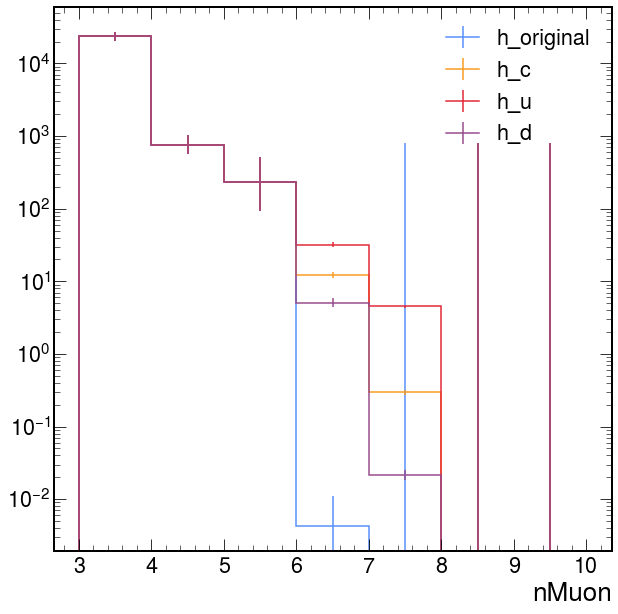

In [63]:
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']
h_original = histogram[4j::sum, 99j, :]
h_c, h_u, h_d = interiso_extrapolation(interiso_cut=4j, nMuon_begin_fit=6j)
h_original.plot(label="h_original")
h_c.plot(label='h_c')
h_u.plot(label='h_u')
h_d.plot(label='h_d')
plt.legend()
plt.yscale('log')
plt.show()

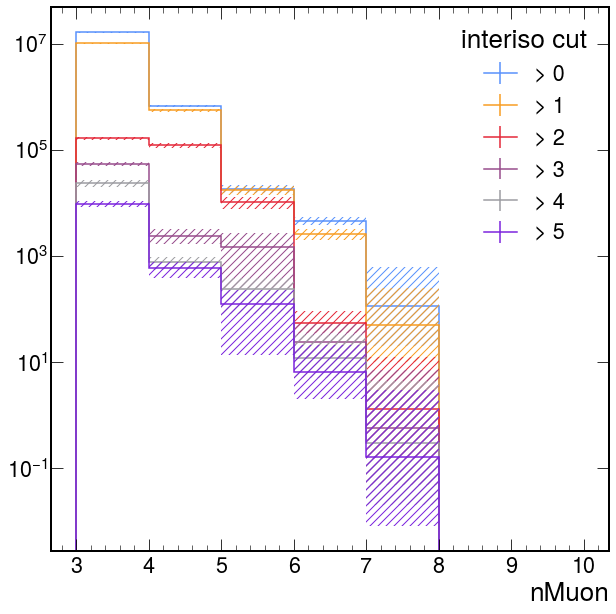

In [80]:
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']

interiso_cuts = [0j, 1j, 2j, 3j, 4j, 5j]
for i, interiso_cut in enumerate(interiso_cuts):
    h_original = histogram[interiso_cut::sum, 99j, :]
    h_c, h_u, h_d = interiso_extrapolation(interiso_cut=interiso_cut, nMuon_begin_fit=6j)

    # h_original.plot(label="mc")
    hep.histplot(h_c, yerr=0, label=f"> {interiso_cut}".replace("j", ""))

    up_var = h_c.values() - h_u.values()
    down_var = h_c.values() - h_d.values()
    x_hatch = np.vstack(
        (h_c.axes[0].edges[:-1], h_c.axes[0].edges[1:])
    ).reshape((-1,), order="F")
    y_hatch1 = np.vstack(
        (h_c.values(), h_c.values())
    ).reshape((-1,), order="F")
    y_hatch1_unc_up = np.vstack(
        (np.sqrt(h_c.variances() + up_var**2), np.sqrt(h_c.variances() + up_var**2))
    ).reshape((-1,), order="F")
    y_hatch1_unc_down = np.vstack(
        (np.sqrt(h_c.variances() + down_var**2), np.sqrt(h_c.variances() + down_var**2))
    ).reshape((-1,), order="F")
    plt.fill_between(
        x=x_hatch,
        y1=y_hatch1 - y_hatch1_unc_down,
        y2=y_hatch1 + y_hatch1_unc_up,
        step="pre",
        facecolor="none",
        edgecolor=f"C{i}",
        linewidth=0,
        hatch="///",
    )

plt.legend(title="interiso cut")
plt.yscale('log')
plt.show()

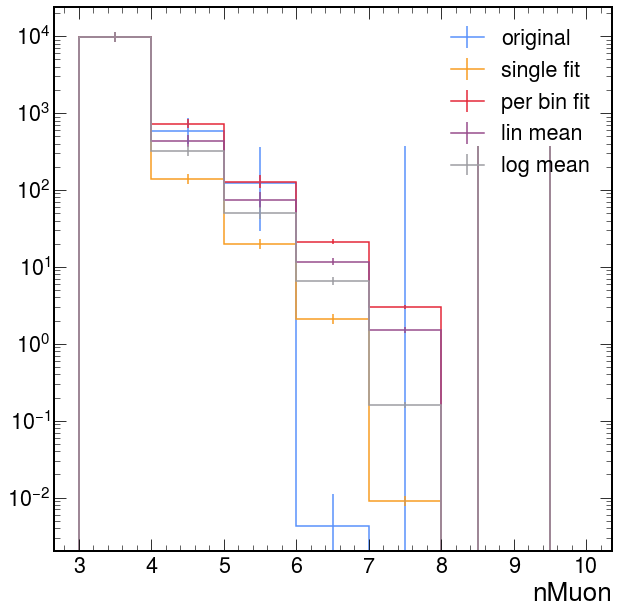

In [57]:
demonstrate_interiso_extrapolation(interiso_cut=5j, nMuon_begin_fit=4j)

iso: 2j

sum original: WeightedSum(value=0, variance=0)

sum reweight: WeightedSum(value=85.3544, variance=47405.4)

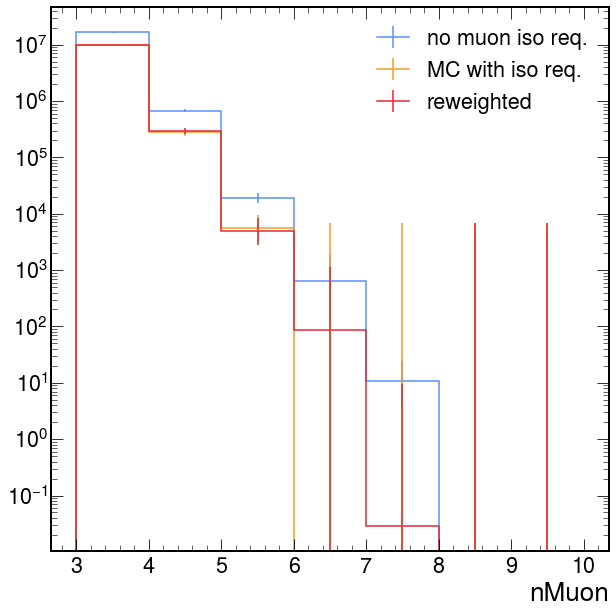

iso: 4j

sum original: WeightedSum(value=0.547374, variance=0.298659)

sum reweight: WeightedSum(value=263.165, variance=144466)

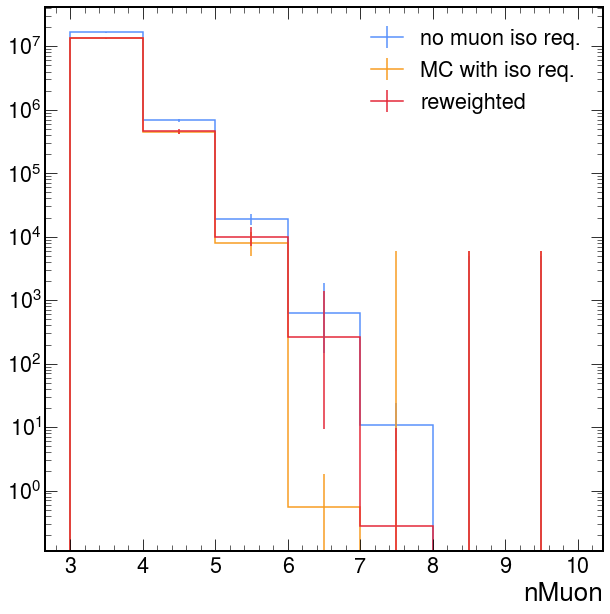

iso: 15j

sum original: WeightedSum(value=614.167, variance=316922)

sum reweight: WeightedSum(value=606.71, variance=313416)

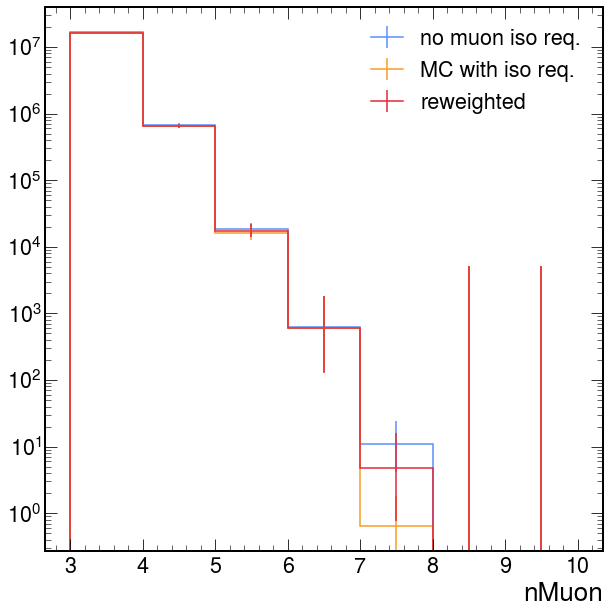

iso: 30j

sum original: WeightedSum(value=629.523, variance=316984)

sum reweight: WeightedSum(value=635.696, variance=316907)

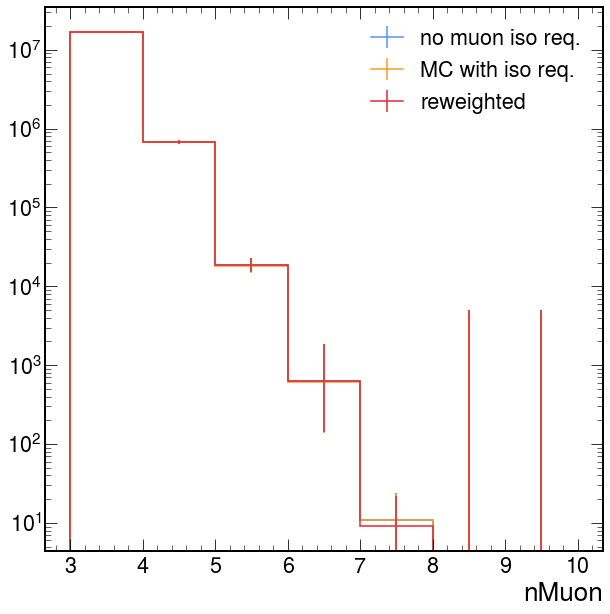

iso: 99j

sum original: WeightedSum(value=645.583, variance=317039)

sum reweight: WeightedSum(value=645.404, variance=317039)

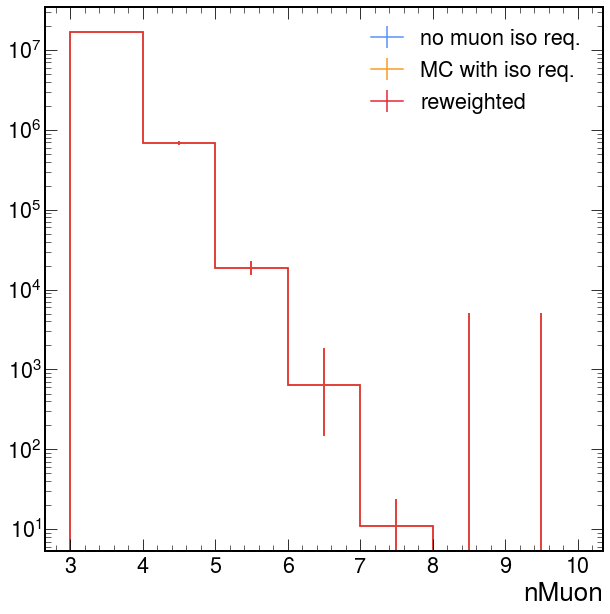

In [149]:
iso_cuts = [2j, 4j, 15j, 30j, 99j]

for ii in iso_cuts:
    print(f"iso: {ii}")
    demonstrate_iso_extrapolation(iso_cut=ii, nMuon_cut=6j)

(interiso, nMuon): (3j, 4j)

[4839.46561759 6585.83794791  572.33143523  298.62741506  191.64603704
   77.98217866   52.4029524    50.8614229    16.93679994   48.90307893]

sum original: WeightedSum(value=2449.87, variance=596205)

sum single fit: WeightedSum(value=5691.85, variance=312714)

sum per bin fit: WeightedSum(value=3027.95, variance=63764.2)

sum lin mean: WeightedSum(value=4359.9, variance=188239)

sum log mean: WeightedSum(value=4137.91, variance=139999)

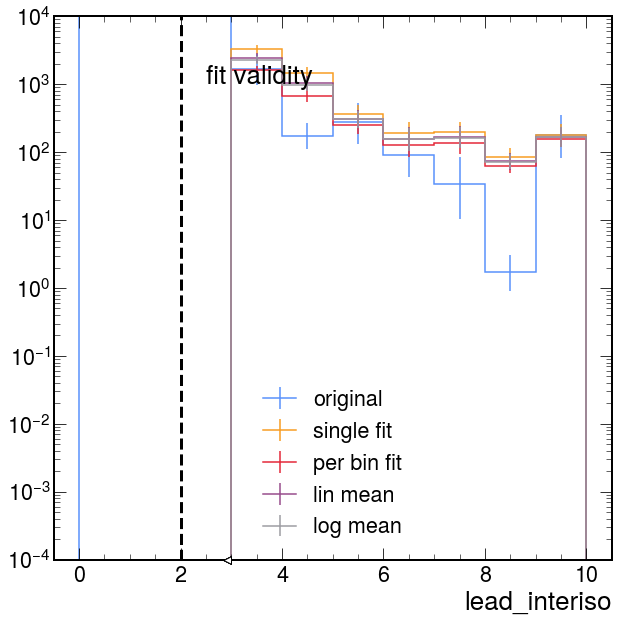

(interiso, nMuon): (3j, 5j)

[1691.06882012 2176.73836997  196.98517464   99.95483592   65.96150752
   30.06979669   21.89304176   21.39746347   10.77074502   13.46685264]

sum original: WeightedSum(value=1509.94, variance=1.57456e+06)

sum single fit: WeightedSum(value=3865.4, variance=144222)

sum per bin fit: WeightedSum(value=494.007, variance=2035.29)

sum lin mean: WeightedSum(value=2179.71, variance=73128.4)

sum log mean: WeightedSum(value=1371.83, variance=16480.6)

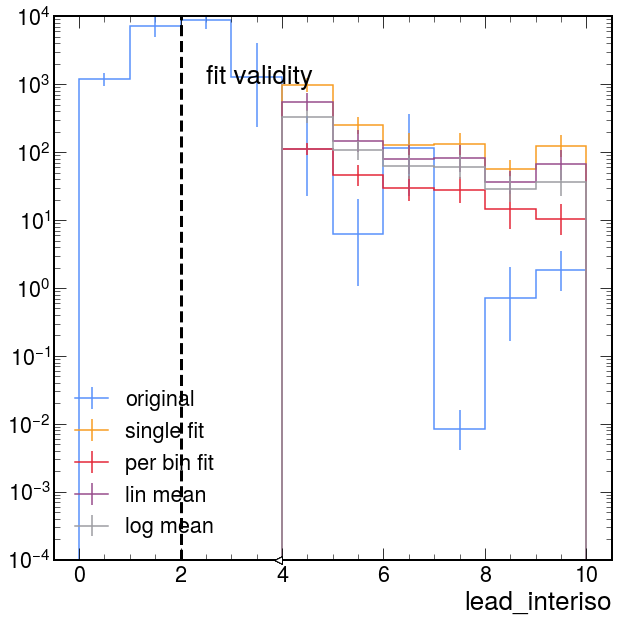

(interiso, nMuon): (3j, 6j)

[20.8088191  25.56547853  2.32331369  1.26721827  0.87514383  0.41970352
  0.29145765  0.32307968  0.17168595  0.30485204]

sum original: WeightedSum(value=5.41066, variance=21.102)

sum single fit: WeightedSum(value=11.7079, variance=1.32312)

sum per bin fit: WeightedSum(value=52.3011, variance=7.42792)

sum lin mean: WeightedSum(value=32.0045, variance=4.37552)

sum log mean: WeightedSum(value=23.8578, variance=2.85961)

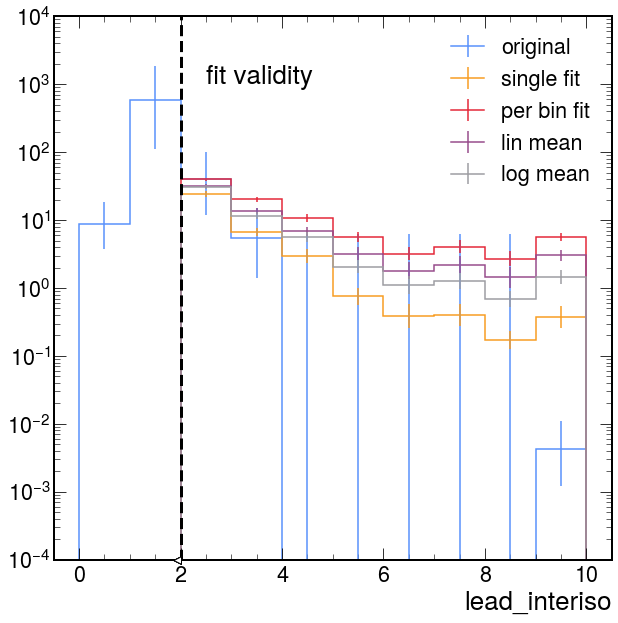

(interiso, nMuon): (3j, 7j)

[0.45524864 0.53878645 0.04977437 0.0264766  0.01881797 0.00903366
 0.00682943 0.0060736  0.00329211 0.00764628]

sum original: WeightedSum(value=0.0279554, variance=0.000704032)

sum single fit: WeightedSum(value=0.0499402, variance=2.40736e-05)

sum per bin fit: WeightedSum(value=7.07074, variance=0.0863589)

sum lin mean: WeightedSum(value=3.56034, variance=0.0431915)

sum log mean: WeightedSum(value=0.566991, variance=0.00128957)

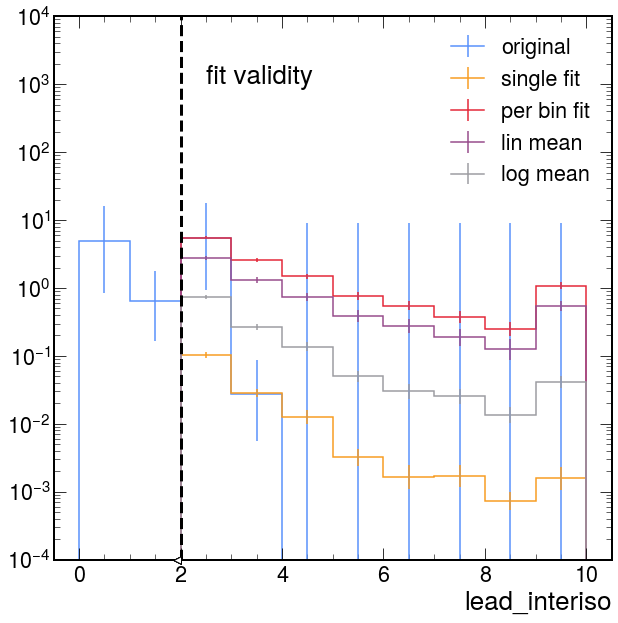

In [147]:
interiso_cuts = [3j]#, 3j, 4j, 5j]
nMuon_cuts = [4j, 5j, 6j, 7j]

for ii in interiso_cuts:
    for jj in nMuon_cuts:
        print(f"(interiso, nMuon): ({ii}, {jj})")
        demonstrate_interiso_extrapolation_per_nMuon(interiso_cut=ii, nMuon_cut=jj)

In [123]:
histogram.axes[1].edges

array([  0.1       ,   0.11481536,   0.13182567,   0.15135612,
         0.17378008,   0.19952623,   0.22908677,   0.2630268 ,
         0.30199517,   0.34673685,   0.39810717,   0.45708819,
         0.52480746,   0.60255959,   0.69183097,   0.79432823,
         0.91201084,   1.04712855,   1.20226443,   1.38038426,
         1.58489319,   1.81970086,   2.08929613,   2.39883292,
         2.7542287 ,   3.16227766,   3.63078055,   4.16869383,
         4.78630092,   5.49540874,   6.30957344,   7.2443596 ,
         8.31763771,   9.54992586,  10.96478196,  12.58925412,
        14.45439771,  16.59586907,  19.05460718,  21.87761624,
        25.11886432,  28.84031503,  33.11311215,  38.01893963,
        43.65158322,  50.11872336,  57.54399373,  66.0693448 ,
        75.8577575 ,  87.096359  , 100.        ])

In [73]:
a, b = 10, 1000
print((a + b) / 2)
print(10 ** ((np.log10(a) + np.log10(b)) / 2))

505.0

100.0

scale_factor=9.165414467382504e-07

sum pre-fit: WeightedSum(value=5.42754, variance=29.1031)

sum post-fit: WeightedSum(value=0.152034, variance=0.00011585)

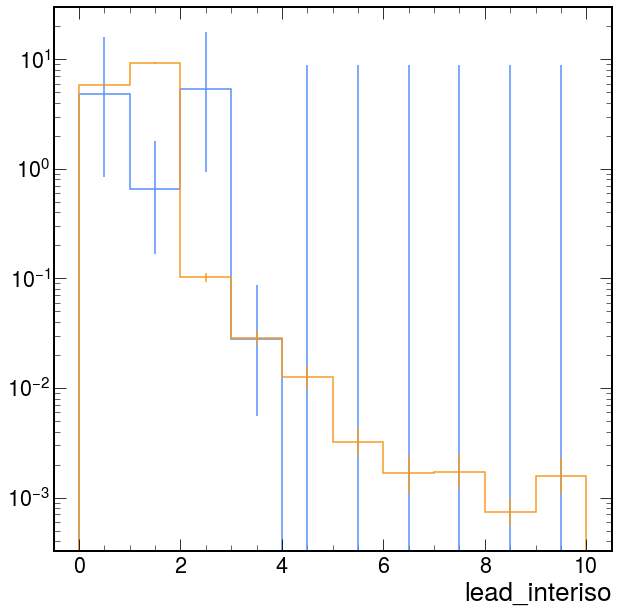

In [36]:
nMuon_cut = 7j
histogram = plots['QCD_2018']['lead_interiso_vs_muon_iso_cut_vs_nMuon']

# Interiso part 
scale_factor = fit_for_interiso(histogram, nMuon_cut)

print(f"{scale_factor=}")
print(f"sum pre-fit: {(histogram[2j:, 99j, nMuon_cut]).sum()}")
print(f"sum post-fit: {(histogram[2j:, 99j, 3j] * scale_factor).sum()}")
(histogram[::10j, 99j, nMuon_cut]).plot()
(histogram[::10j, 99j, 3j]* scale_factor).plot()
plt.yscale('log')
plt.show()

In [12]:
interiso_extrapolation(iso_cut=15j, interiso_cut=5j, nMuon_cut=7j)

WeightedSum(value=1.34185, variance=0.00750815)

In [13]:
plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon'][4j::sum, 15j, 7j::sum]

WeightedSum(value=0, variance=0)

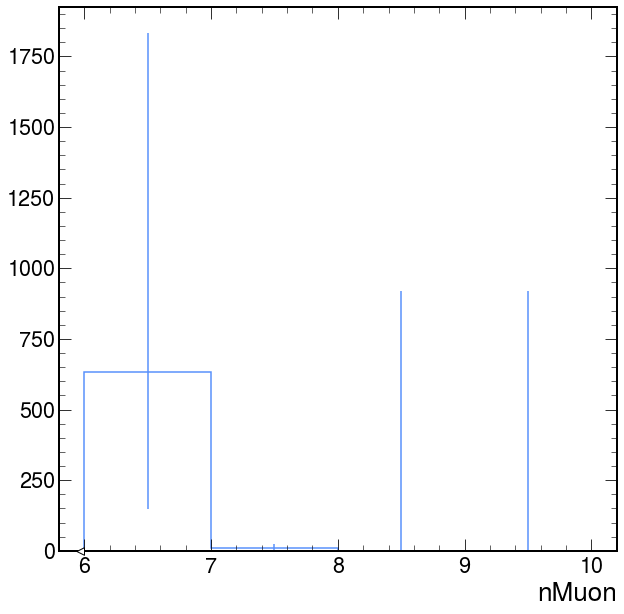

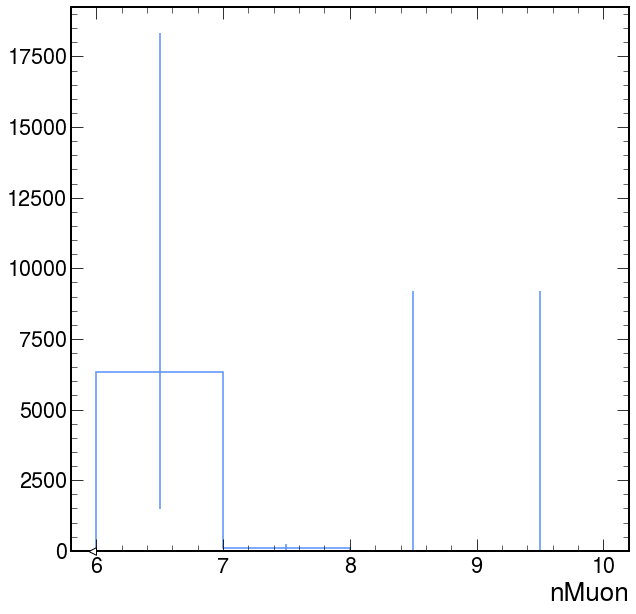

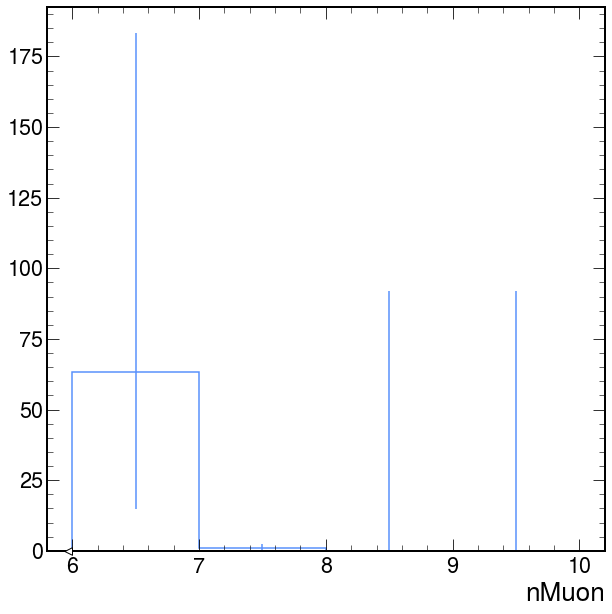

In [123]:
(histogram[::sum, 99j, 6j:]).plot()
plt.show()
(histogram[::sum, 99j, 6j:]*10).plot()
plt.show()
(histogram[::sum, 99j, 6j:]*0.1).plot()
plt.show()

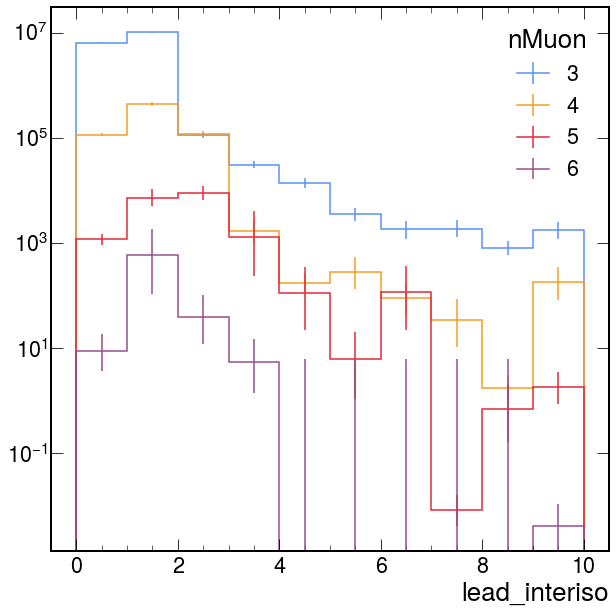

In [143]:
histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
for nMuon in range(4):
    histogram[::10j, 99j, nMuon].plot(density=False, label=f"{nMuon+3}")
plt.yscale('log')
plt.legend(title="nMuon")
plt.show()

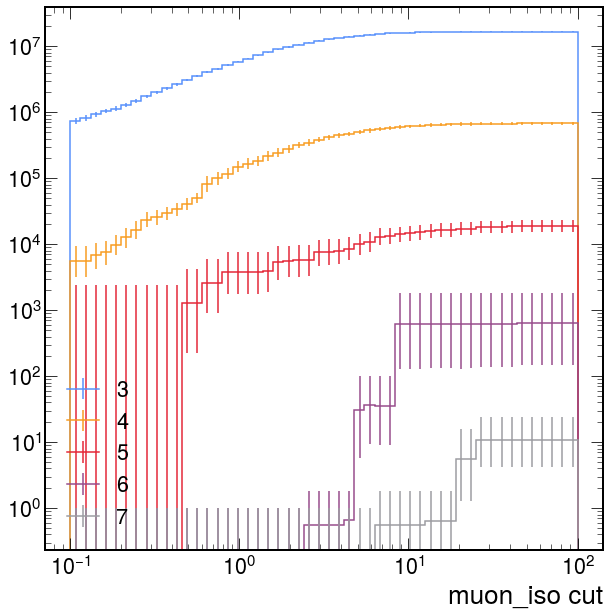

In [94]:
histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
for nMuon in range(5):
    histogram[::sum, :, nMuon].plot(density=False, label=f"{nMuon+3}")
#histogram[::sum, :, :].plot2d(norm=matplotlib.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Shape tests

In [11]:
hep.style.use("CMS")

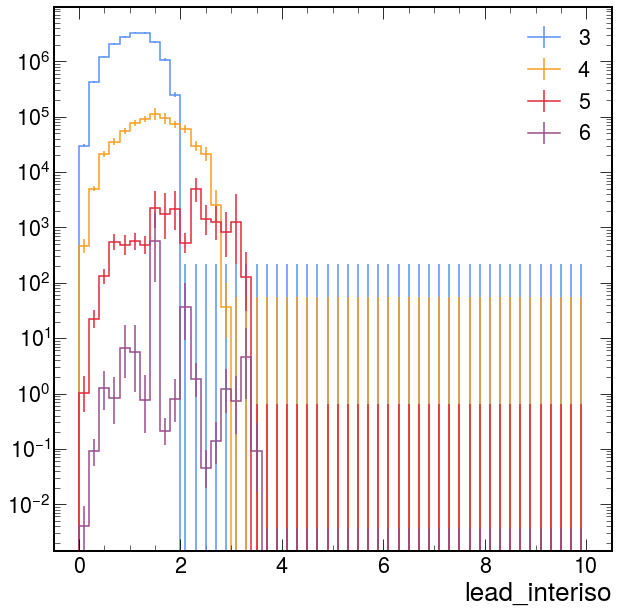

In [12]:
histogram = plots["QCD_2018"]['lead_interiso_vs_muon_iso_cut_vs_nMuon']
for nMuon in range(4):
    histogram[:, 99j, nMuon].plot(density=False, label=f"{nMuon+3}")
plt.yscale('log')
plt.legend()
plt.show()

In [100]:
h_peak_3 = histogram[:2.5j, 99j, 3j]
h_peak_4 = histogram[:3.5j, 99j, 4j]
h_peak_5 = histogram[:4.5j, 99j, 5j]
h_peak_6 = histogram[:5.5j, 99j, 6j]

In [101]:
h_peak_3.values()

array([  30191.31322995,  425929.16171403, 1215732.65442674,
       2057672.96723209, 2775829.91151336, 3317316.02266776,
       3240132.34870961, 2259459.11149115, 1070958.23161032,
        248954.59996944,       0.        ,       0.        ])

In [15]:
from scipy.interpolate import CubicSpline

In [16]:
x_peak_3 = np.linspace(0, 2, 5)
y_peak_3 = h_peak_3.values()

x_peak_4 = np.linspace(0, 3, 7)
y_peak_4 = h_peak_4.values()
x_interp_4 = np.linspace(0, 2, 7)
y_interp_4 = np.interp(x_interp_4, x_peak_3, y_peak_3)
cspl_4 = CubicSpline(x_peak_3, y_peak_3)
y_cspl_4 = cspl_4(x_interp_4)

x_peak_5 = np.linspace(0, 4, 9)[:-1]
y_peak_5 = h_peak_5.values()
x_interp_5 = np.linspace(0, 2, 9)[:-1]
y_interp_5 = np.interp(x_interp_5, x_peak_3, y_peak_3)

In [17]:
h_interp_4 = h_peak_4.copy().reset()
h_cspl_4 = h_peak_4.copy().reset()
for bin_i in range(len(h_interp_4.values())):
    h_interp_4[bin_i] = hist.accumulators.WeightedSum(y_interp_4[bin_i], y_interp_4[bin_i])
    h_cspl_4[bin_i] = hist.accumulators.WeightedSum(y_cspl_4[bin_i], y_cspl_4[bin_i])

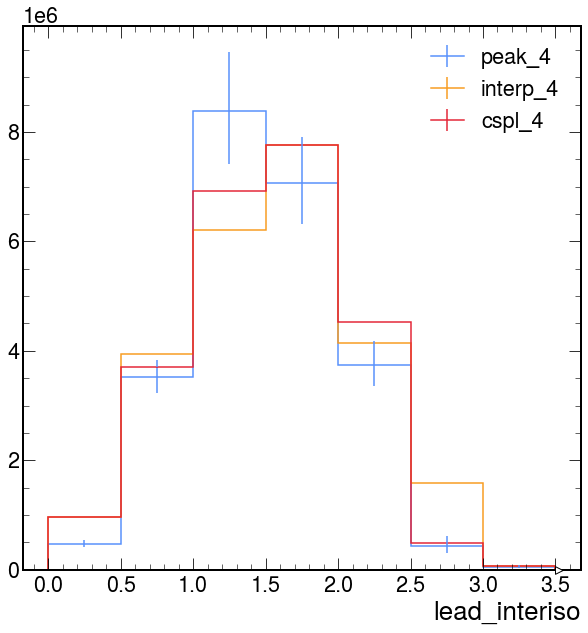

In [18]:
#h_peak_3.plot()
(h_peak_4 * 35).plot(label="peak_4")
h_interp_4.plot(label="interp_4")
h_cspl_4.plot(label="cspl_4")
plt.legend()
plt.show()

### Try to validate the shape going from up to bottom

In [102]:
h_peak_3

Hist(Regular(12, 0, 2.4, name='lead_interiso'), storage=Weight()) # Sum: WeightedSum(value=1.66422e+07, variance=4.56427e+10)

In [103]:
histogram[:, 99j, 3j]

Hist(Regular(50, 0, 10, name='lead_interiso'), storage=Weight()) # Sum: WeightedSum(value=1.66422e+07, variance=4.56427e+10)

In [21]:
h = {}
h_new_range = {}
for nMuon in range(3, 8):
    h[nMuon] = histogram[:, 99j, nMuon*1j]
    h_new_range[nMuon] = hist.Hist.new.Reg(50, 0, 10 / (nMuon-1), name='lead_interiso (normalized)').Weight()
    for ii in range(50):
        h_new_range[nMuon][ii] = h[nMuon][ii]

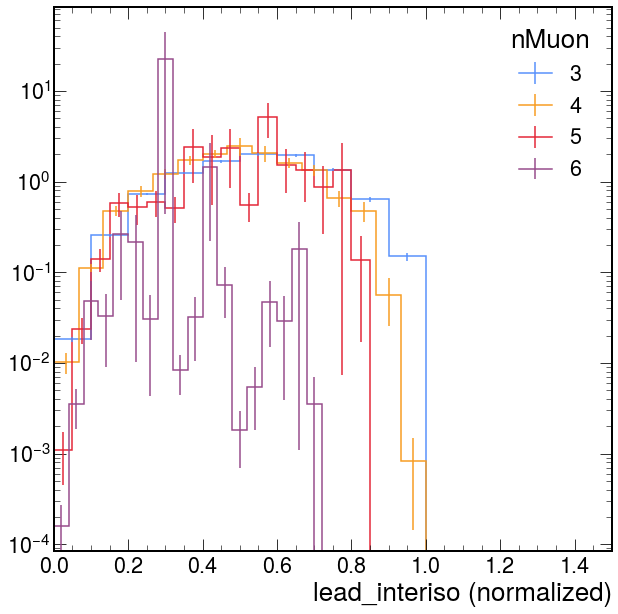

In [24]:
density = True
h_new_range[3].plot(density=density, label=f"3", yerr=np.sqrt(h_new_range[3].variances()))
h_new_range[4].plot(density=density, label=f"4", yerr=np.sqrt(h_new_range[4].variances()))
h_new_range[5].plot(density=density, label=f"5", yerr=np.sqrt(h_new_range[5].variances()))
h_new_range[6].plot(density=density, label=f"6", yerr=np.sqrt(h_new_range[6].variances()))
plt.legend(title="nMuon")
plt.yscale('log')
plt.xlim(0, 1.5)
plt.show()

In [60]:
ylds = {}
for nMuon in range(3, 8):
    ylds[nMuon] = (h_new_range[nMuon] / h_new_range[nMuon].sum().value)[1j::sum]
    print(
        f"nMuon={nMuon}: {ylds[nMuon].value - np.sqrt(ylds[nMuon].variance):.6f}"
        f" ––> {ylds[nMuon].value + np.sqrt(ylds[nMuon].variance):.6f}"
    )

nMuon=3: 0.009262 ––> 0.010673

nMuon=4: 0.002475 ––> 0.004752

nMuon=5: 0.004414 ––> 0.020642

nMuon=6: 0.000001 ––> 0.000012

nMuon=7: 0.000000 ––> 0.000000

In [61]:
h_new_range_rebinned = {}
for nMuon in range(3, 8):
    h_new_range_rebinned[nMuon] = hist.Hist.new.Reg(20, 0, 5, name='lead_interiso (normalized)').Weight()
    for ii in range(20):
        h_new_range_rebinned[nMuon][ii] = h[nMuon][ii]

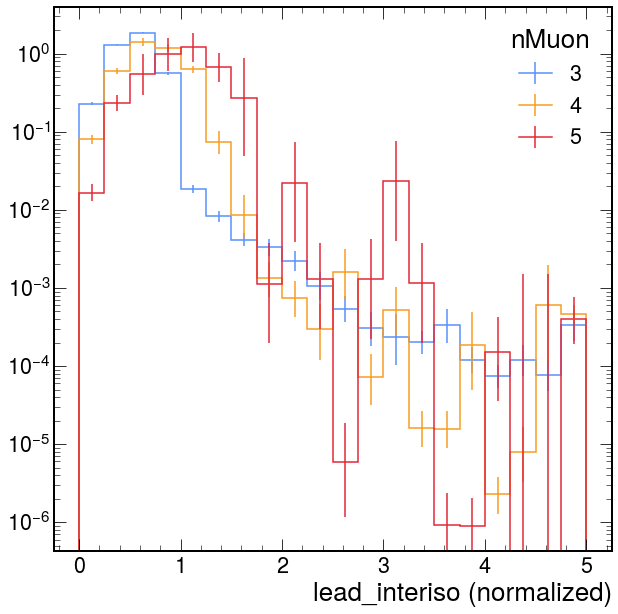

In [62]:
density = True
for nMuon in range(3, 6):
    h_new_range_rebinned[nMuon].plot(density=density, label=f"{nMuon}")
plt.legend(title="nMuon")
plt.yscale('log')
plt.show()

Cut (internally): (slice(None, None, None), slice(None, None, <built-in function sum>), 4j, slice(7j, None, <built-in function sum>))


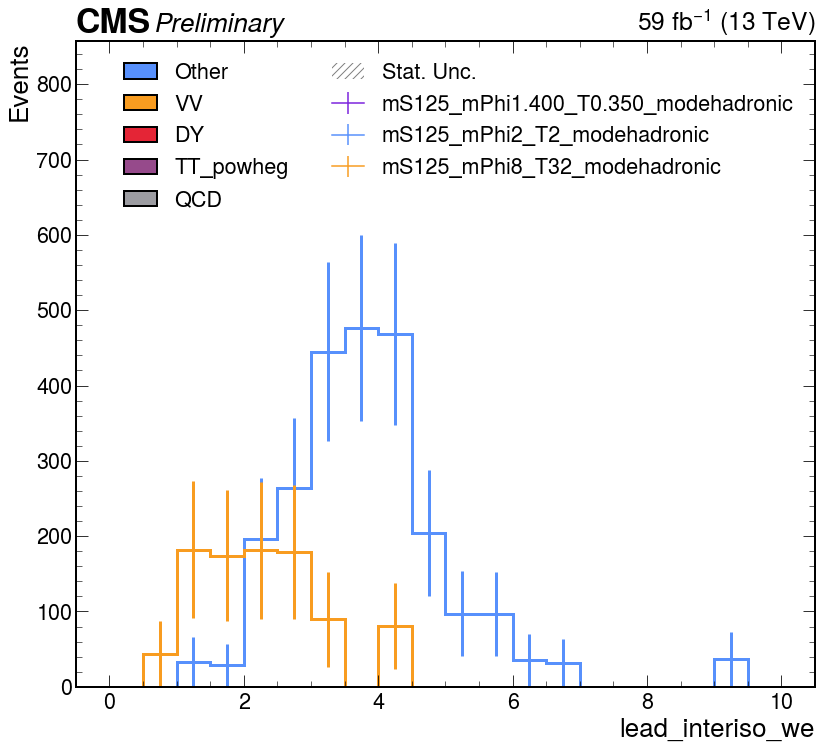

Cut (internally): (slice(None, None, <built-in function sum>), slice(None, None, None), 4j, slice(7j, None, <built-in function sum>))


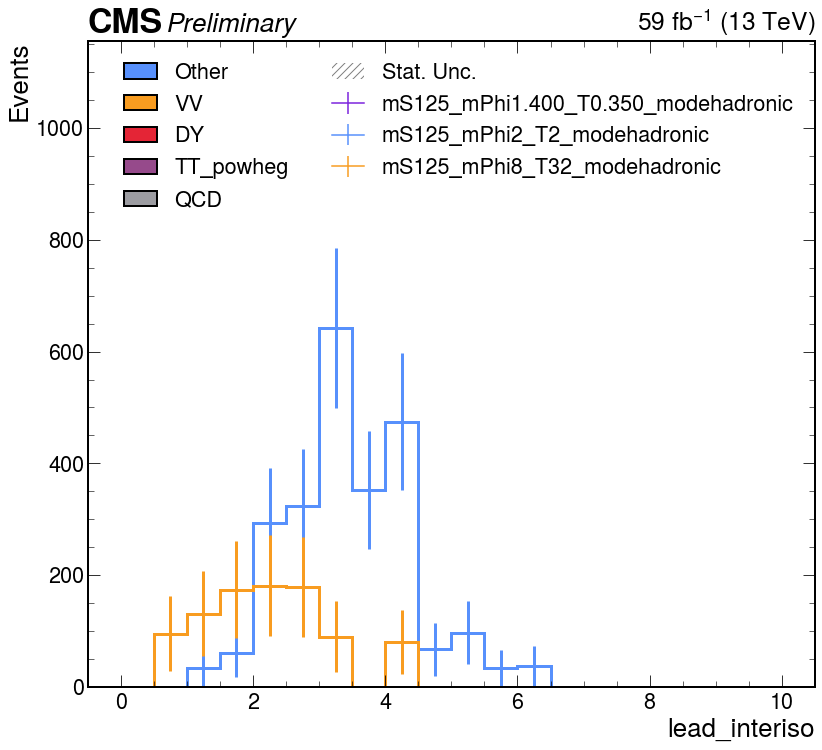

In [94]:
processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_2018',
]
signals = [
    'GluGluToSUEP_mS125.000_mPhi1.400_T0.350_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi2.000_T2.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
int_lumi = 59

plot_set = [
    [
        ('lead_interiso_we_vs_lead_interiso_vs_muon_iso_cut_vs_nMuon','lead_interiso_we'),
        {
            'cut': (slice(None), slice(None, None, sum), 4j, slice(7j, None, sum)),
            'slc': slice(None),
            #'ylim': (1e-2, 1e10),
        }
    ],
    [
        ('lead_interiso_we_vs_lead_interiso_vs_muon_iso_cut_vs_nMuon','lead_interiso'),
        {
            'cut': (slice(None, None, sum), slice(None), 4j, slice(7j, None, sum)),
            'slc': slice(None),
            #'ylim': (1e-2, 1e10),
        }
    ],
]
for plot_i in plot_set:
    if plot_i[0][0] not in plots[processes[0]].keys():
        continue
    # Stack with ratio for processes 
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 11))
    plot_utils_extras.plot_stack(
        plots=plots, 
        bkg_list=processes, 
        sig_list=signals,
        label=plot_i[0],
        ylog=False,
        override_slice=False,
        fig=fig,
        ax=ax,
        int_lumi=int_lumi,
        **plot_i[1]
    )
    plt.tight_layout()
    plt.show()

In [95]:
np.logspace(-1, 2, 51)[:-1] * 1.01

array([ 0.101     ,  0.11596352,  0.13314393,  0.15286969,  0.17551788,
        0.20152149,  0.23137763,  0.26565707,  0.30501512,  0.35020422,
        0.40208824,  0.46165907,  0.53005553,  0.60858518,  0.69874928,
        0.80227152,  0.92113095,  1.05759983,  1.21428708,  1.39418811,
        1.60074212,  1.83789787,  2.11018909,  2.42282125,  2.78177099,
        3.19390044,  3.66708835,  4.21038077,  4.83416393,  5.55036283,
        6.37266918,  7.3168032 ,  8.40081409,  9.64542512, 11.07442978,
       12.71514666, 14.59894168, 16.76182777, 19.24515325, 22.0963924 ,
       25.37005296, 29.12871818, 33.44424327, 38.39912903, 44.08809906,
       50.6199106 , 58.11943367, 66.73003825, 76.61633508, 87.96732259])